                                                                                      Group Name - Arijit_Sengupta_Sumaiya_K

# Telecom Churn Prediction - Case Study
--------------------------------------------------------------------------------------------------

#### 

**Problem Statement**: 

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, and build predictive models to identify customers at high risk of churn.


The main goal of the case study is to build ML models to predict churn. The predictive model that we are going to build will the following purposes:
1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
3. Even though overall accuracy will be our primary evaluation metric, we will also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure to mention which metric can be used in such scenarios.
4. Recommend strategies to manage customer churn based on your observations.
 

#### 
**Data Description:**

We have been provided the training data in a CSV file along with the data dictionary. The data has 172 columns out of which 171 are predictor variables containing customer behavior, usage patterns, payment patterns, and other features that might be relevant. The target variable is "churn_probability", which is in the last column.
#### 

### Structure of the Analysis:

The analysis will follow the below outlined rough structure. 

**1. Reading & Understanding The Data (EDA)**
   
**2. Data Preparation For Model Building**
   
**3. Model Development & Evaluation** 
  
**4. Model Selection and Predictions on Unseen Data**

### Note:
The variables provided in the data are on a month level spanning over three months (6,7, & 8). From the starter notebook, we learned that these months should be interpreted in terms of various phases in the customer's lifecycle. So June & July will be the 'good phase', August will be the 'action phase', and the actual churn would have heppaned just after that. 

Due to this reason, we will retain the monthly nature of the columns and not try to add them up or merge them across months (which would have been an easy way of dimensionality reduction).

## Step 1: Reading and Understanding the Data

Let us first import the required packages, read the data, and get some high-level understanding of it.

In [1]:
# Load the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

import os

# Setting plot style to ggplot
plt.style.use('ggplot')
import missingno as mno

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [2]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [3]:
#telecom_data = pd.read_csv("/kaggle/input/kagglelabstest2021/train.csv")
#unseen = pd.read_csv("/kaggle/input/kagglelabstest2021/test.csv")
#sample = pd.read_csv("/kaggle/input/kagglelabstest2021/sample.csv")
#data_dict = pd.read_csv("/kaggle/input/kagglelabstest2021/data_dictionary.csv")
telecom_data = pd.read_csv("train.csv")
#print(data.shape)
#print(unseen.shape)
#print(sample.shape)
#print(data_dict.shape)

#### Dataset Information

In [4]:
telecom_data.shape

(69999, 172)

In [5]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [6]:
telecom_data.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

The dataset has 69,999 rows and 172 columns including the target variable (last column). Nearly all the columns are of numerical format except for nine date columns. Seems the data is at an 'id' level.

In [7]:
# Checking the level (primary keys) of the data.
print(len(telecom_data))
print(telecom_data['id'].nunique())

69999
69999


Let us analyse the data dictonary that contains a list of abbrevations which provide you all the information you need to understand what a specific feature/variable in the churn dataset represents

In [8]:
data_dict = pd.read_csv("data_dictionary.csv")
data_dict

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

Its important to understand the definitions of each feature that you are working with, take notes on which feature you think might impact the churn rate of a user, and what sort of analysis could you do to understand the distribution of the feature better.

### Inferences on Data
Using the data dictionary and eye-balling through the data, we see that it has features indicating a variety of metrics pertaining to customer spend and behavior. These columns indicate average revenue per user, minutes of usage according to distance, etc., incoming versus outgoing minutes, recharge frequency and amounts, data usage, etc.

There are many metrics which are aggregates of other metrics. Example, loc_og_mou is the sum of individual 'loc_og' type columns; and total_og_mou is the sum of local, std, isd, and other outgoing minutes. Same goes for other metrics. Also many metrics are directly related to each other such as minutes, reachrge amount, and arpu.

We will address the redundant information and correlations through the modeling process.

### Categorical and numerical columns
We need to identify categorical & numerical columns for separate analysis and modeling.  Using the data dictionary and the data, only two column types are categorical - 'night_pck_user' and 'fb_user'. All other columns are numerical (some are dates).

## Data Cleaning

In [9]:
# Checking and Dropping duplicates
if (duplicated := telecom_data.duplicated(keep=False)).any():
    some_duplicates = telecom_data[duplicated].sort_values(by=telecom_data.columns.to_list()).head()
    print(f"Dataset has one or more duplicated rows, for example:\n{some_duplicates}")
else:
    print(f"Dataset has 0 duplicates")

Dataset has 0 duplicates


Dropping irrelevant or unnecessary columns

In [10]:
# Id type columns 
telecom_data = telecom_data.drop(['id','circle_id'],axis=1)

# Columns containing last date of months
telecom_data = telecom_data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

# Columns which have only one value like zeros for all rows 
telecom_data = telecom_data.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)
telecom_data = telecom_data.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1)
telecom_data = telecom_data.drop(['std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

# We already have monthly reacharge counts and amounts so their dates aren't useful
telecom_data = telecom_data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)
telecom_data = telecom_data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1)

In [11]:
telecom_data.shape

(69999, 152)

#### Missing Value Treatment

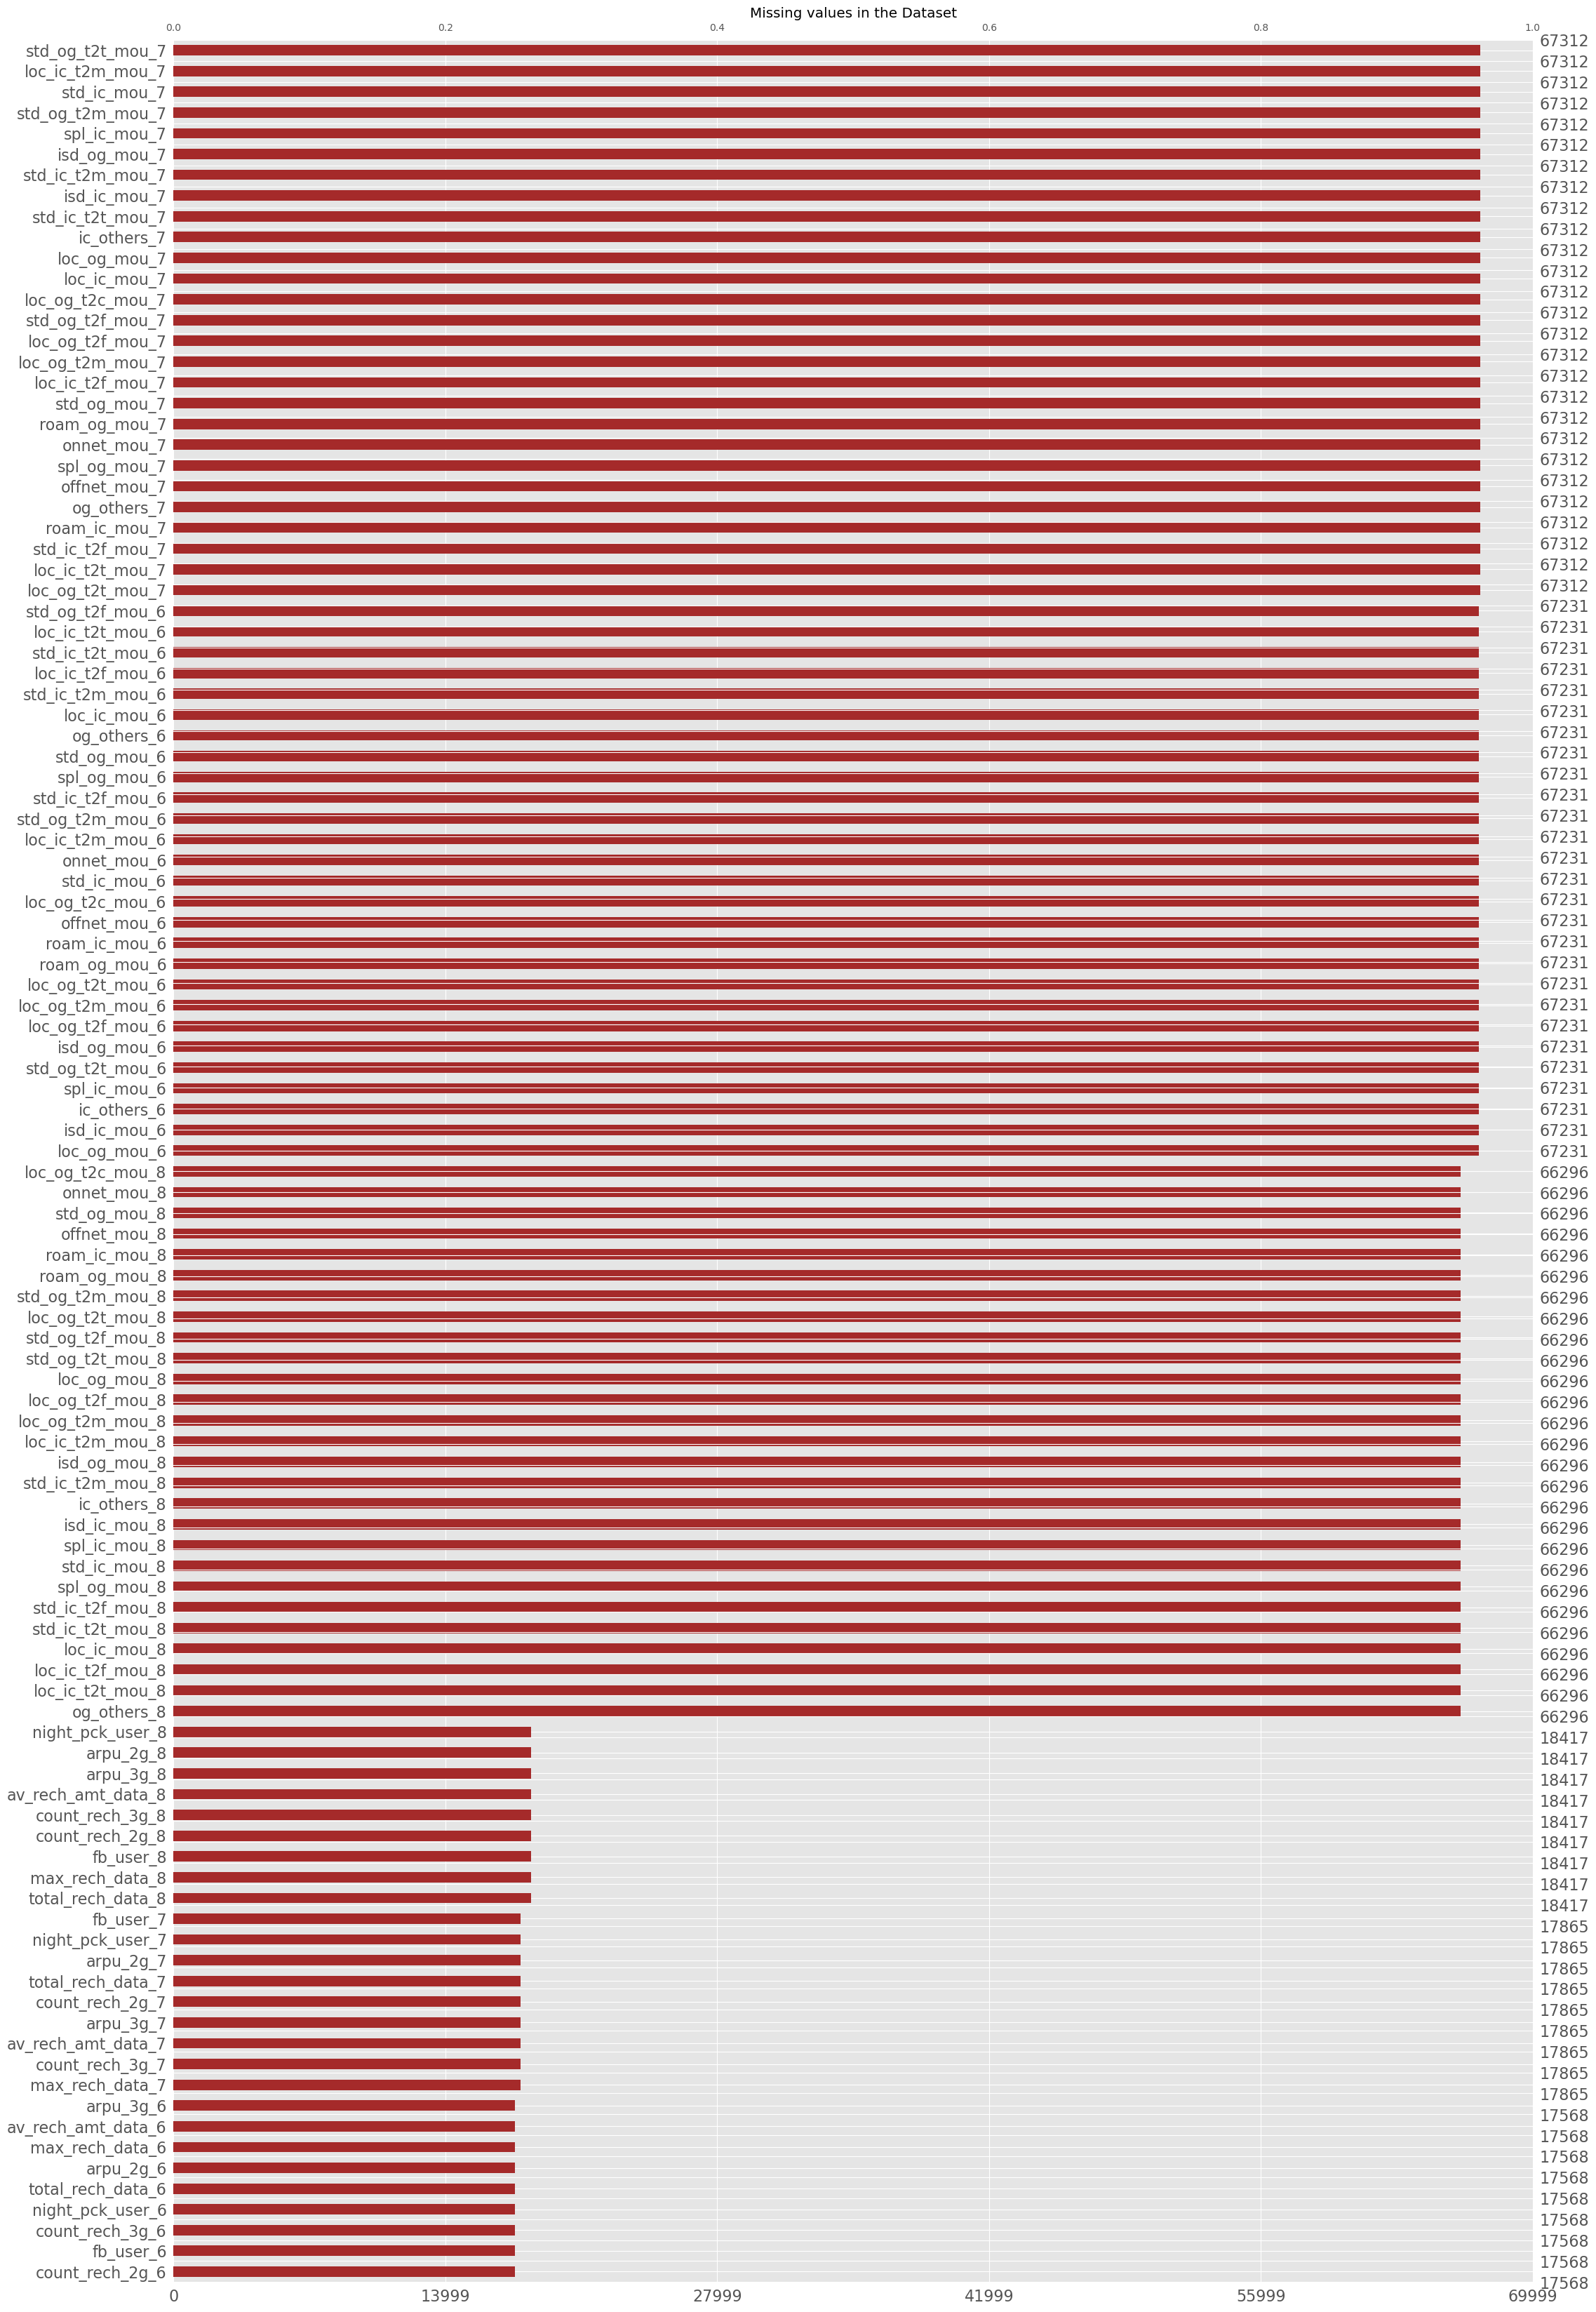

In [12]:
mno.bar(telecom_data[telecom_data.columns[telecom_data.isna().any()]], sort="ascending", color='brown')
plt.title("Missing values in the Dataset")
plt.show()

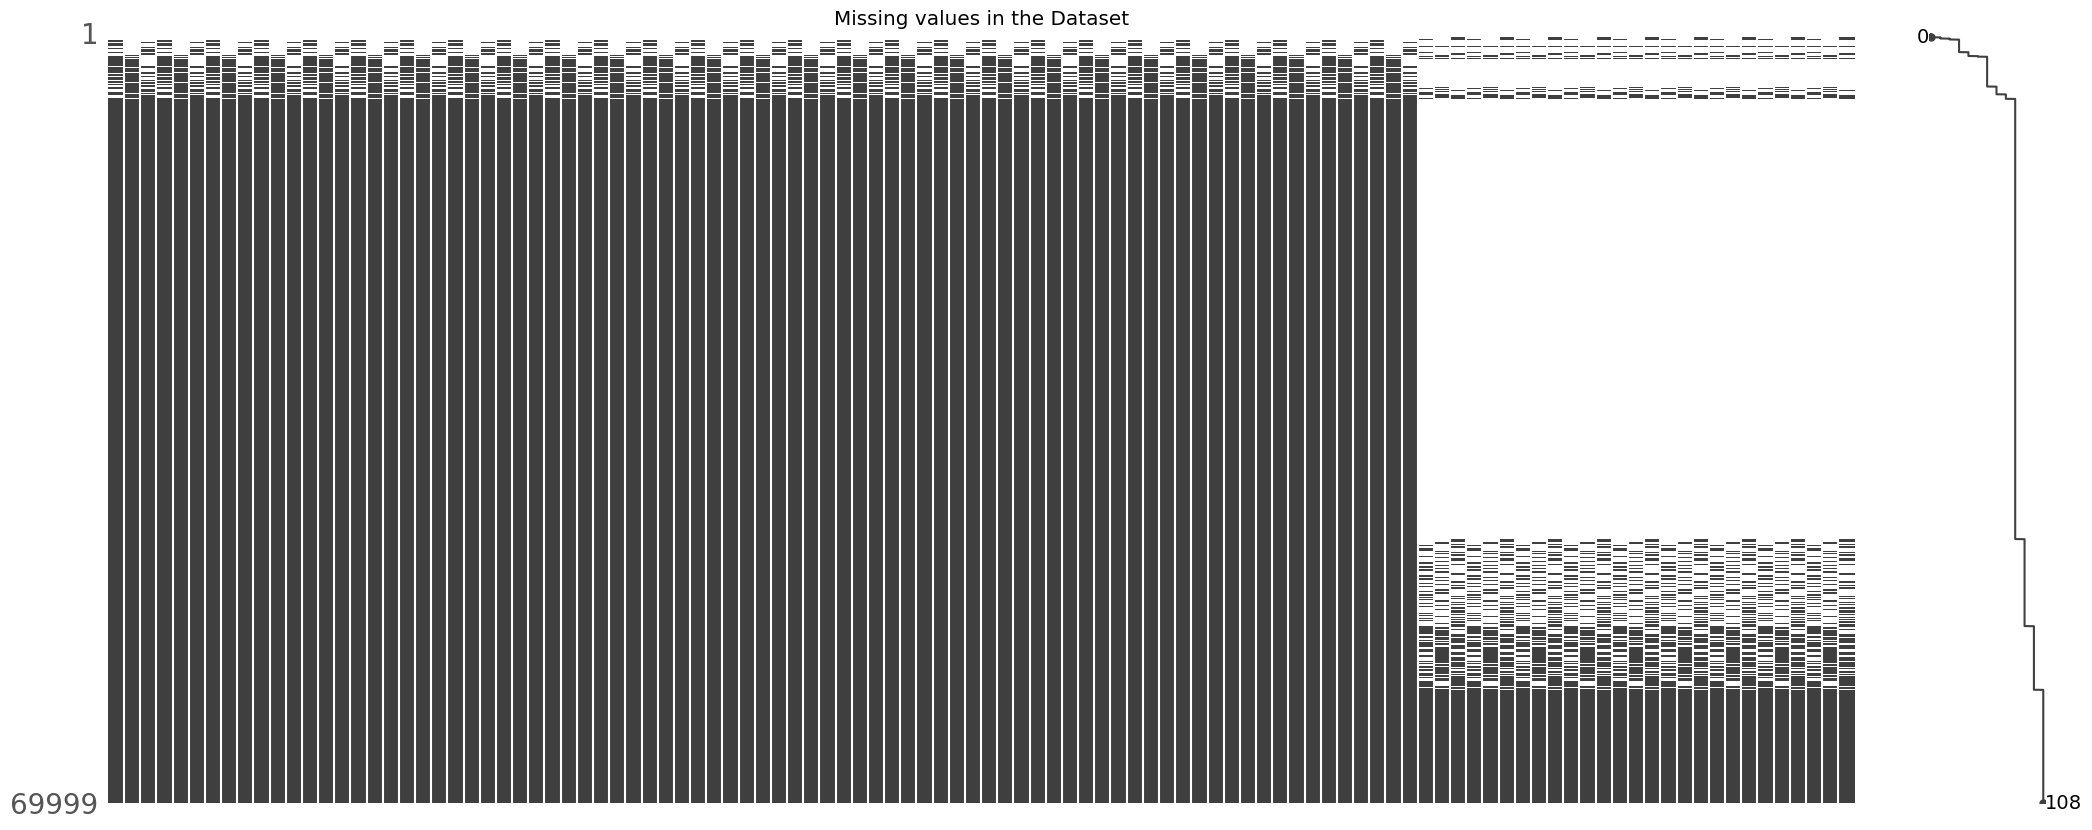

In [13]:
mno.matrix(telecom_data[telecom_data.columns[telecom_data.isna().any()]], sort="ascending")
plt.title("Missing values in the Dataset")
plt.show()

In [14]:
# Missing value percentage in each column
round(telecom_data.isnull().sum()/len(telecom_data),3)*100

arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            4.0
onnet_mou_7            3.8
onnet_mou_8            5.3
offnet_mou_6           4.0
offnet_mou_7           3.8
offnet_mou_8           5.3
roam_ic_mou_6          4.0
roam_ic_mou_7          3.8
roam_ic_mou_8          5.3
roam_og_mou_6          4.0
roam_og_mou_7          3.8
roam_og_mou_8          5.3
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       3.8
loc_og_t2t_mou_8       5.3
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       3.8
loc_og_t2m_mou_8       5.3
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       3.8
loc_og_t2f_mou_8       5.3
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       3.8
loc_og_t2c_mou_8       5.3
loc_og_mou_6           4.0
loc_og_mou_7           3.8
loc_og_mou_8           5.3
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       3.8
std_og_t2t_mou_8       5.3
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       3.8
std_og_t2m_mou_8       5.3
std_og_t2f_mou_6       4.0
s

Many columns have missing values and they are typically either low (up to around 5%) or very high (above 70%). We will drop all columns with high missing values (using a threshold of 50%).

In [15]:
drop_cols = telecom_data.columns[100*(telecom_data.isnull().sum()/len(telecom_data)) > 50]
print("Number of columns with high missing values = ",len(drop_cols))
print("\n List of columns to drop ->\n")
print(drop_cols)

Number of columns with high missing values =  27

 List of columns to drop ->

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')


All the above columns have very similar percentage of missing values which is evidently because of their similar nature and inter-relation with each other.

In [16]:
# Dropping these columns
telecom_data = telecom_data.drop(drop_cols,axis=1)
print(telecom_data.shape)

(69999, 125)


In [17]:
# Let's check out the columns with small missing percentages
small_cols = telecom_data.columns[100*(telecom_data.isnull().sum()/len(telecom_data)) > 0]
print("Number of columns with low but non-zero missing values = ",len(small_cols))
print("\n List of columns to treat ->\n")
print(small_cols)

Number of columns with low but non-zero missing values =  81

 List of columns to treat ->

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others

Visually studying the data, we didn't find any format issues or data shifting across columns which could have caused these missing values. 

Also, we see that these columns are all numeric and most of them have most of their values as zero. So, imputing with mean wouldn't be a good idea here. Let's go with median.

In [18]:
imp = SimpleImputer(strategy='median', missing_values=np.nan)
telecom_data[small_cols] = imp.fit_transform(telecom_data[small_cols])

In [19]:
# Imputing missing values with median for all the remaining columns
#for col in small_cols:
#    telecom_data[col] = telecom_data[col].fillna(telecom_data[col].median())

In [20]:
# Final Check
telecom_data.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8    

In [21]:
telecom_data.shape

(69999, 125)

No missing values left. Let's proceed with next steps.
We are now left with 125 columns out of which one is the target variable.

### Derived Metrics Creation

Now that we have cleaned the data, let's create some derived metrics before any further processes. These metrics will help with univariate/bivariate analysis as well as outlier treatment.

These are the new features we are going to create. We feel these features indicate behavior which will be a predictor of churn.
 - total minutes of usage
 - ratio of incoming to outgoing minutes of usage
 - average recharge amt
 - ratio of august to other months for -
    - incoming minutes of usage
    - outgoing minutes of usage
    - number of recharges
    - arpu

In [22]:
# Total minutes of usage
telecom_data['total_mou_6'] = telecom_data['total_og_mou_6'] + telecom_data['total_ic_mou_6']
telecom_data['total_mou_7'] = telecom_data['total_og_mou_7'] + telecom_data['total_ic_mou_7']
telecom_data['total_mou_8'] = telecom_data['total_og_mou_8'] + telecom_data['total_ic_mou_8']

# Ratio of incoming to outgoing minutes of usage
telecom_data['ratio_ic_og_6'] = telecom_data['total_ic_mou_6']/telecom_data['total_og_mou_6']
telecom_data['ratio_ic_og_7'] = telecom_data['total_ic_mou_7']/telecom_data['total_og_mou_7']
telecom_data['ratio_ic_og_8'] = telecom_data['total_ic_mou_8']/telecom_data['total_og_mou_8']

# Average recharge amount
telecom_data['avg_rech_amt_6'] = telecom_data['total_rech_amt_6']/telecom_data['total_rech_num_6']
telecom_data['avg_rech_amt_7'] = telecom_data['total_rech_amt_7']/telecom_data['total_rech_num_7']
telecom_data['avg_rech_amt_8'] = telecom_data['total_rech_amt_8']/telecom_data['total_rech_num_8']

# Since August is action month and Jun-Jul were good months, we will create some metrics
# to store some key ratios of Aug value to average of Jun-Jul values
telecom_data['action_ic_mou_ratio'] = telecom_data['total_ic_mou_8']/np.mean([telecom_data['total_ic_mou_6'],telecom_data['total_ic_mou_7']])
telecom_data['action_og_mou_ratio'] = telecom_data['total_og_mou_8']/np.mean([telecom_data['total_og_mou_6'],telecom_data['total_og_mou_7']])
telecom_data['action_rech_num_ratio'] = telecom_data['total_rech_num_8']/np.mean([telecom_data['total_rech_num_6'],telecom_data['total_rech_num_7']])
telecom_data['action_arpu_ratio'] = telecom_data['arpu_8']/np.mean([telecom_data['arpu_6'],telecom_data['arpu_7']])

In [23]:
# Checking new column's values

print("Null or NA values -> \n")
print(telecom_data.isnull().sum())

print("\nInfinite values due to division by zero ->\n")
print((telecom_data == np.inf).sum())

Null or NA values -> 

arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c_mou_7            0
loc_og_t2c_mou_8            0
loc_og_mou_6                0
loc_og_mou_7                0
loc_og_mou_8                0
std_og_t2t_mou_6            0
std_og_t2t_mou_7            0
std_og_t2t_mou_8 

#### Inference from the above newly derived columns
-----------------------------------------------------------

Some of the derived metrics have missing values and Infinite values. 
1. Missing values are happening where the numerator and denominator were both zero. Hence, we will replace the missing values with zeros. 
2. Infinite values are happening when only the denominator was zero i.e., the customers only had incoming calls and no outgoing calls. We will replace these values with zeros while, at the same time, adding an indicator column which says 1 if there were only incoming calls and no outgoing calls. 

In [24]:
# Imputing missing values with zeros
miss_list = ['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','ratio_ic_og_6','ratio_ic_og_7','ratio_ic_og_8']

for col in miss_list:
    telecom_data[col] = telecom_data[col].fillna(0)

In [25]:
# Imputing infinite values with zeros and creating an indicator column for only incoming customers

telecom_data['only_ic_ind_6'] = 0
telecom_data.loc[telecom_data['ratio_ic_og_6']==np.inf,'only_ic_ind_6'] = 1
telecom_data.loc[telecom_data['ratio_ic_og_6']==np.inf,'ratio_ic_og_6'] = 0

telecom_data['only_ic_ind_7'] = 0
telecom_data.loc[telecom_data['ratio_ic_og_7']==np.inf,'only_ic_ind_7'] = 1
telecom_data.loc[telecom_data['ratio_ic_og_7']==np.inf,'ratio_ic_og_7'] = 0

telecom_data['only_ic_ind_8'] = 0
telecom_data.loc[telecom_data['ratio_ic_og_8']==np.inf,'only_ic_ind_8'] = 1
telecom_data.loc[telecom_data['ratio_ic_og_8']==np.inf,'ratio_ic_og_8'] = 0


In [26]:
print(telecom_data['only_ic_ind_6'].value_counts())
print("\n")
print(telecom_data['only_ic_ind_7'].value_counts())
print("\n")
print(telecom_data['only_ic_ind_8'].value_counts())

0    68375
1     1624
Name: only_ic_ind_6, dtype: int64


0    68352
1     1647
Name: only_ic_ind_7, dtype: int64


0    68199
1     1800
Name: only_ic_ind_8, dtype: int64


In [27]:
# Re-checking new column's values

print("Null or NA values -> \n")
print(telecom_data.isnull().sum())

print("\nInfinite values due to division by zero ->\n")
print((telecom_data == np.inf).sum())

Null or NA values -> 

arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
std_o

Now the derived columns have no null or infinite values. Lets proceed with Outlier treatment in the dataset

### Outliers Treatment

Let's do a boxplot for all the columns and get a sense of the outliers.

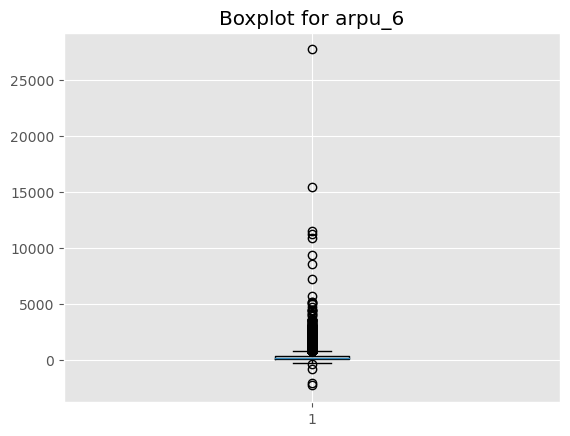

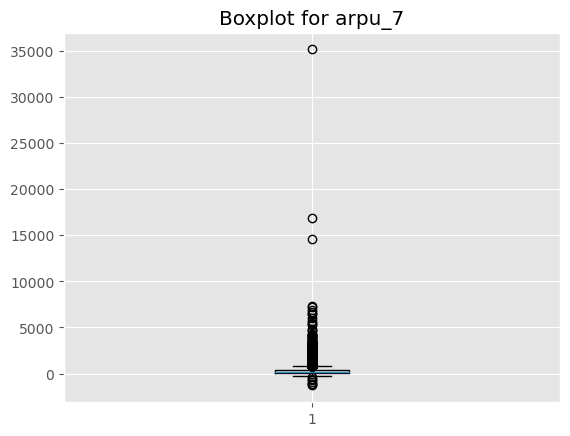

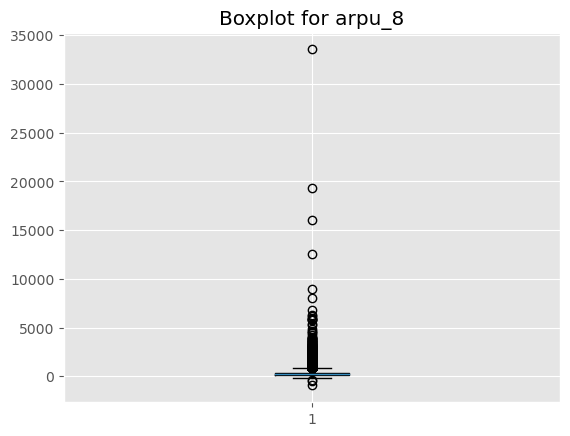

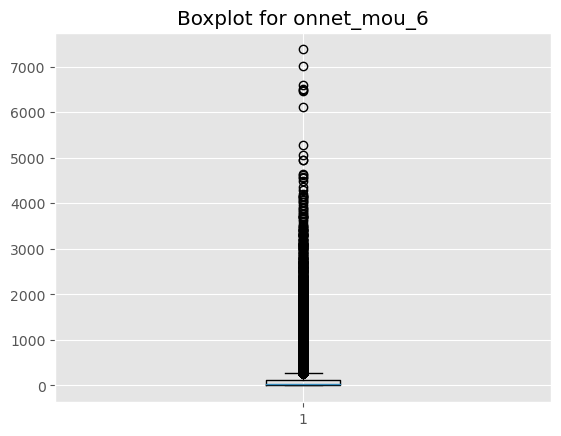

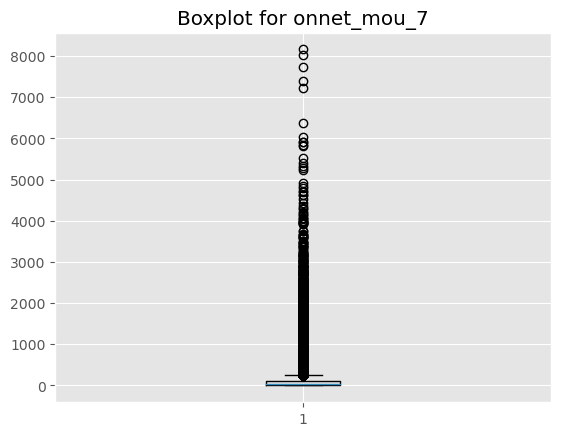

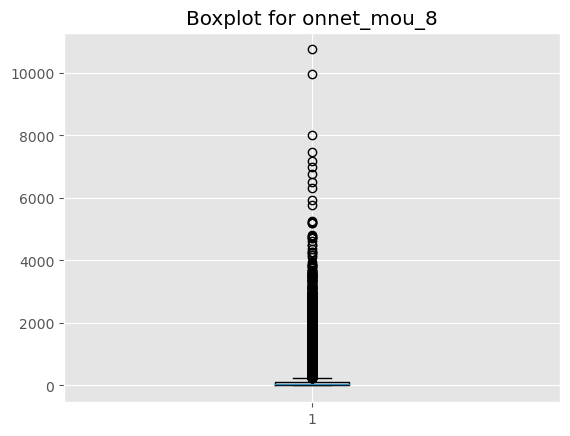

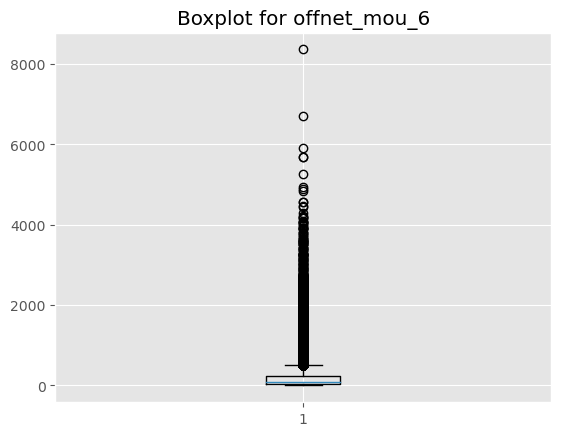

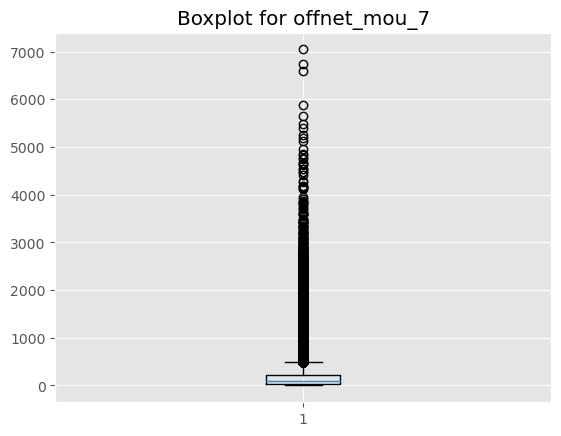

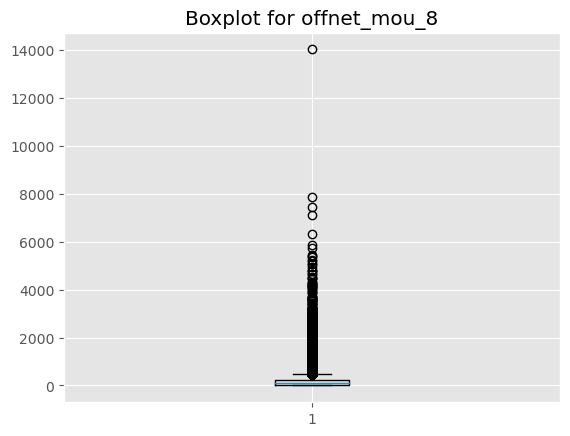

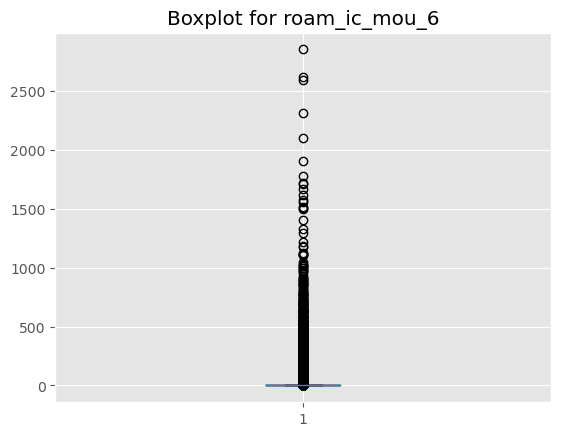

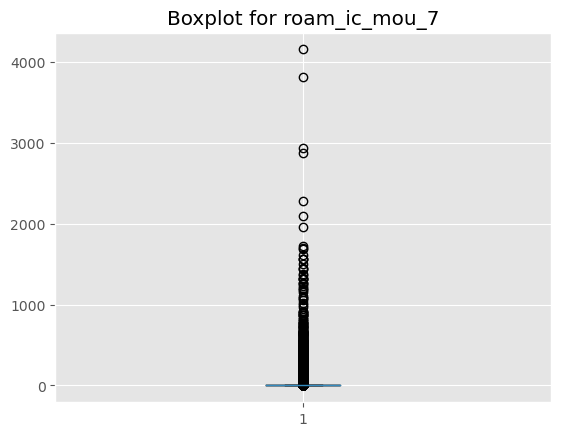

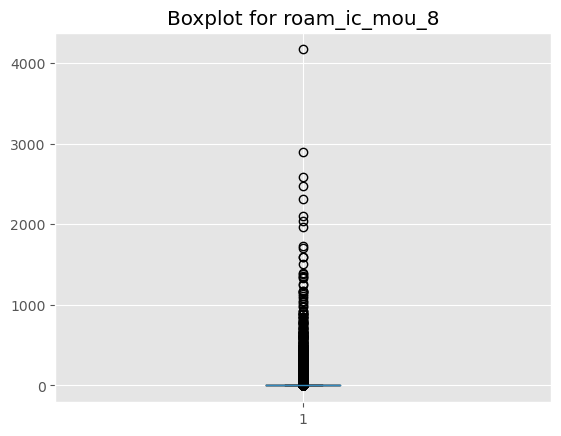

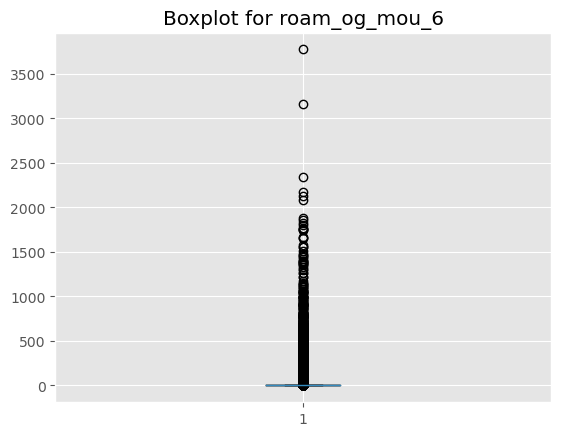

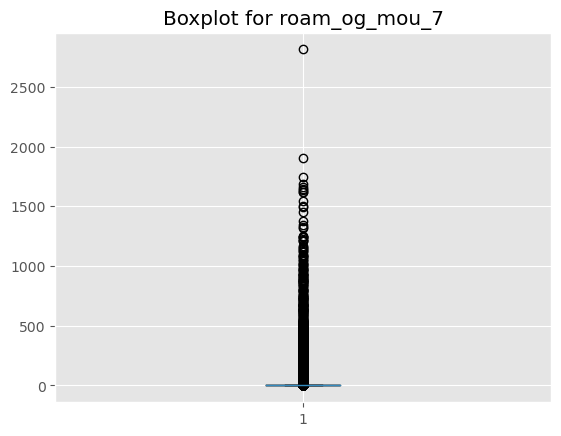

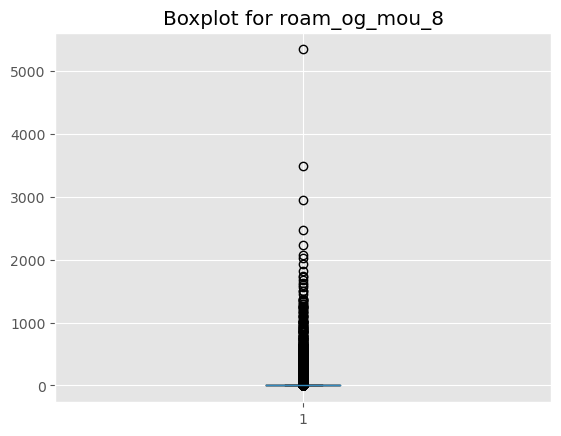

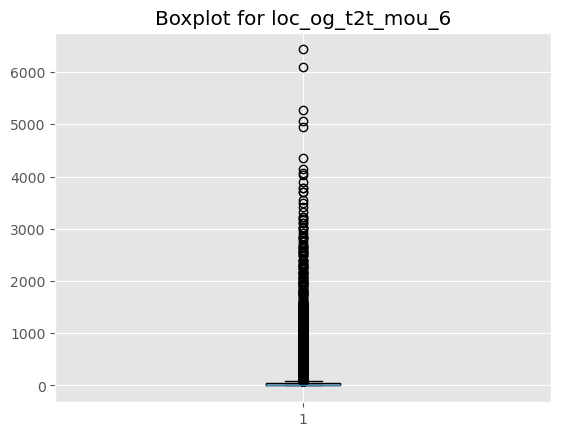

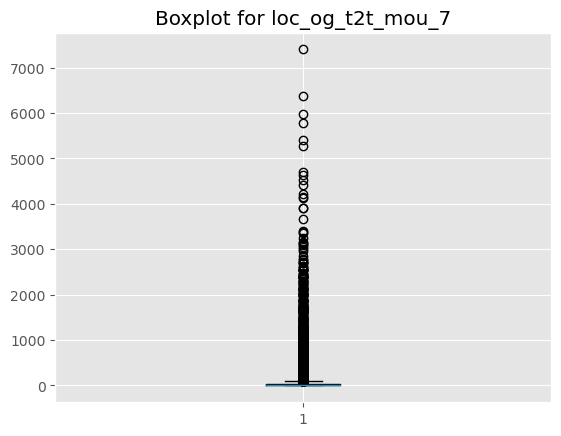

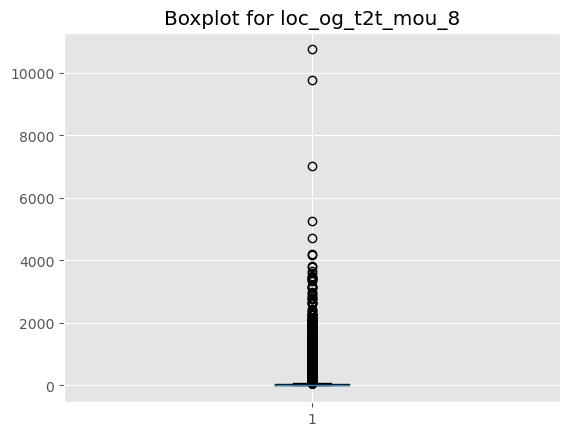

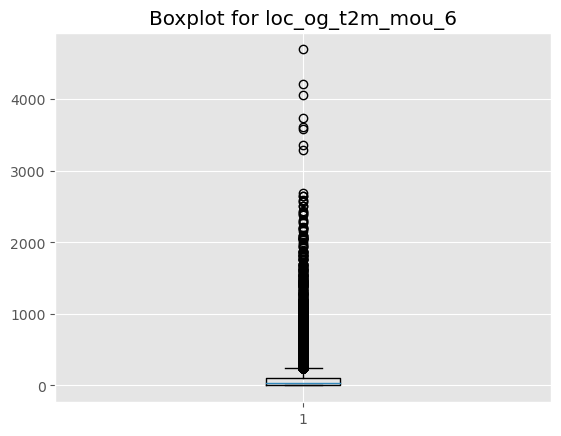

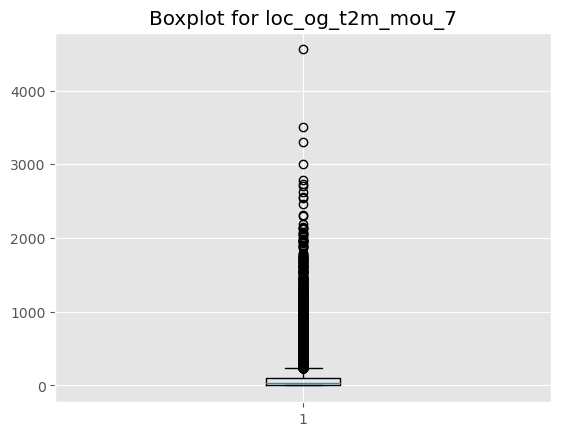

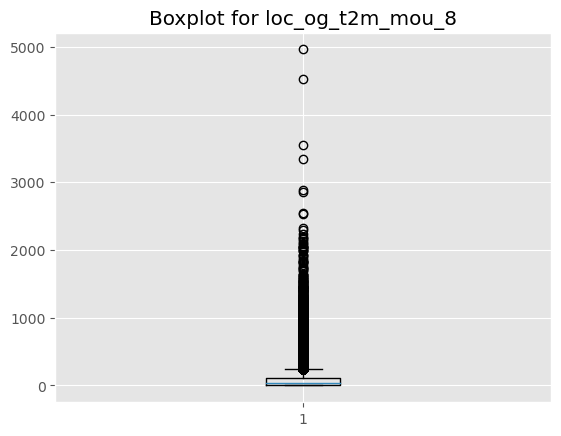

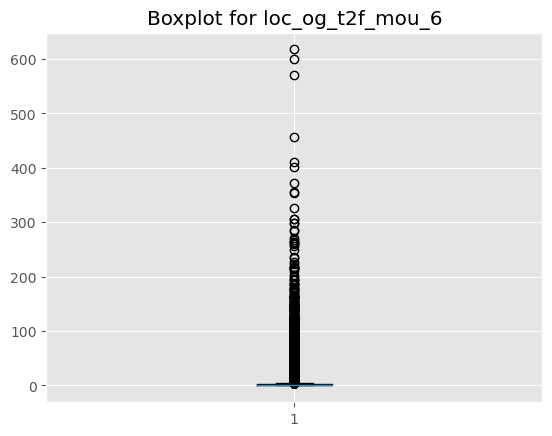

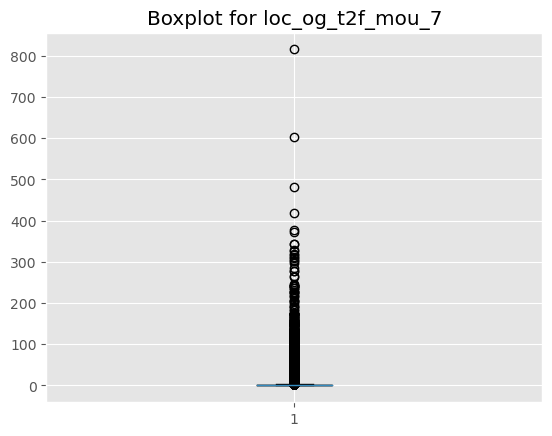

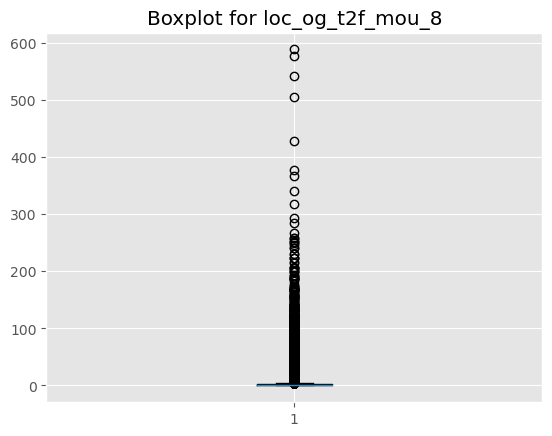

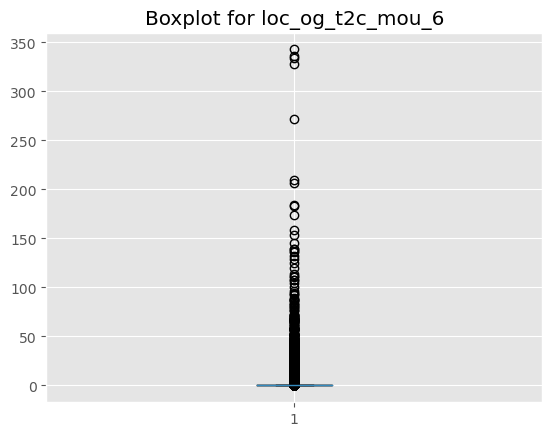

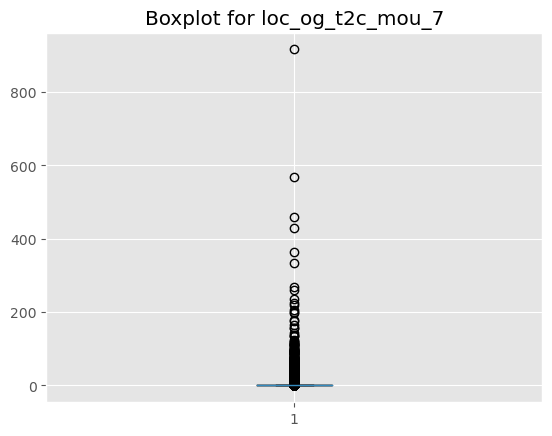

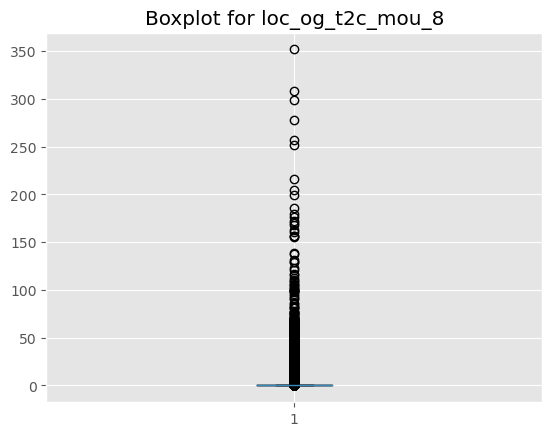

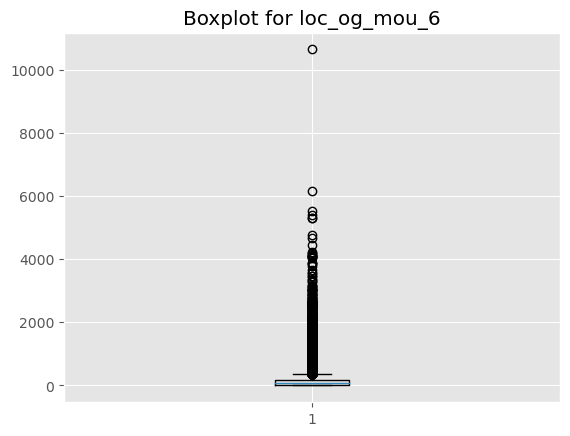

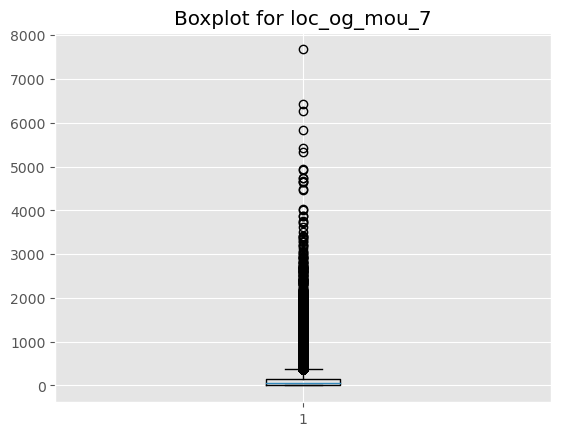

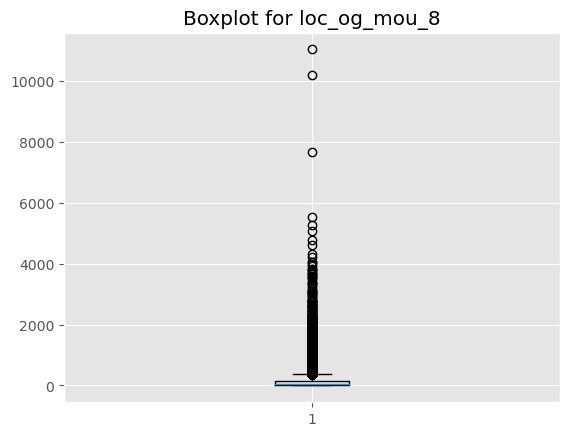

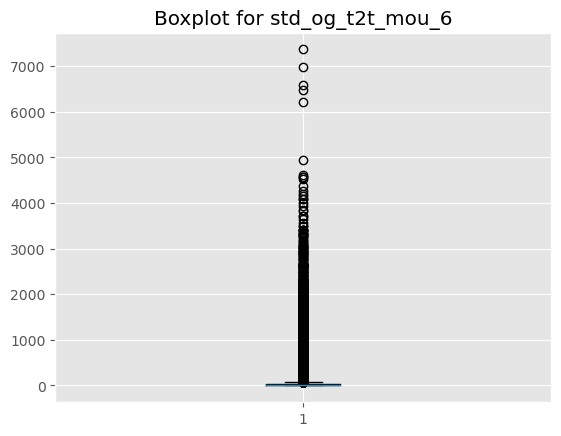

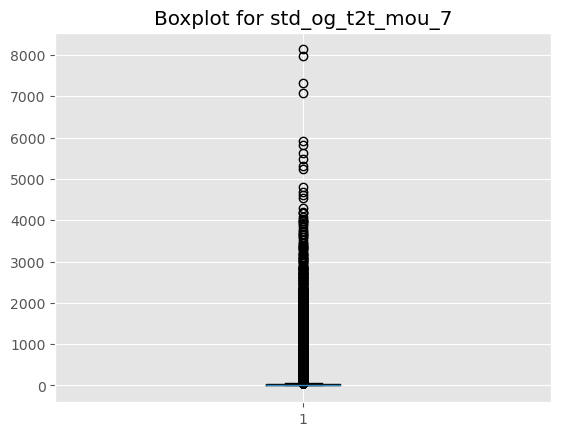

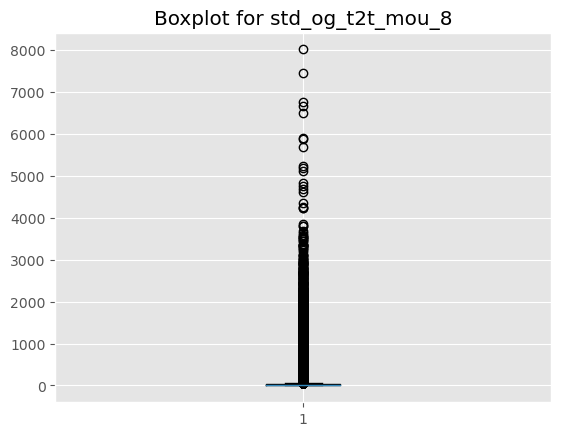

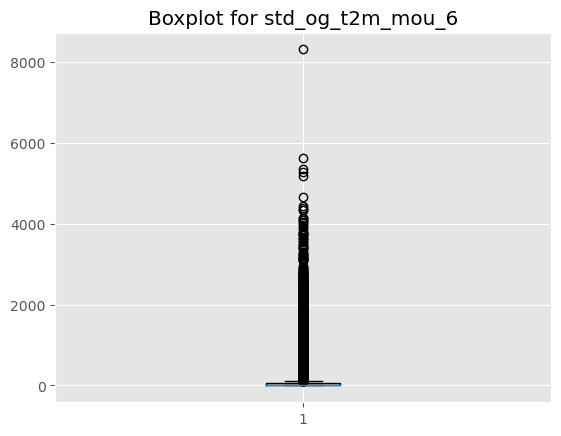

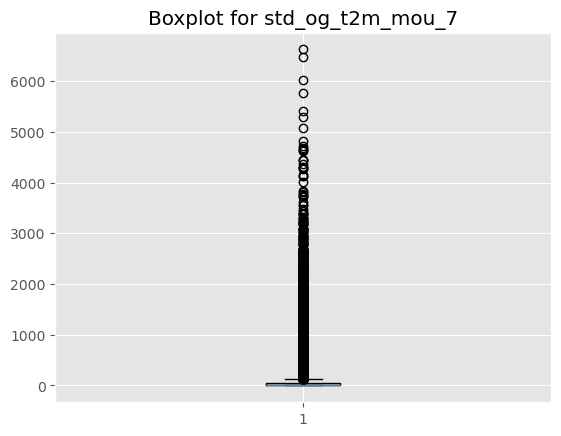

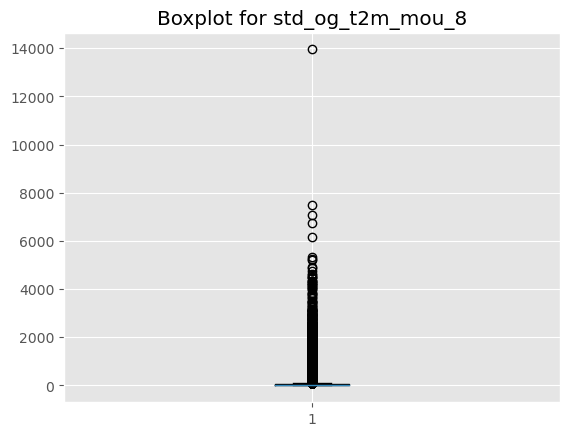

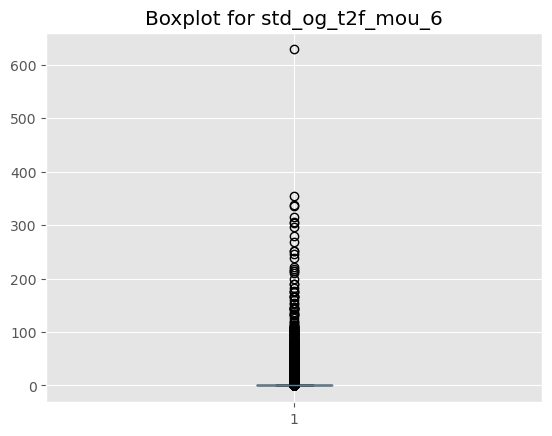

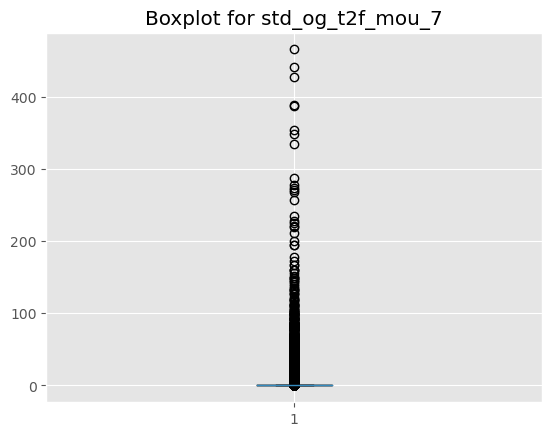

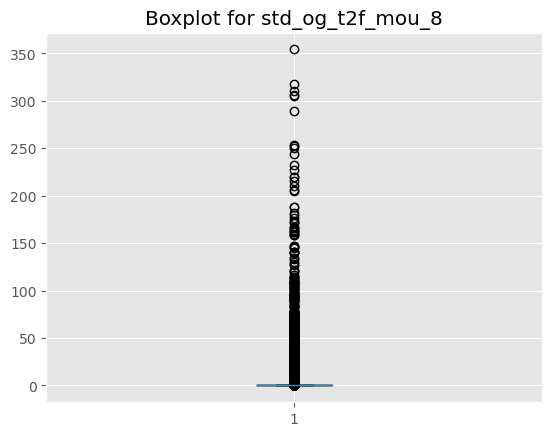

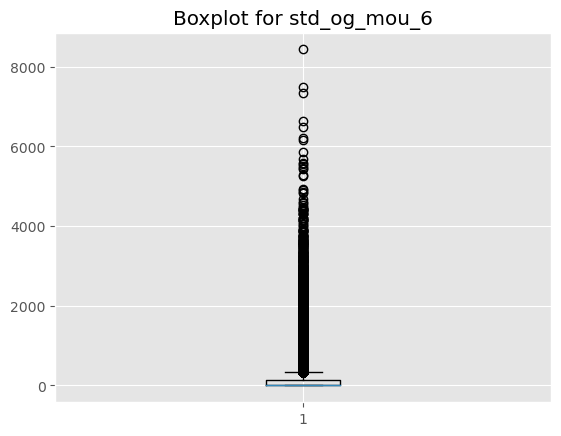

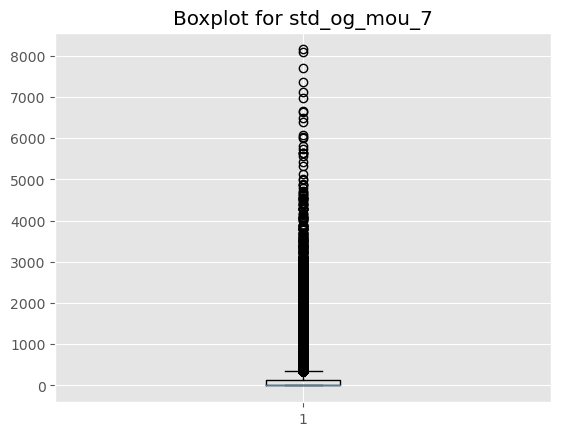

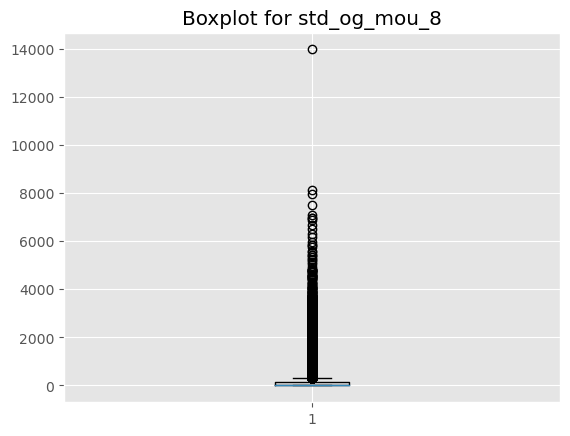

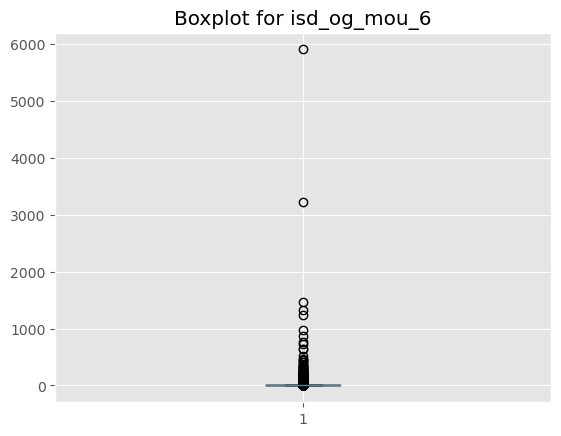

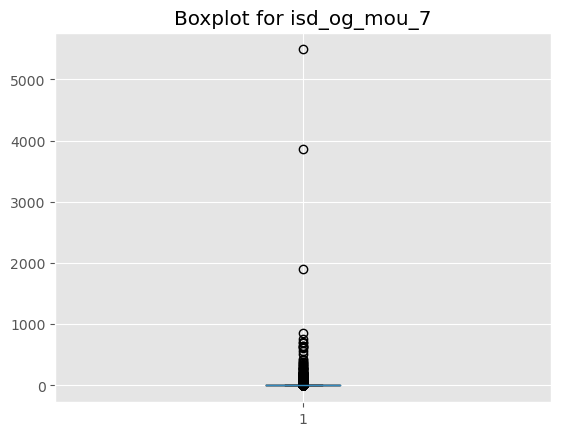

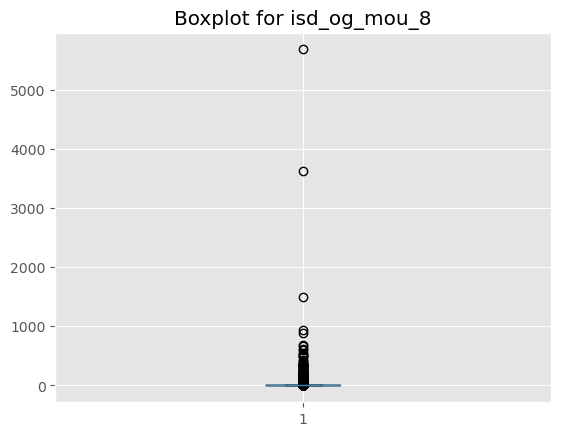

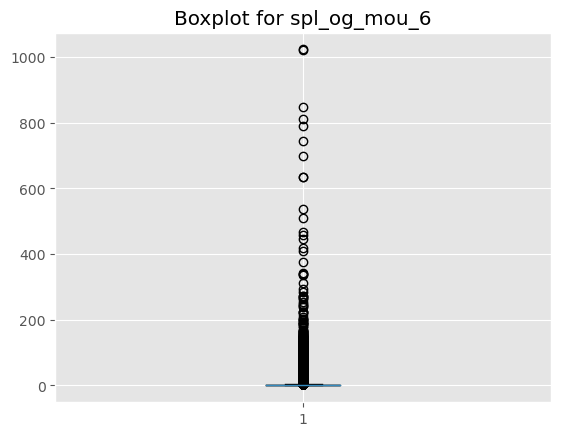

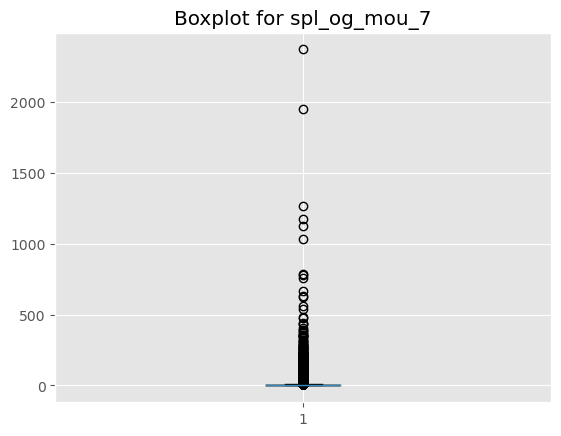

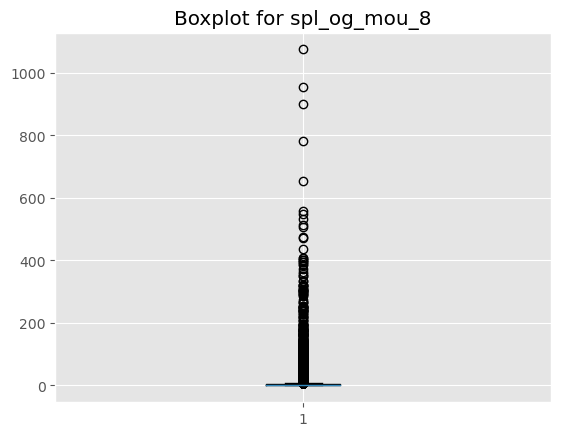

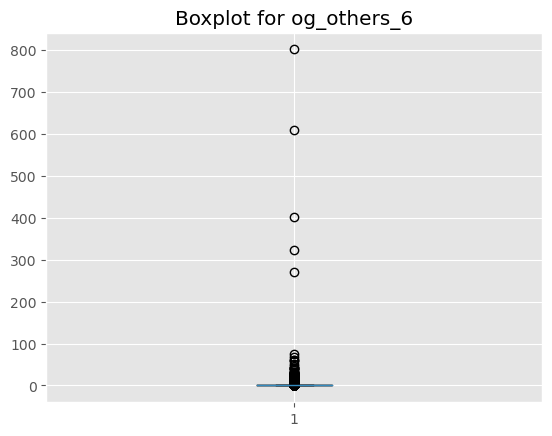

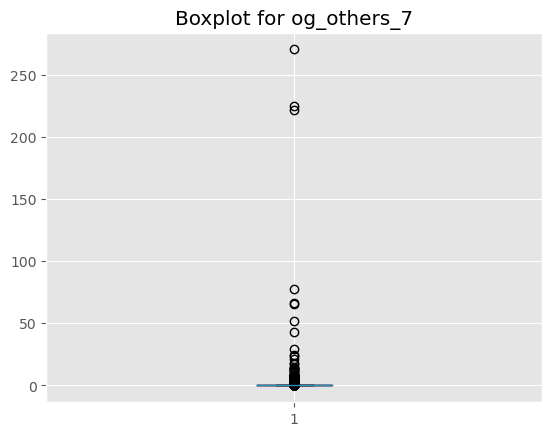

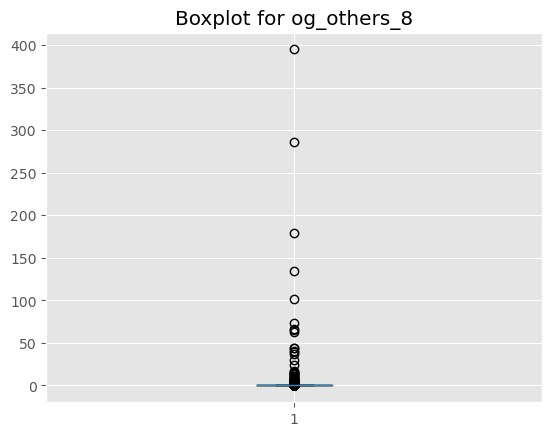

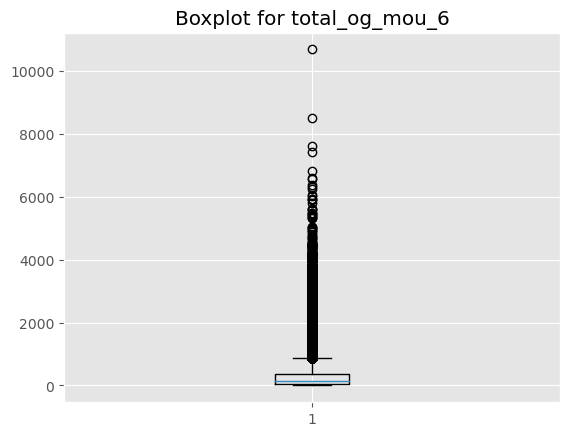

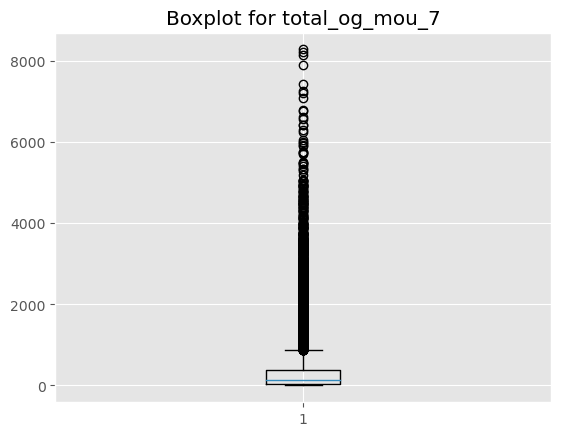

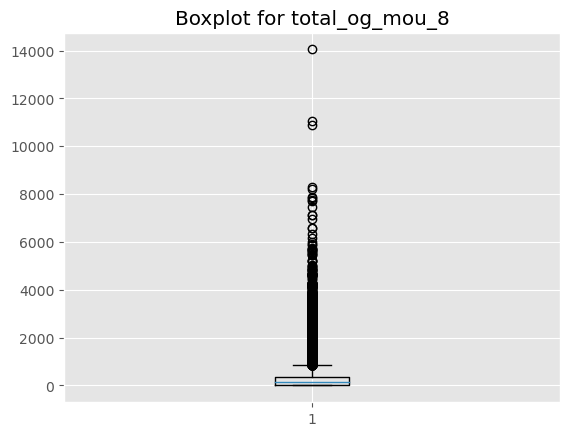

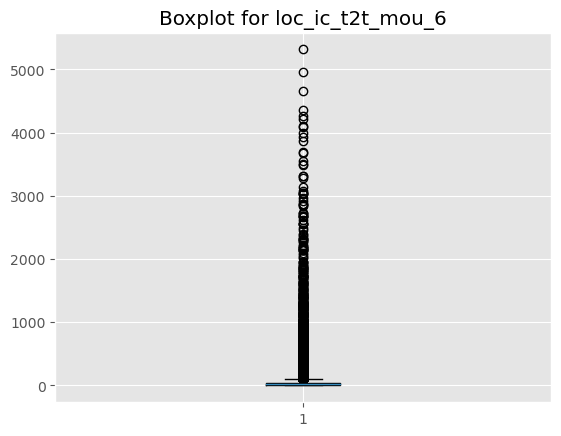

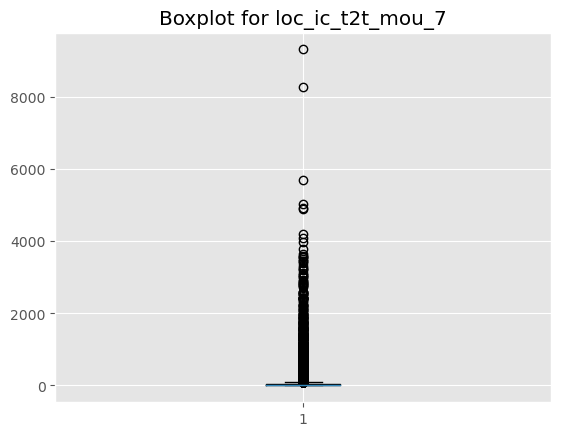

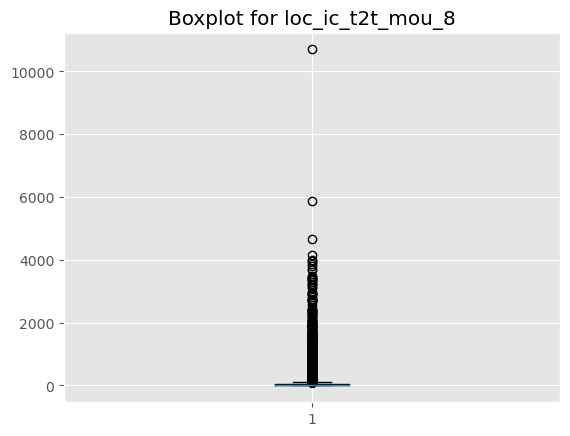

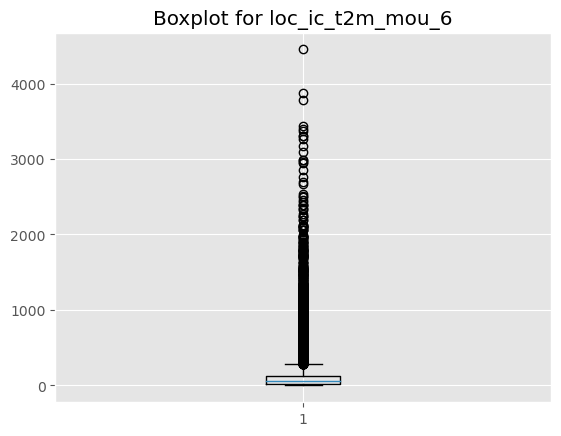

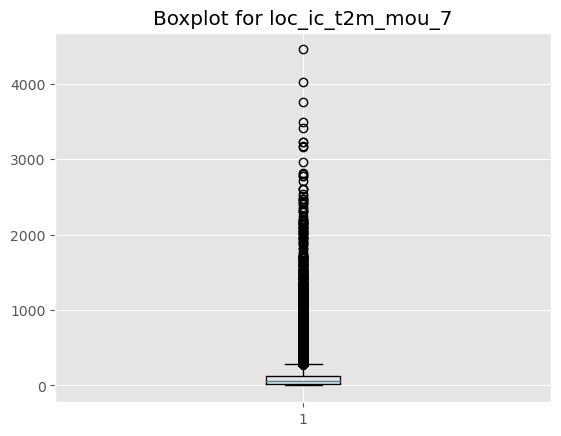

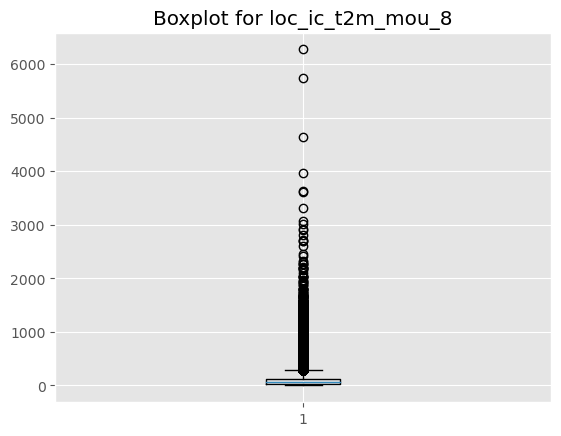

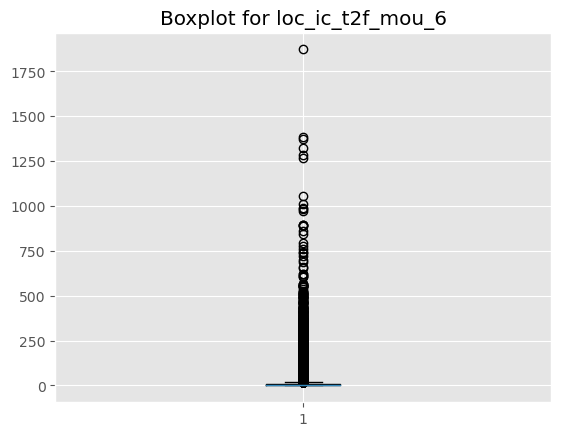

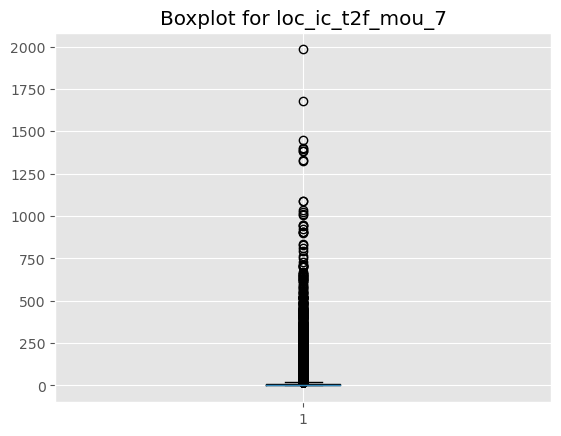

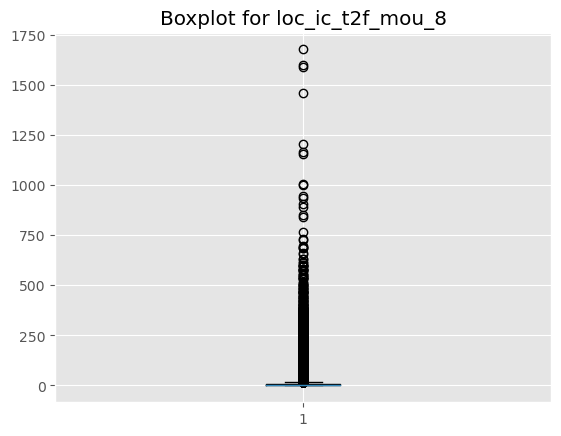

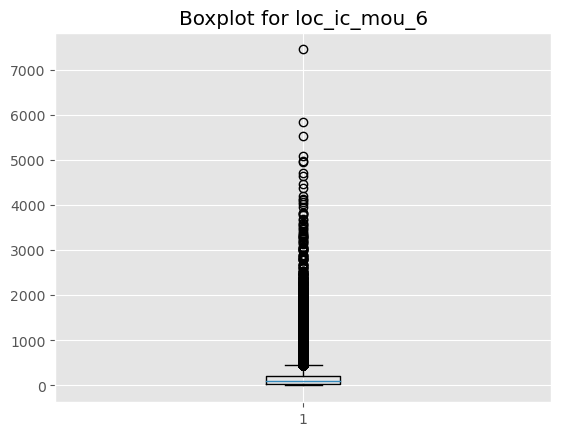

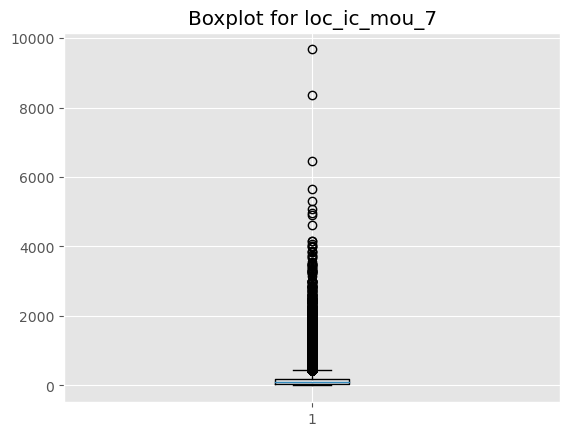

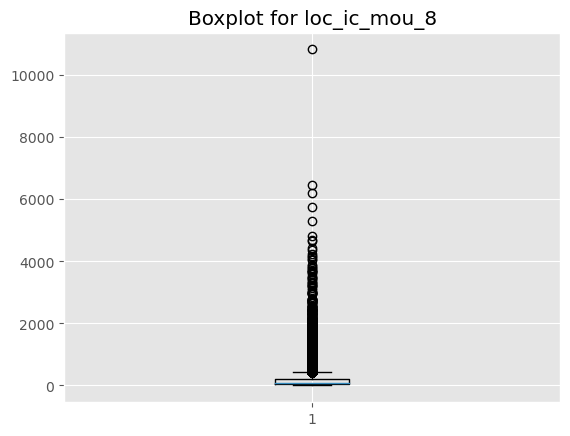

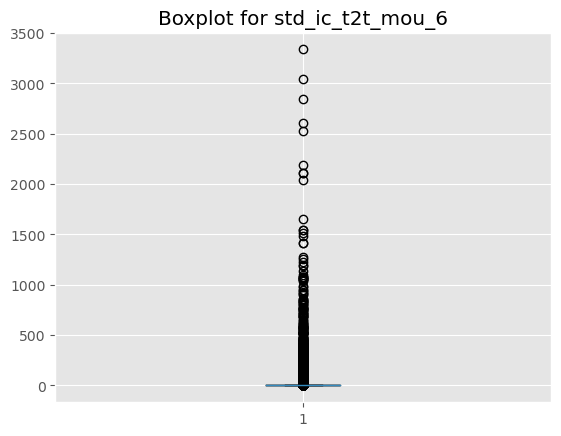

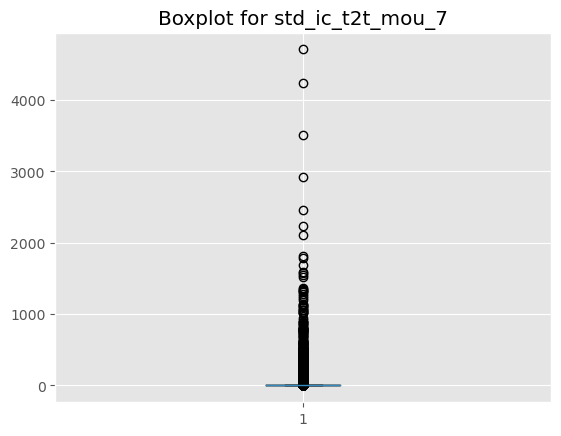

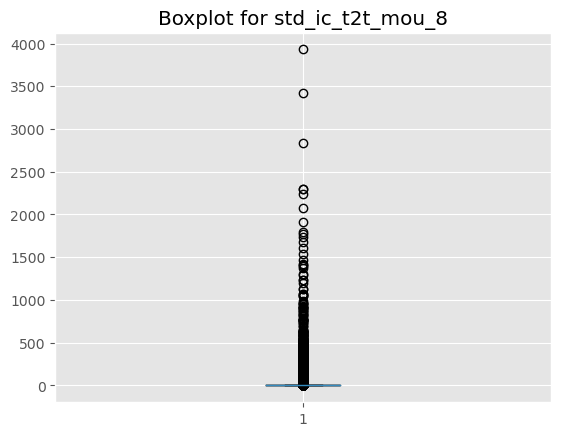

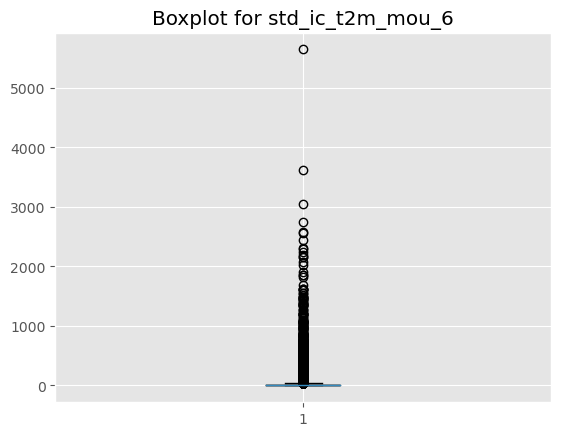

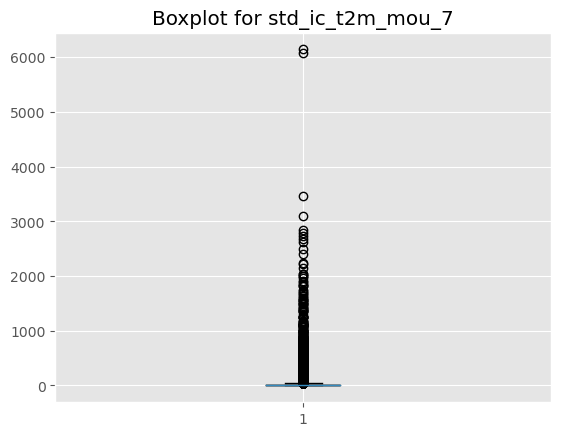

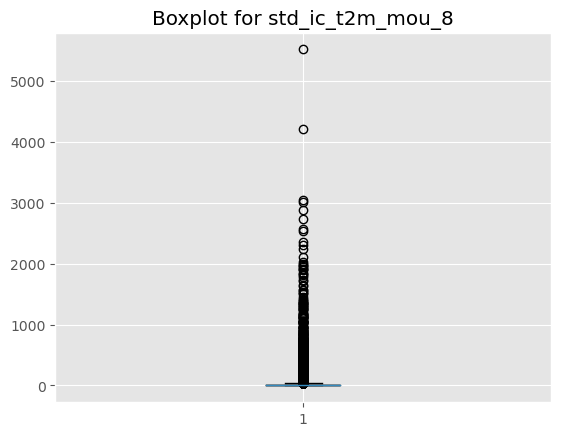

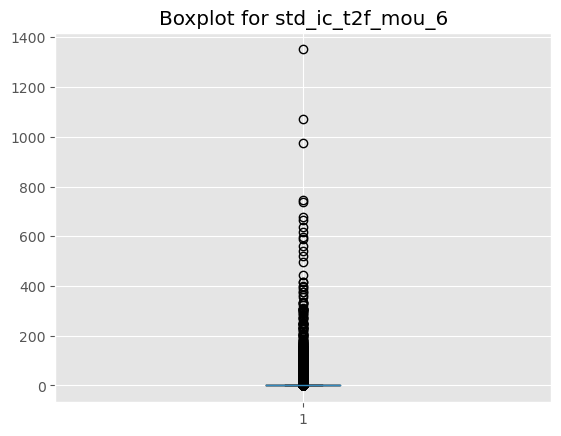

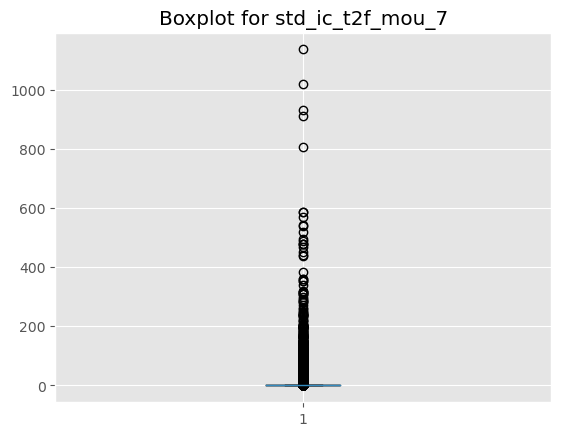

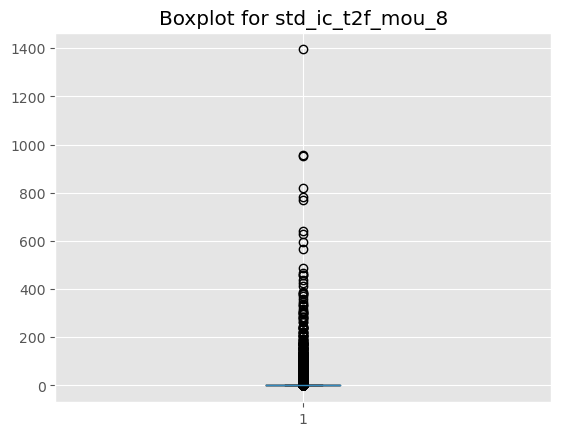

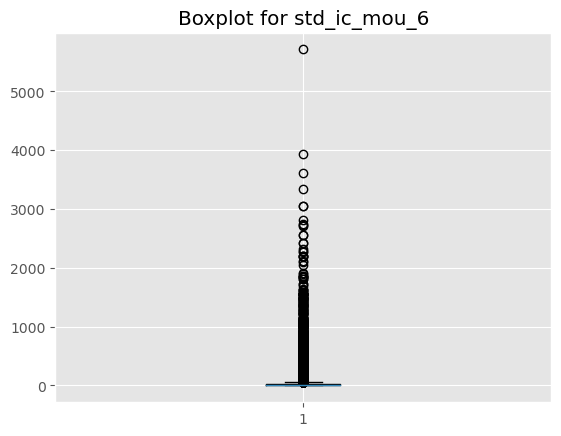

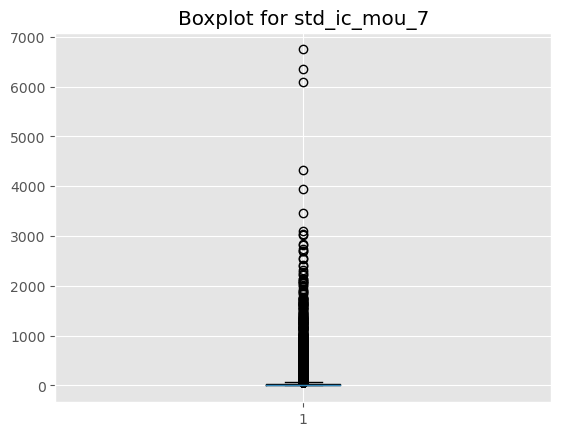

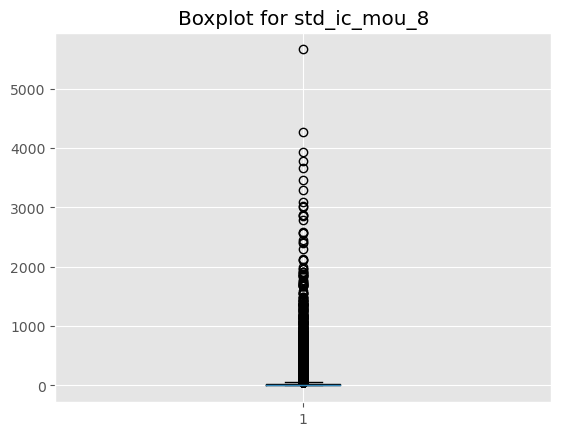

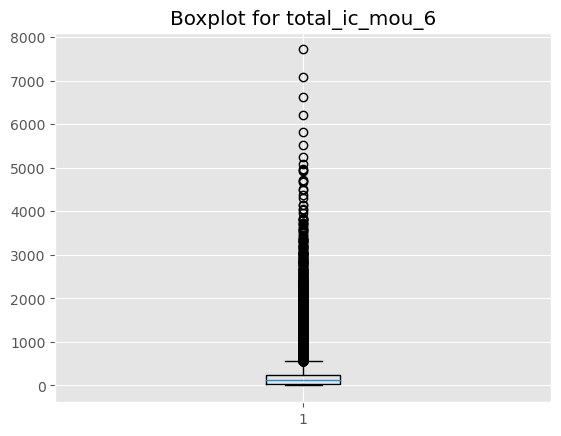

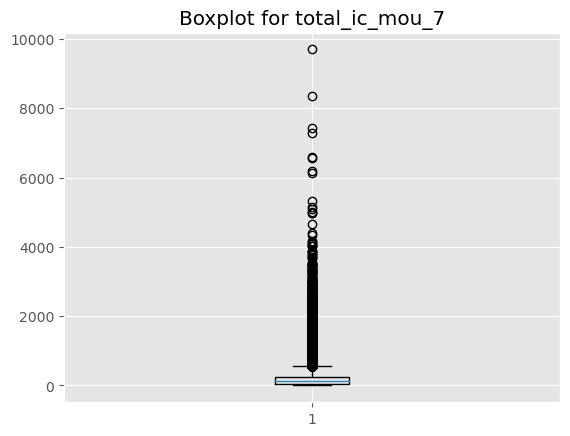

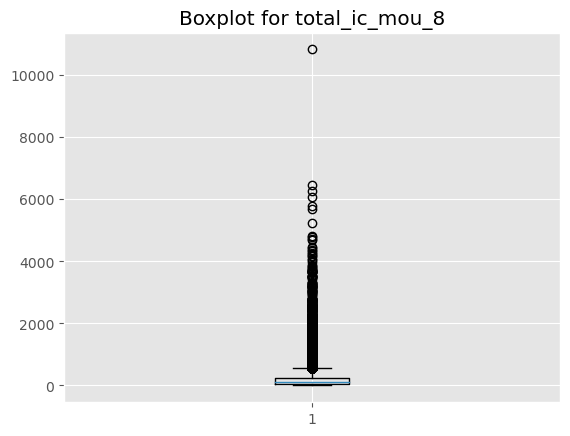

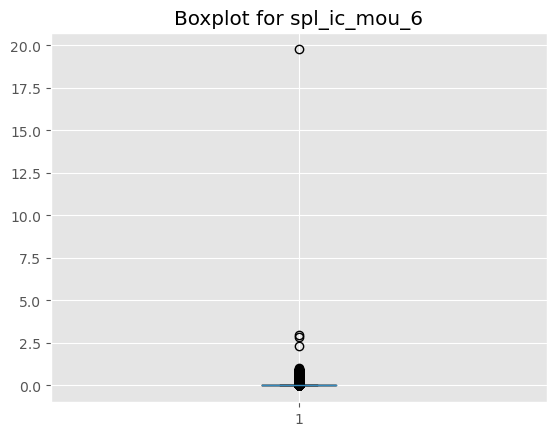

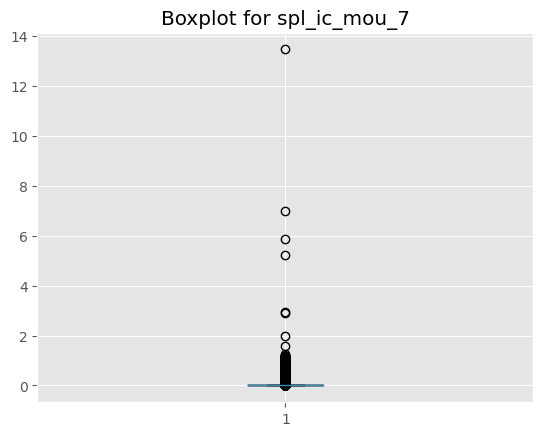

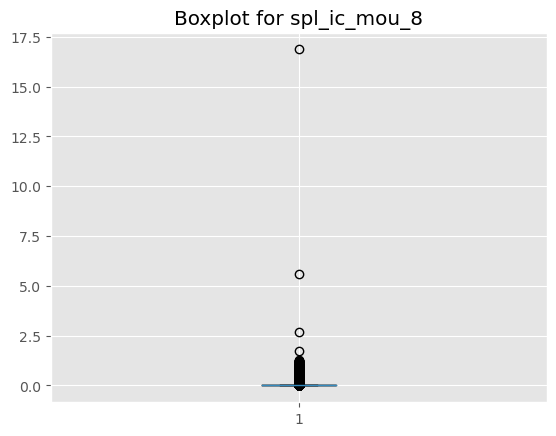

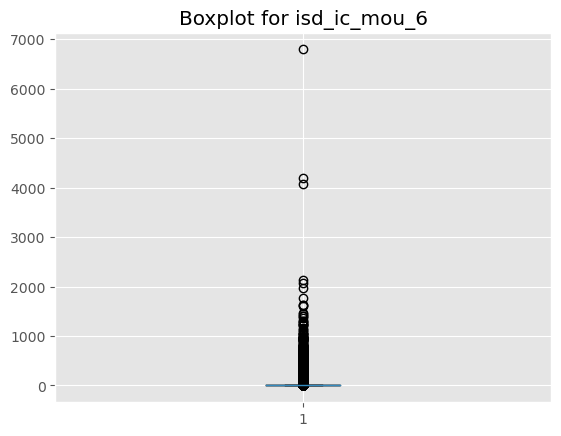

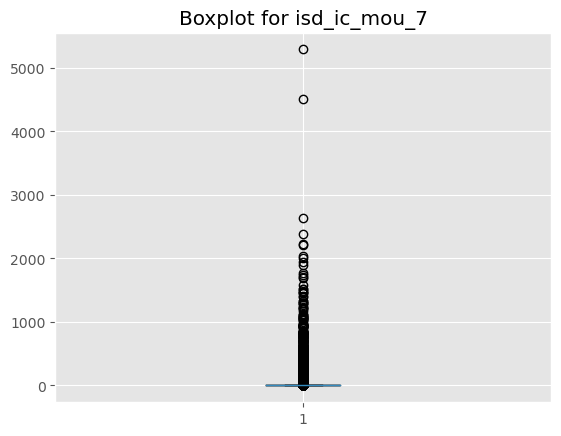

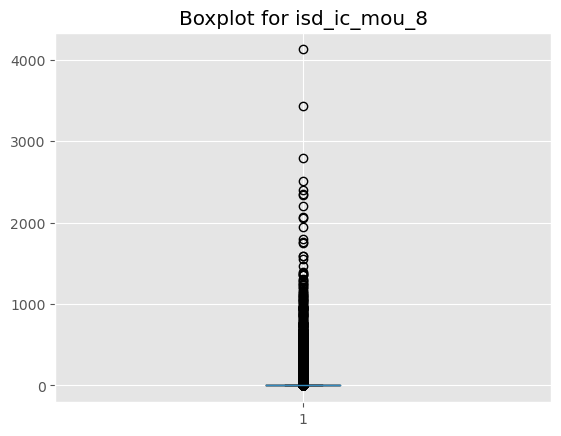

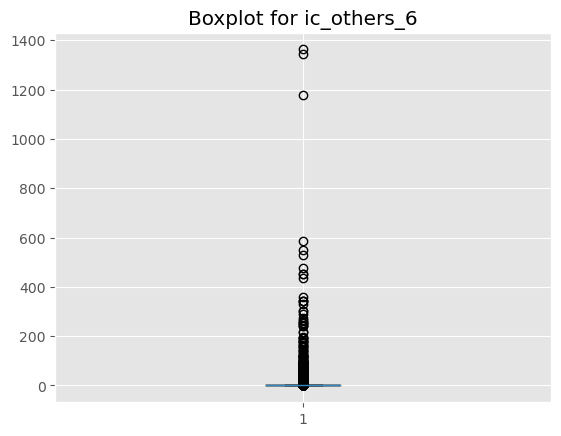

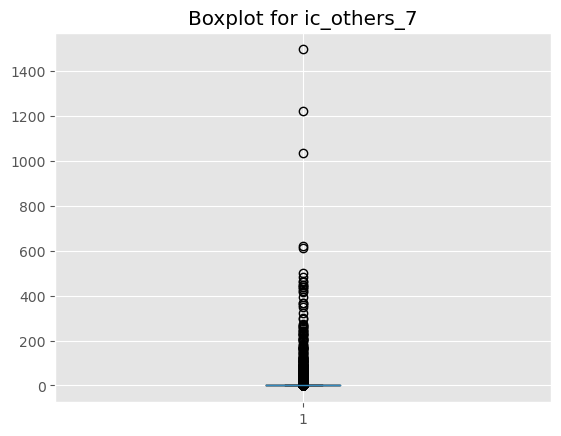

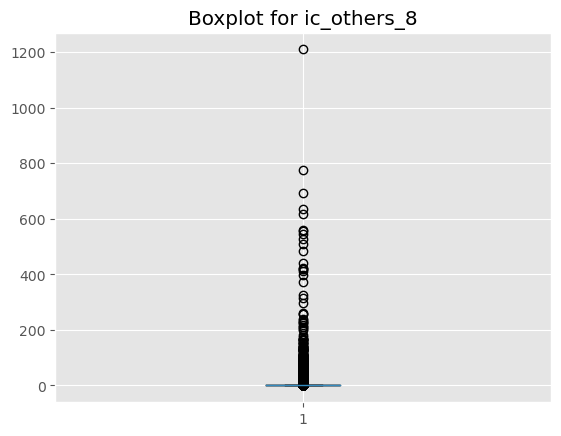

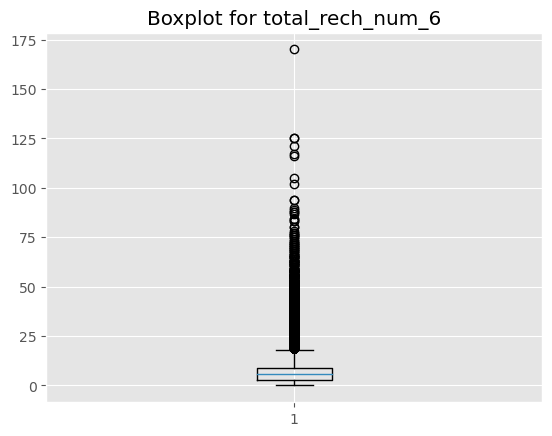

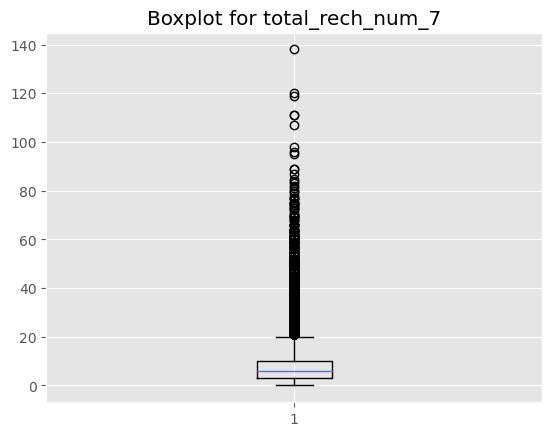

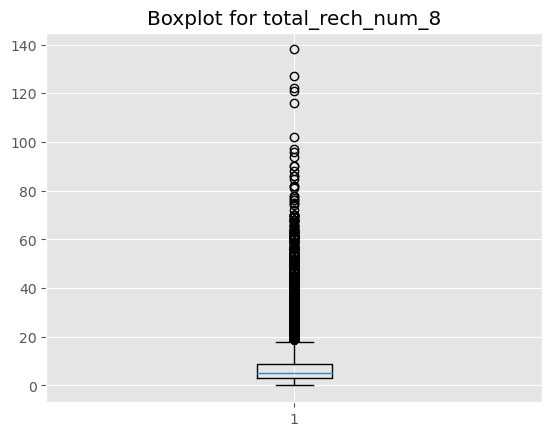

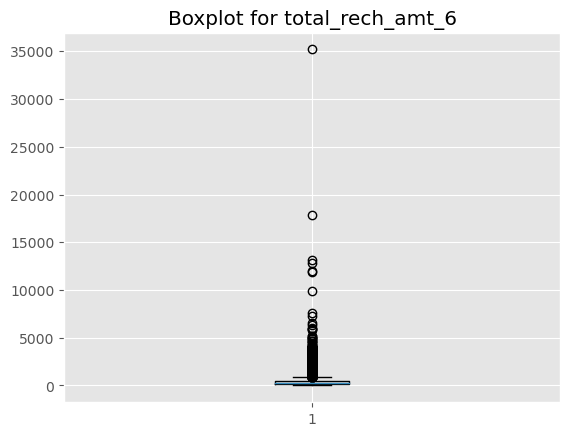

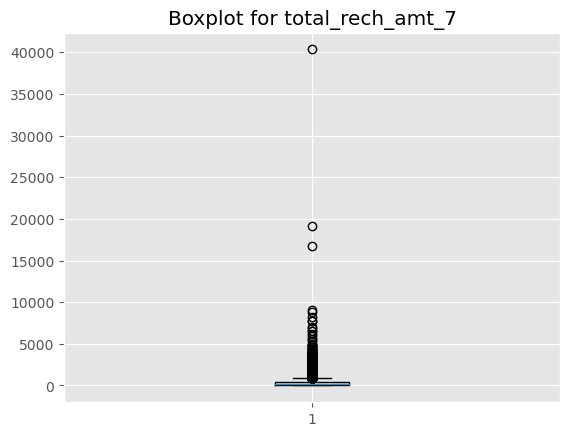

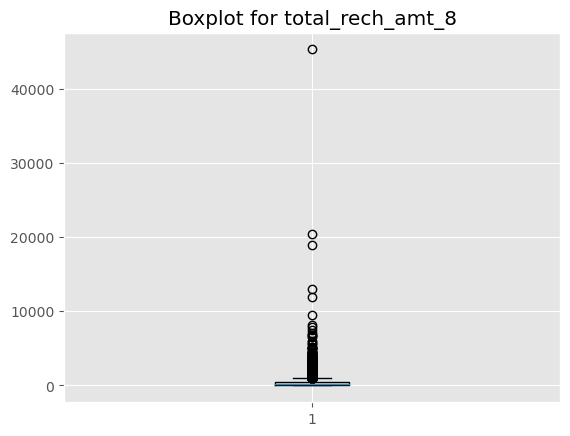

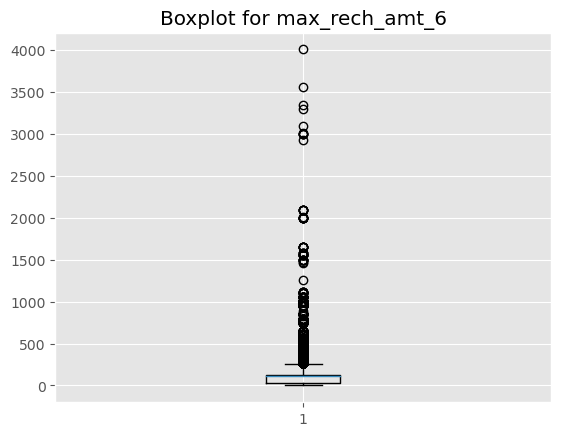

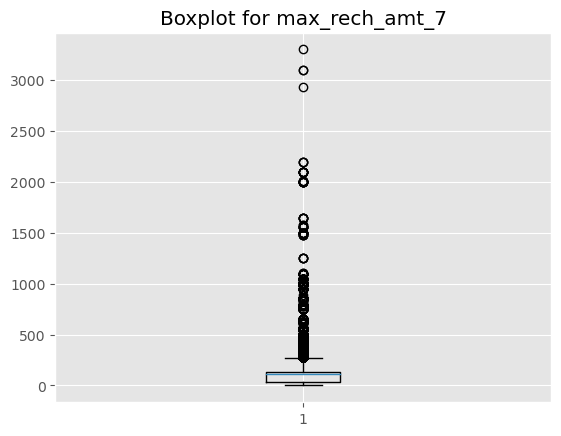

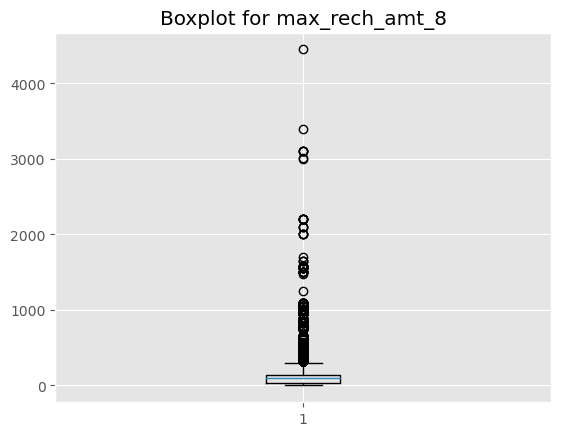

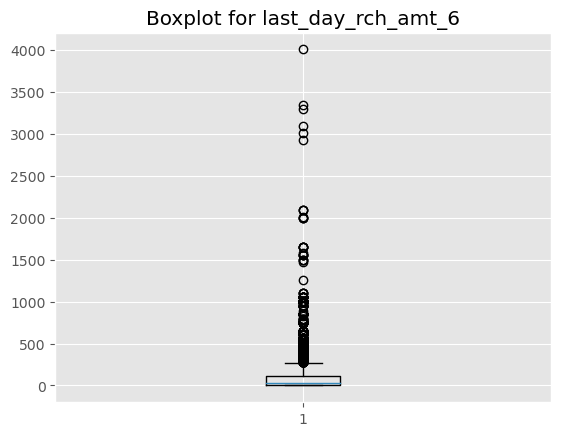

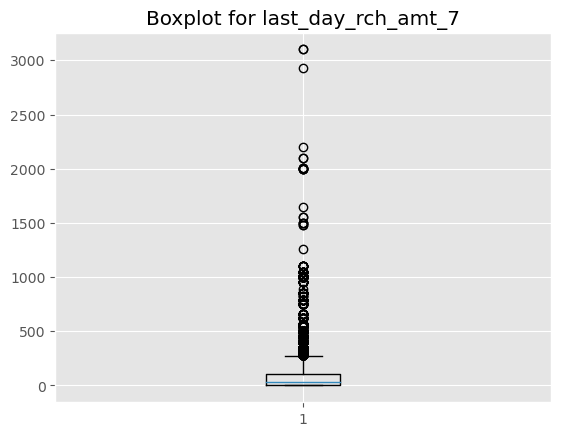

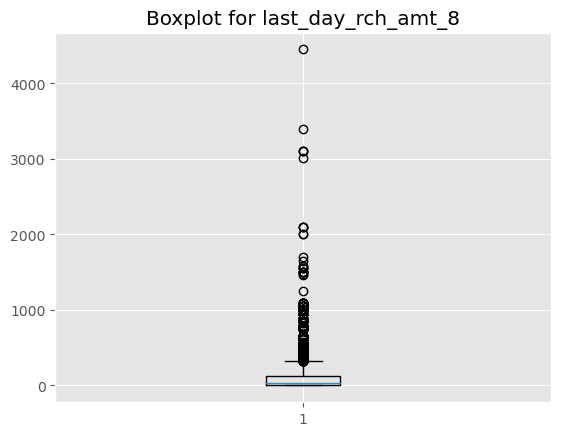

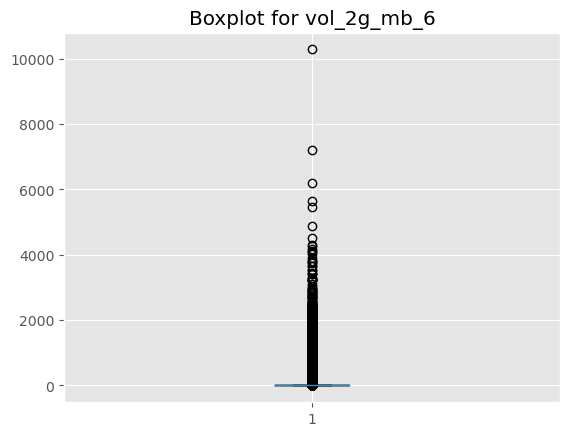

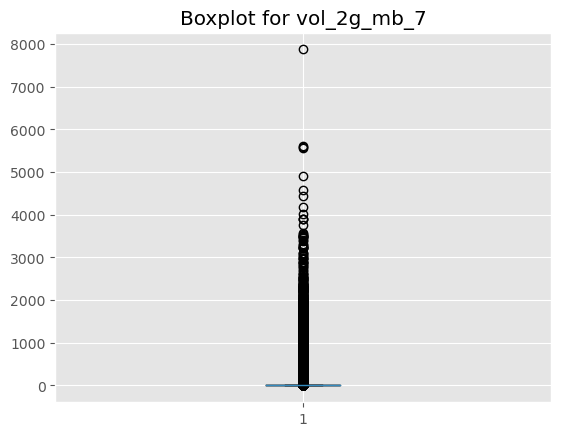

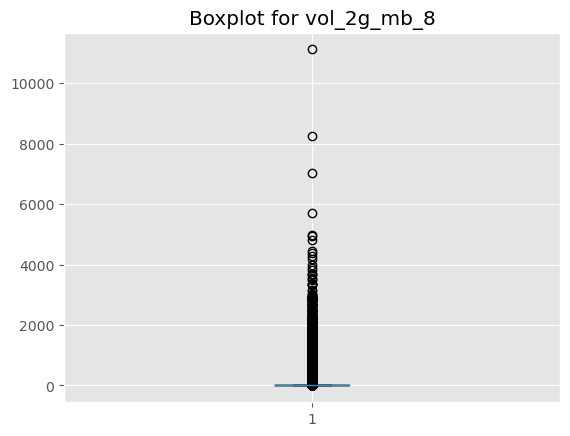

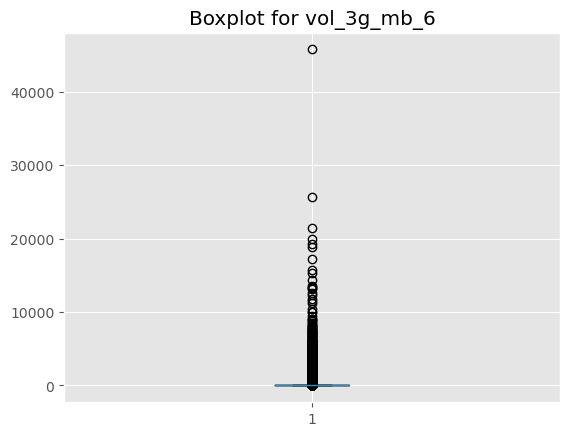

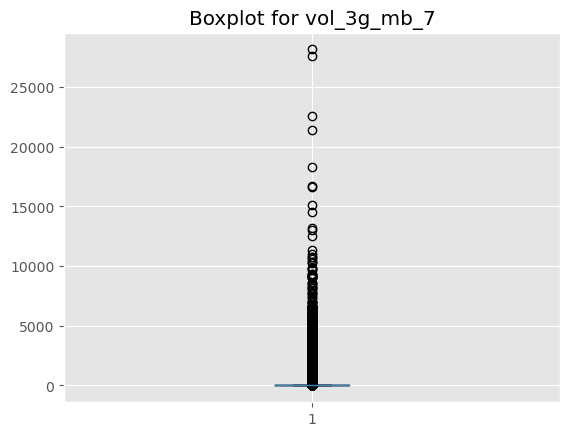

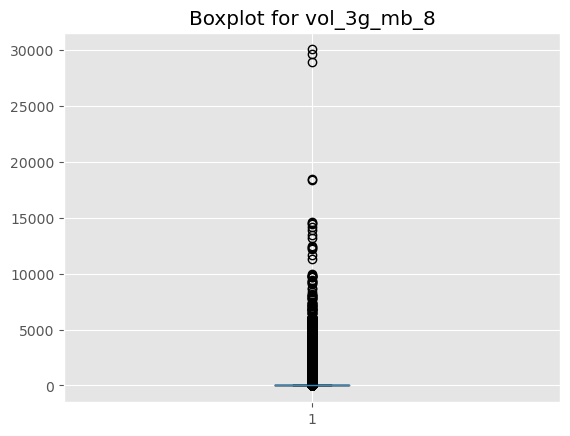

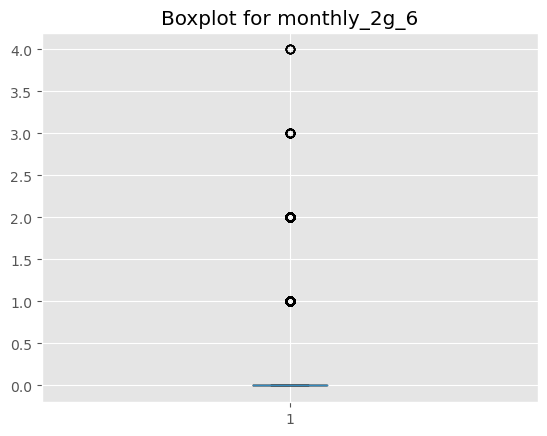

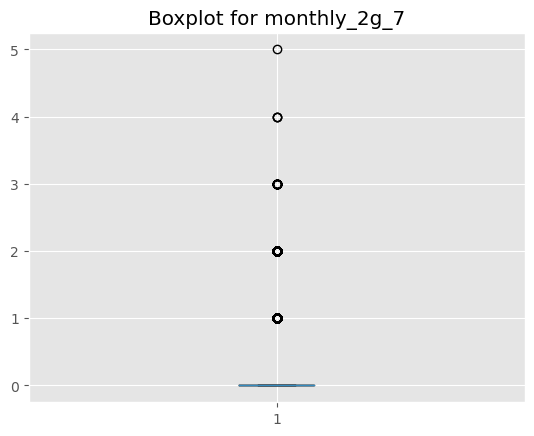

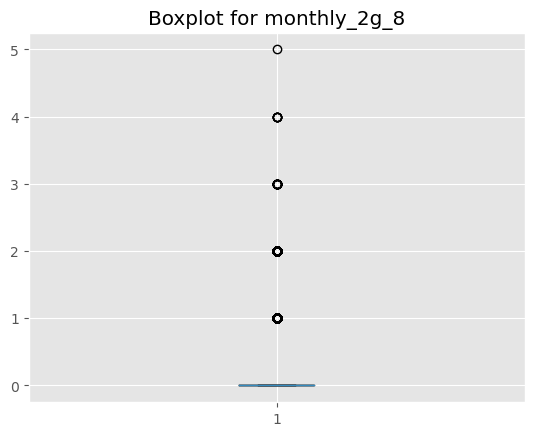

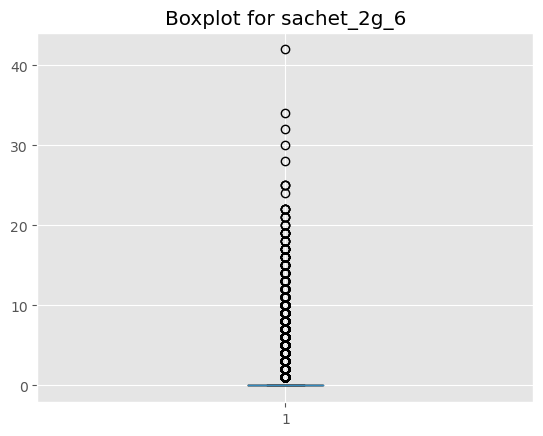

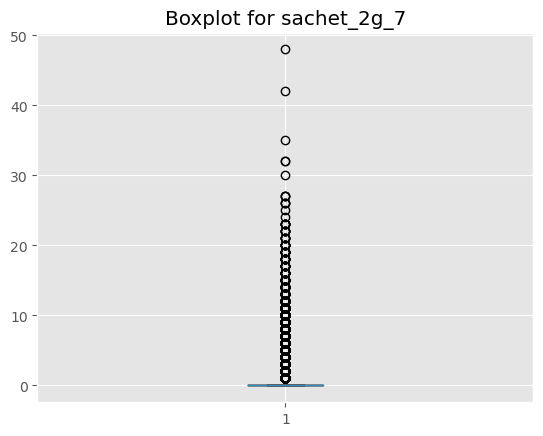

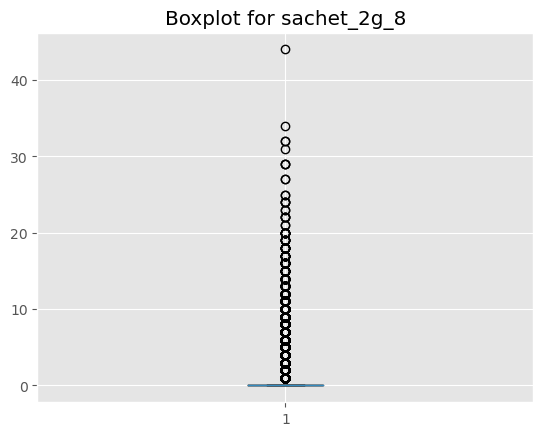

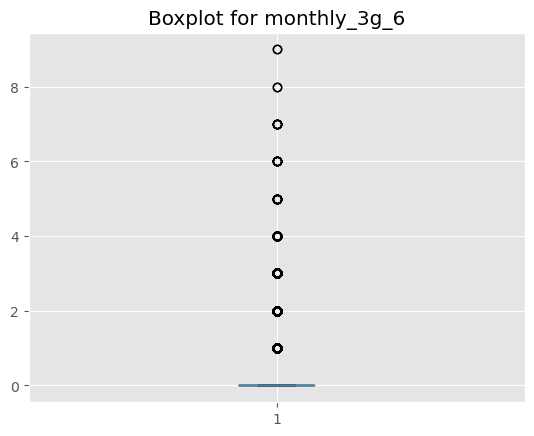

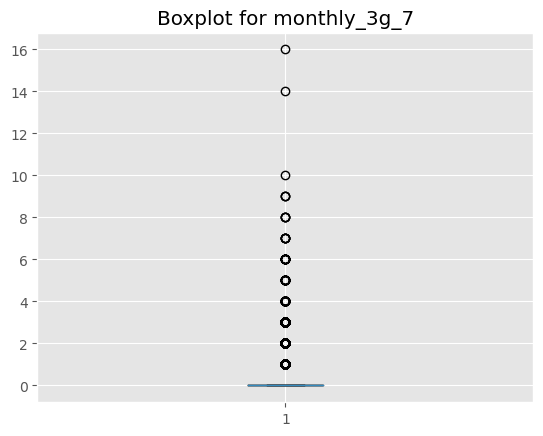

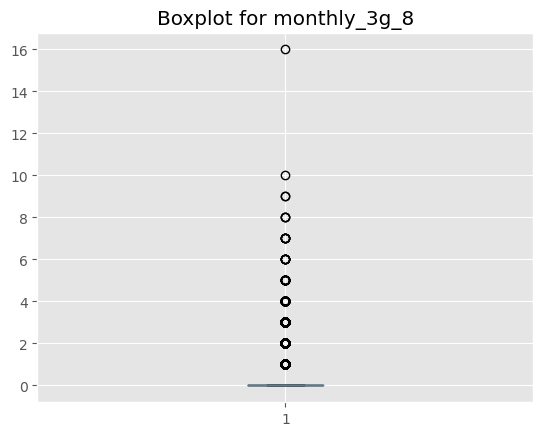

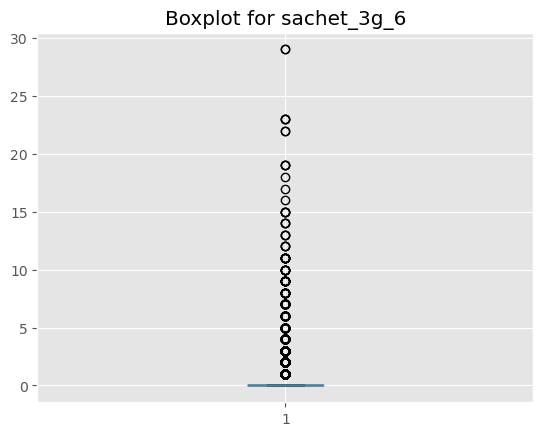

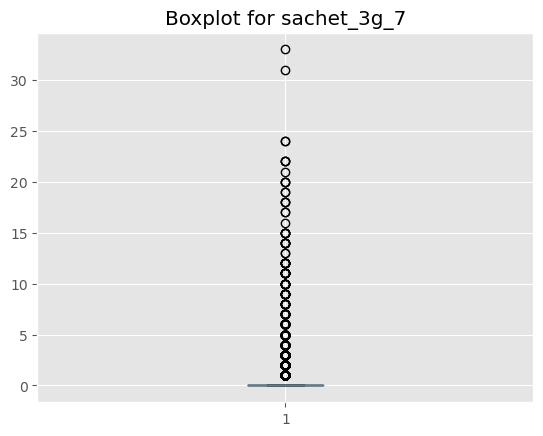

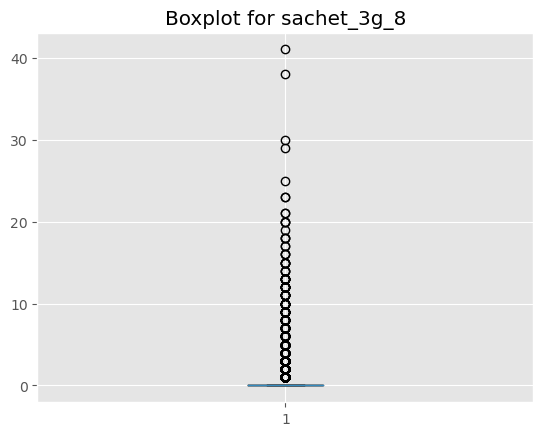

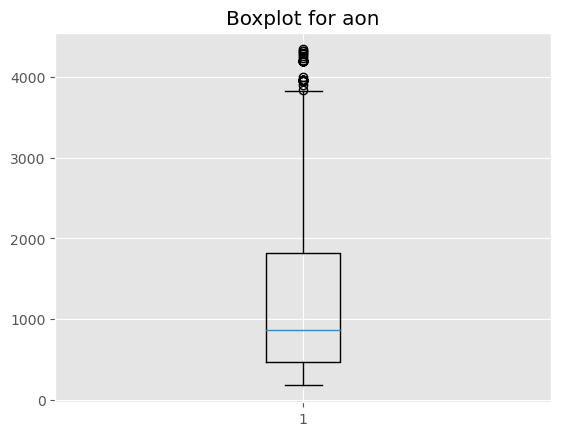

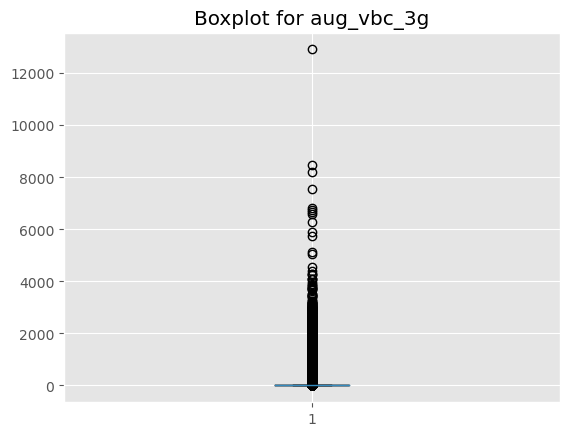

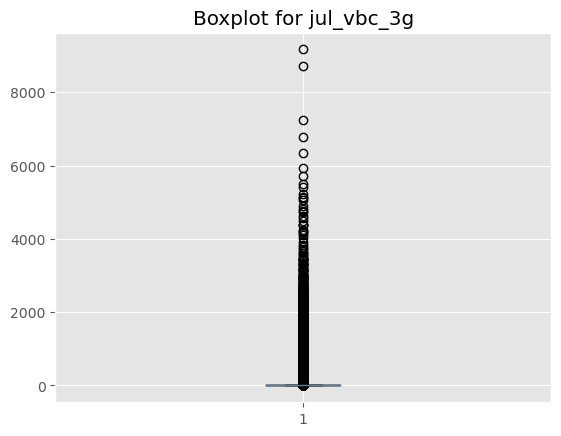

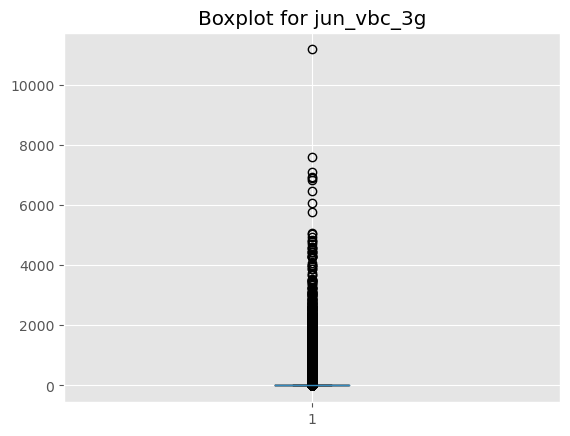

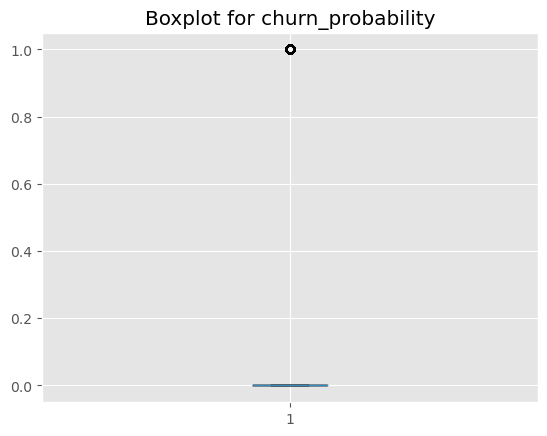

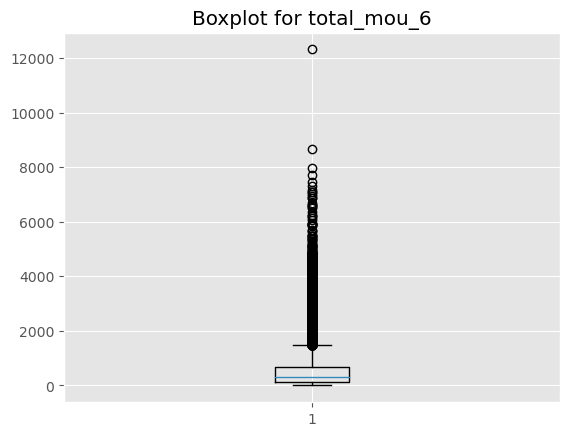

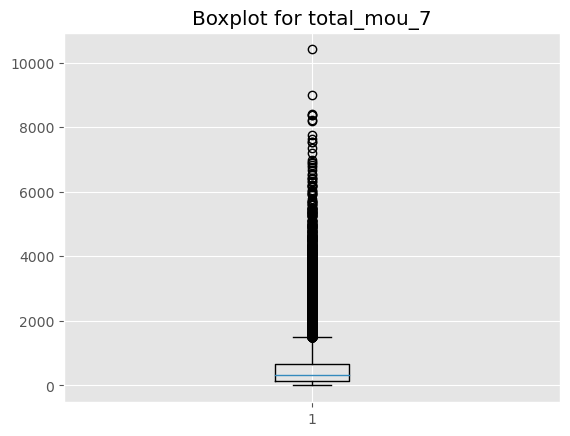

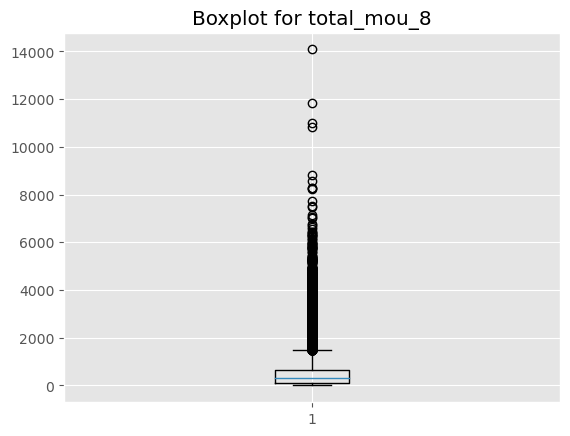

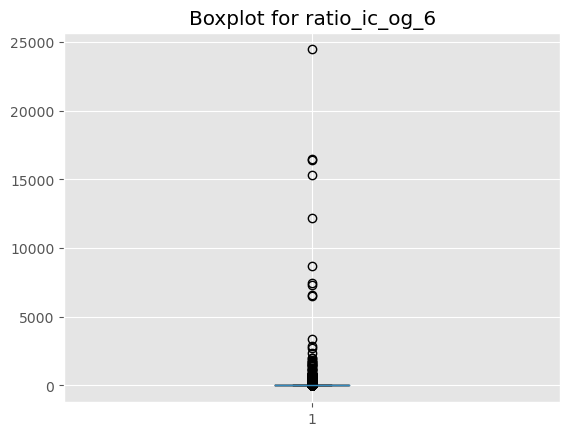

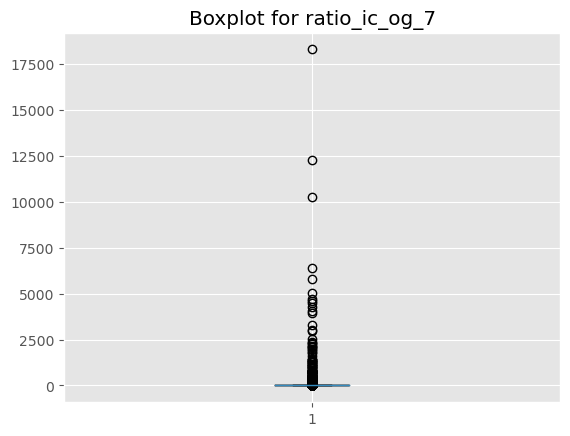

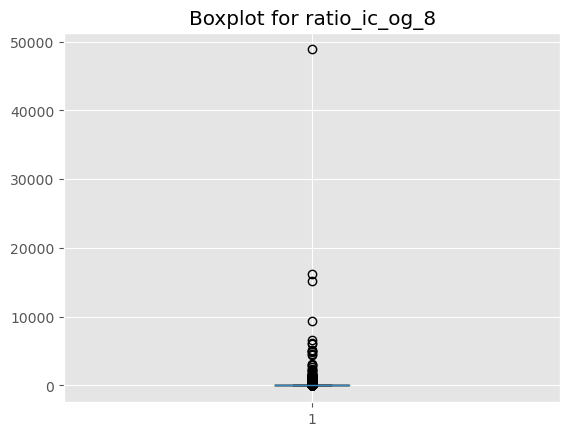

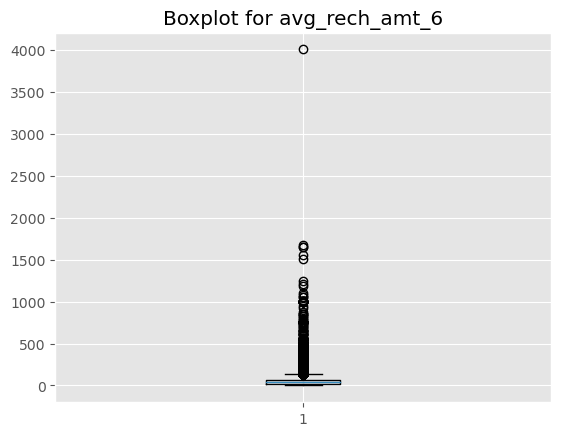

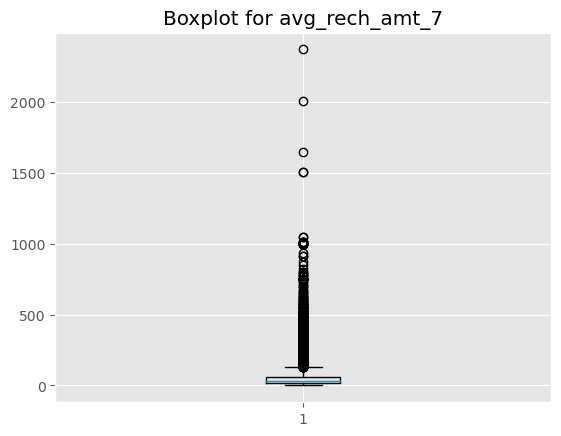

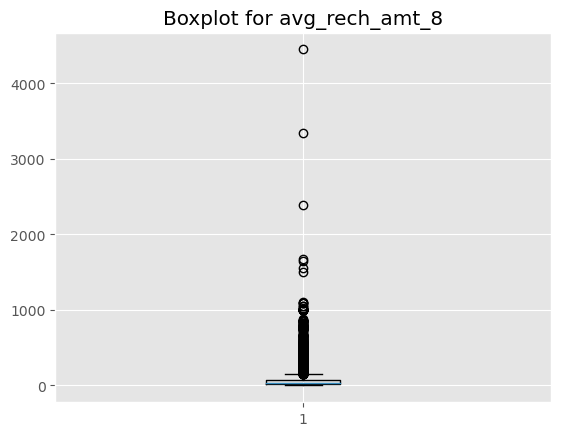

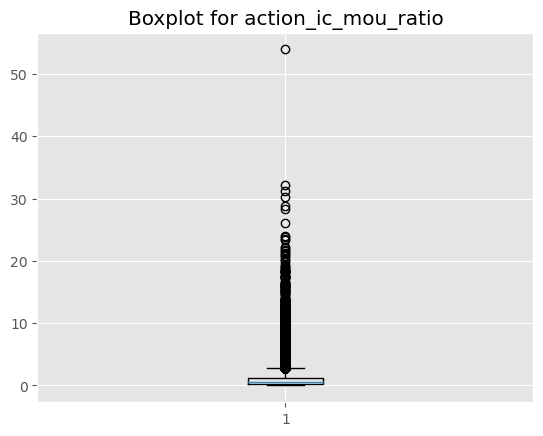

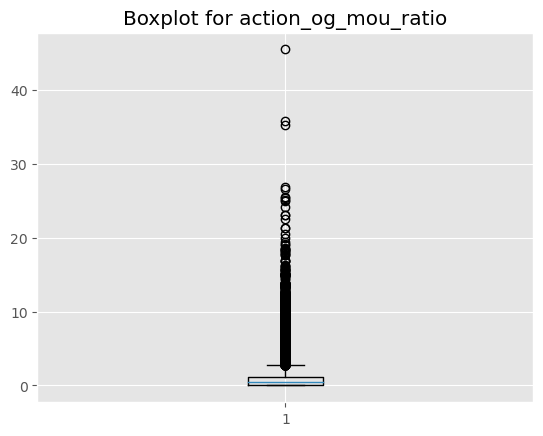

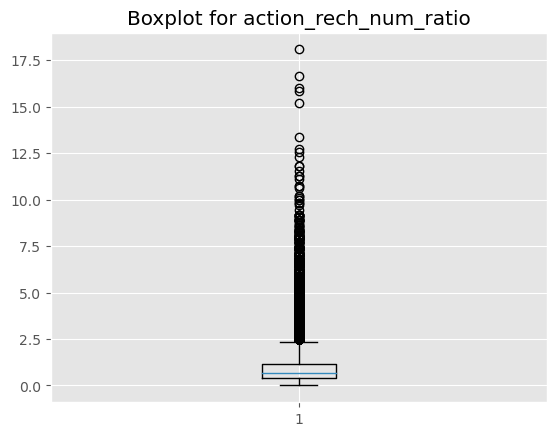

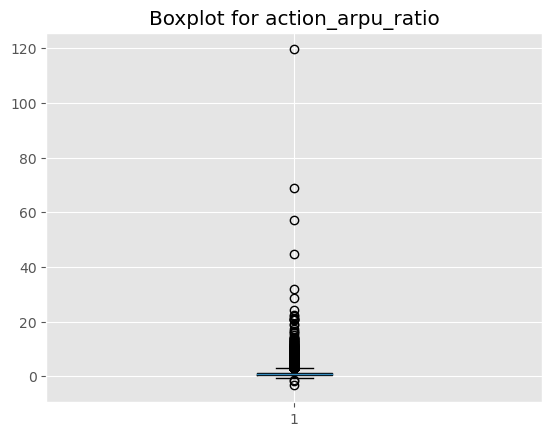

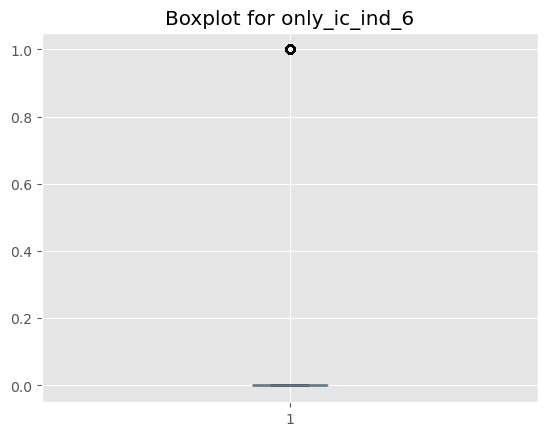

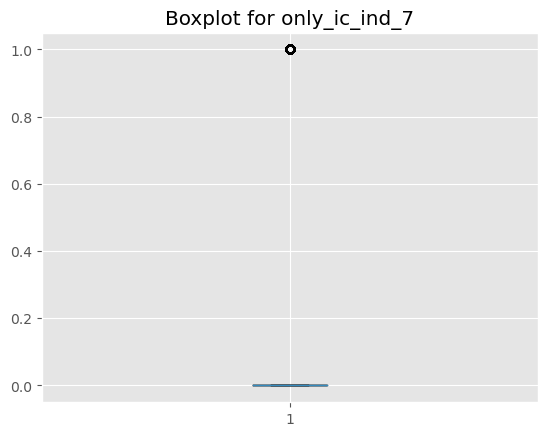

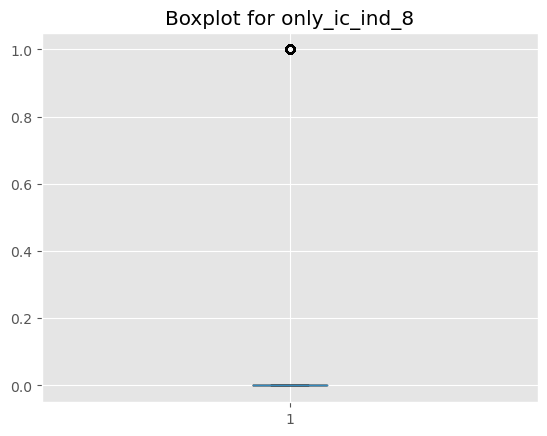

In [28]:
for col in telecom_data.columns:
    plt.title("Boxplot for "+col)
    plt.boxplot(telecom_data[col])
    plt.show()

Seems like nearly all columns have outliers. Removing outliers from all columns may not be wise because of the nature of their data. For example -
1. Most columns have very specific metrics which only apply to a small segment of customers. Metrics like roam_ic_mou, roam_og_mou, loc_og_t2t_mou, std_ic_t2t_mou, std_ic_t2m_mou, std_ic_t2f_mou, ic_others, etc. If we remove outliers from these columns, we will be removing valuable information.
2. There are some count metrics like monthly_2g, sachet_2g, monthly_3g, sachet_3g, etc. which have discrete numerical data ranging between 0 and some small number like 10, 20, 30, etc. So outlier treatment doesn't make sense here.

Rather, we should be looking at some key columns which are the top/large columns containing aggregate data as shown below. These columns will be applicable to all customers and will give a true picture of the data spread. Once we treat their outliers, our data is good to go.

In [29]:
key_cols = ['aon','total_mou_6','total_ic_mou_6','total_og_mou_6','onnet_mou_6','offnet_mou_6','total_rech_amt_6','arpu_6','total_mou_7','total_ic_mou_7','total_og_mou_7','onnet_mou_7','offnet_mou_7','total_rech_amt_7','arpu_7','total_mou_8','total_ic_mou_8','total_og_mou_8','onnet_mou_8','offnet_mou_8','total_rech_amt_8','arpu_8']

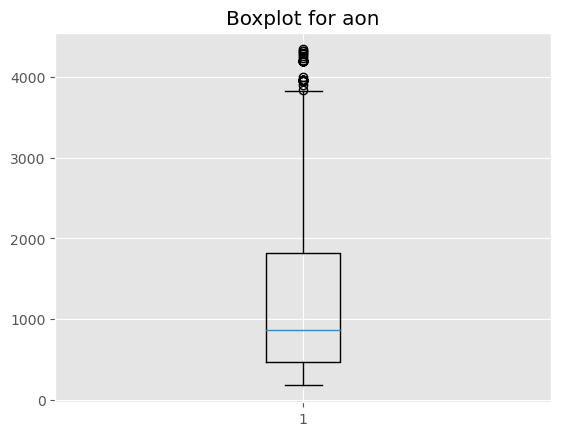

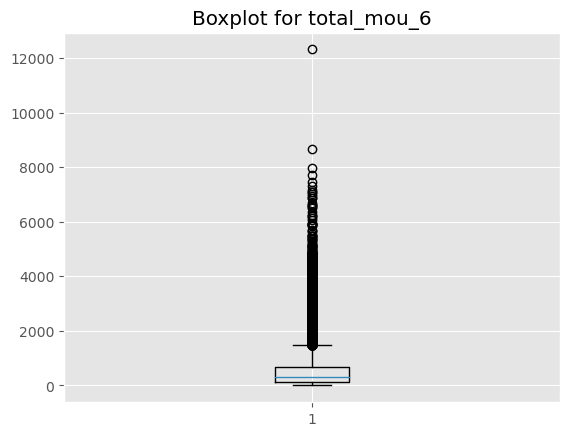

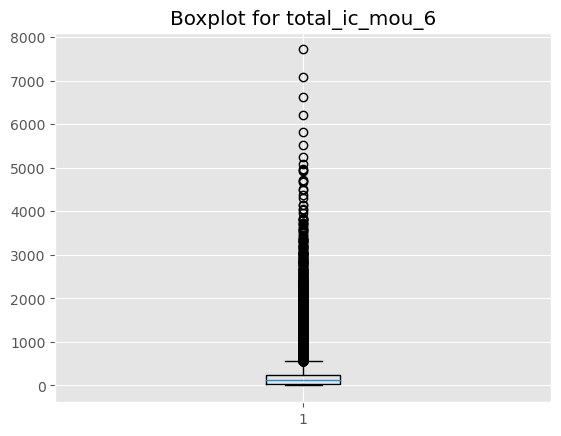

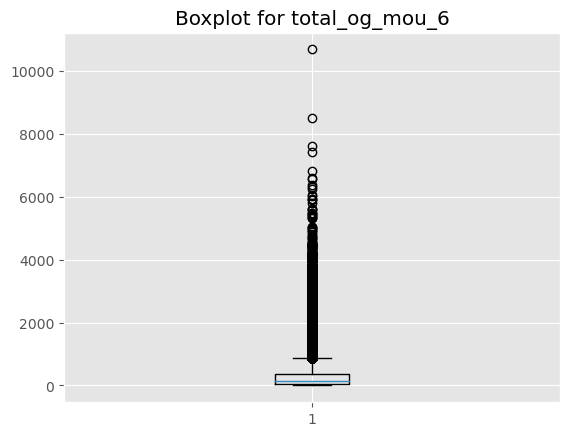

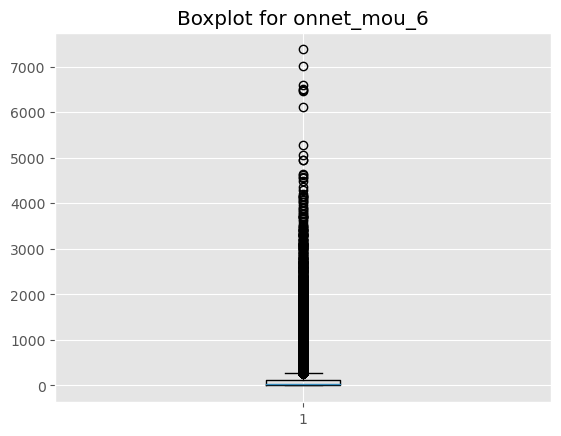

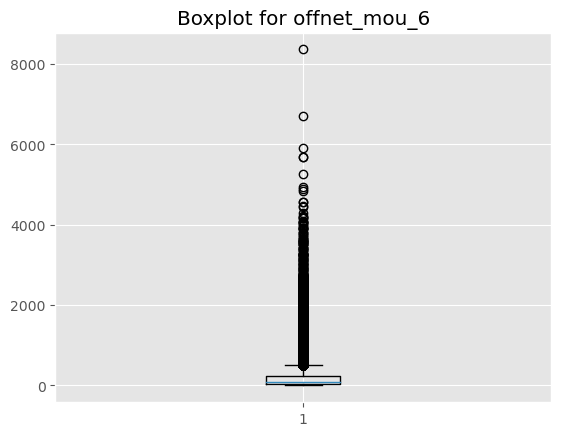

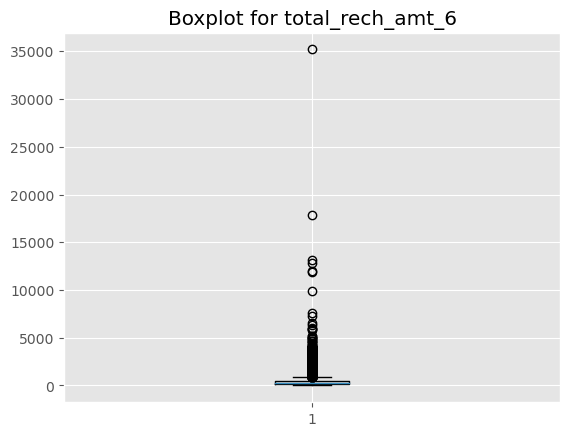

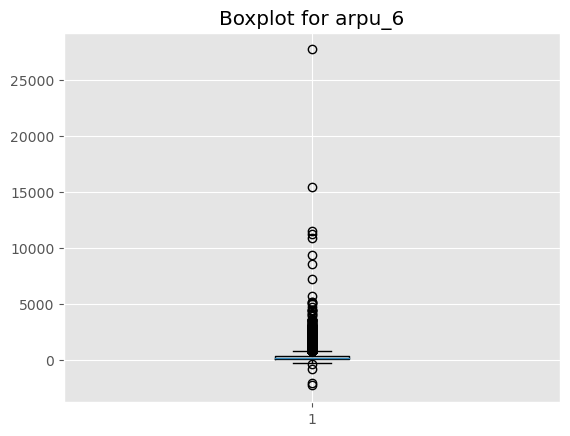

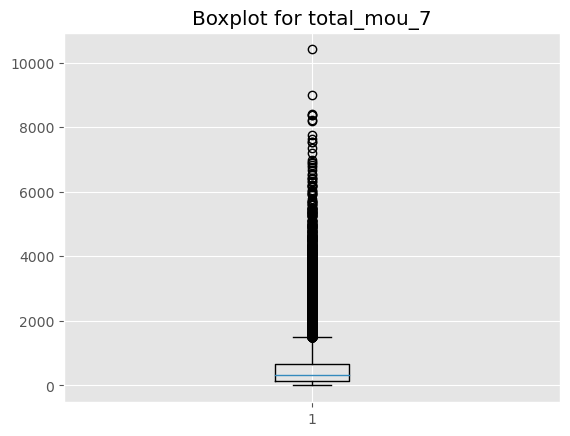

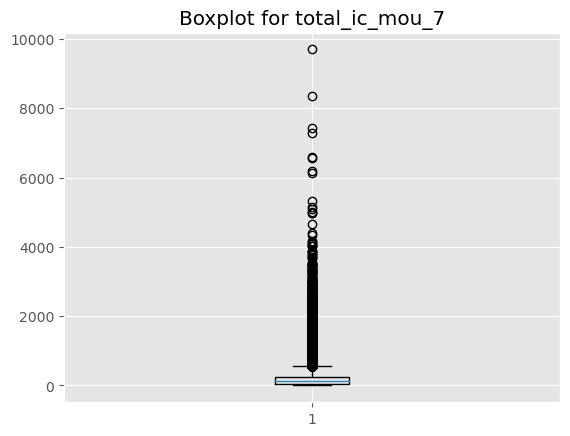

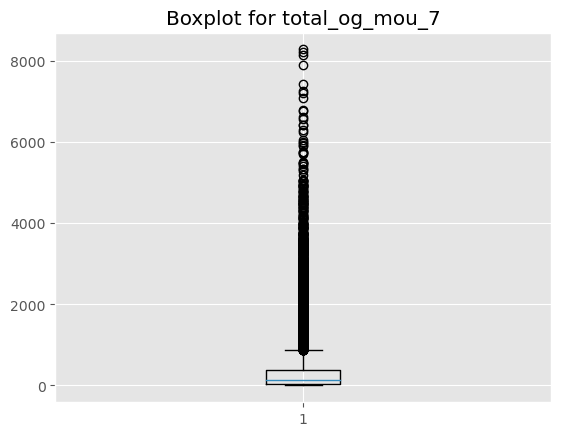

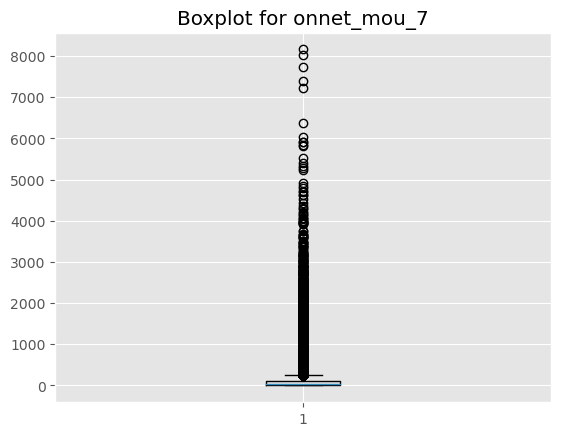

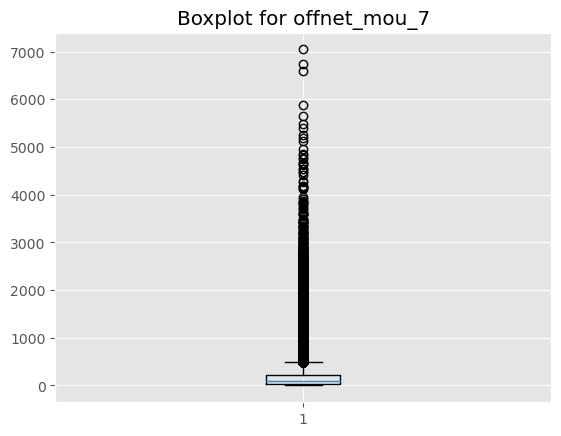

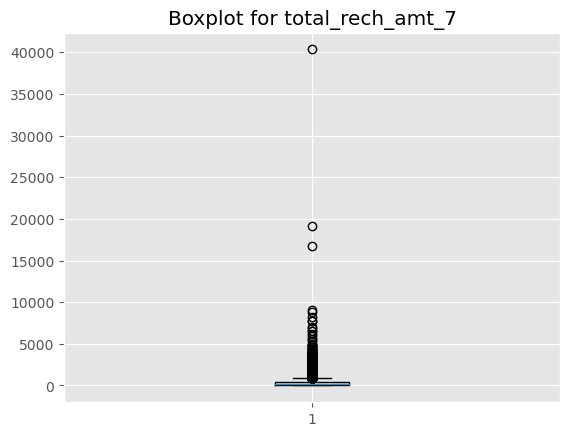

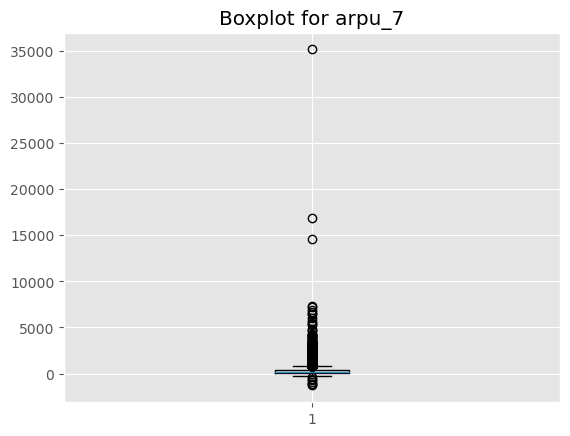

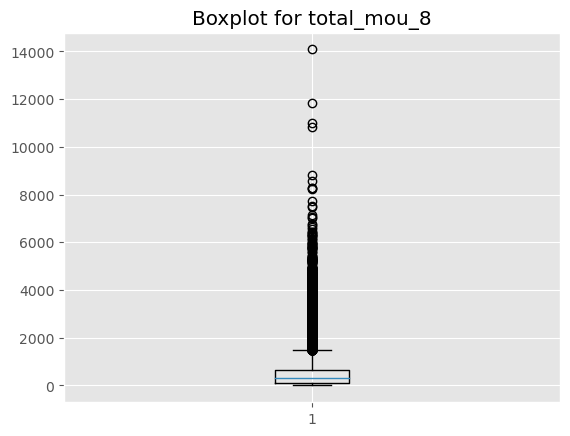

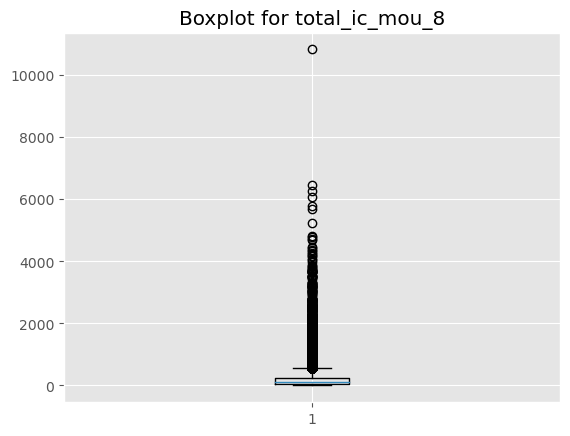

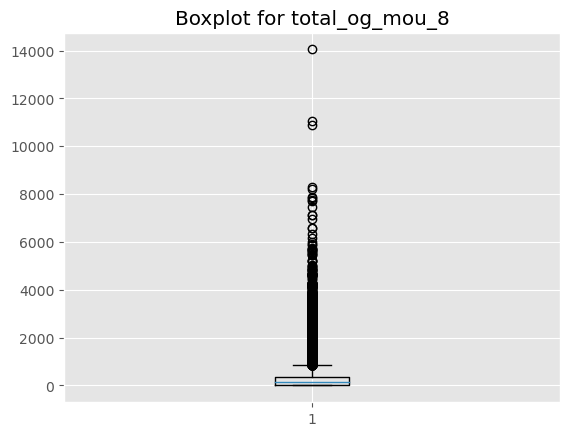

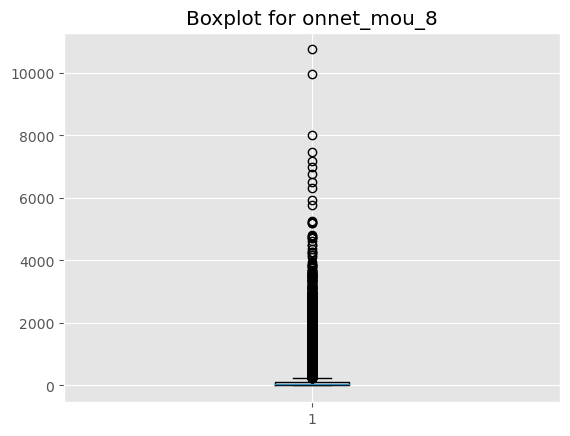

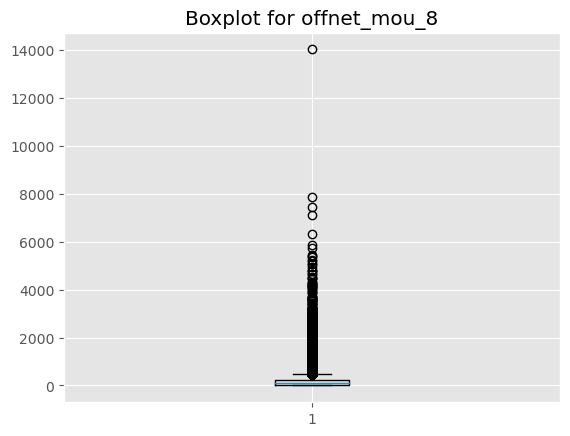

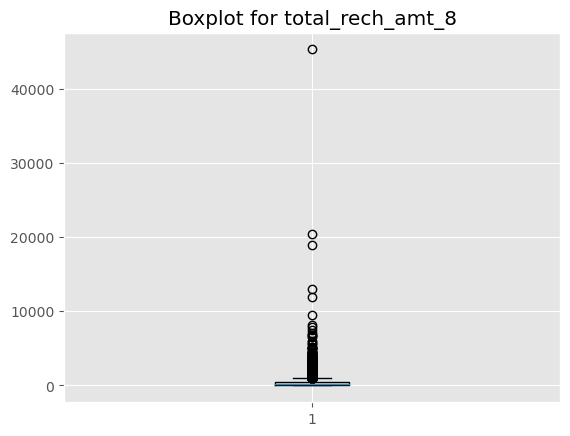

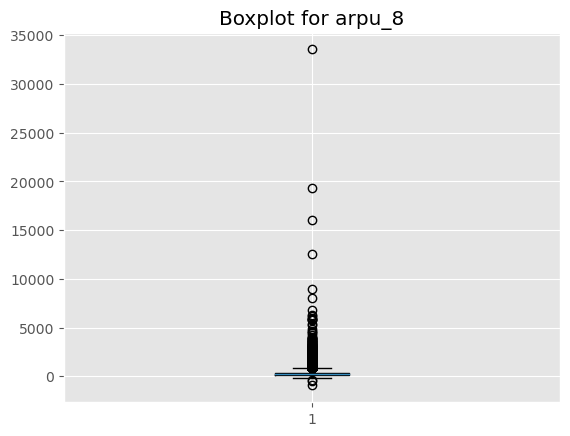

In [30]:
for col in key_cols:
    plt.title("Boxplot for "+ col)
    plt.boxplot(telecom_data[col])
    plt.show()

In [31]:
telecom_data[key_cols].describe(percentiles=[0,0.1,0.2,0.25,0.5,0.75,0.8,0.9,0.95,0.99])

aon   total_mou_6  total_ic_mou_6  total_og_mou_6  \
count  69999.000000  69999.000000    69999.000000    69999.000000   
mean    1220.639709    506.162076      199.710640      306.451436   
std      952.426321    603.025457      290.114823      465.502866   
min      180.000000      0.000000        0.000000        0.000000   
0%       180.000000      0.000000        0.000000        0.000000   
10%      286.000000      9.674000        2.160000        0.000000   
20%      401.000000     86.530000       26.130000       28.172000   
25%      468.000000    122.790000       38.640000       44.780000   
50%      868.000000    321.910000      114.780000      145.280000   
75%     1813.000000    668.365000      251.070000      374.305000   
80%     2239.400000    789.248000      298.560000      464.642000   
90%     2792.000000   1196.886000      467.030000      785.230000   
95%     3108.000000   1661.334000      668.240000     1171.188000   
99%     3651.000000   2845.177600     1366.030000     2235.611000   
max     4337.000000  12311.260000     7716.140000    10674.030000   

        onnet_mou_6  offnet_mou_6  total_rech_amt_6        arpu_6  \
count  69999.000000  69999.000000      69999.000000  69999.000000   
mean     129.236765    194.825731        328.139788    283.134365   
std      294.605405    311.131642        404.211068    334.213918   
min        0.000000      0.000000          0.000000  -2258.709000   
0%         0.000000      0.000000          0.000000  -2258.709000   
10%        0.360000      7.960000          0.000000     32.248600   
20%        4.810000     26.740000         80.000000     74.710600   
25%        8.060000     36.880000        110.000000     93.581000   
50%       34.110000     96.480000        229.000000    197.484000   
75%      113.100000    223.540000        438.000000    370.791000   
80%      152.718000    274.990000        504.000000    430.414600   
90%      331.766000    468.898000        735.000000    619.993800   
95%      598.600000    719.500000        998.000000    832.022700   
99%     1429.040400   1520.310000       1683.020000   1400.276640   
max     7376.710000   8362.360000      35190.000000  27731.088000   

        total_mou_7  total_ic_mou_7  total_og_mou_7   onnet_mou_7  \
count  69999.000000    69999.000000    69999.000000  69999.000000   
mean     512.450703      201.878029      310.572674    129.993840   
std      614.878697      296.771338      479.131770    305.867956   
min        0.000000        0.000000        0.000000      0.000000   
0%         0.000000        0.000000        0.000000      0.000000   
10%       13.166000        3.190000        0.298000      0.250000   
20%       89.036000       28.430000       27.580000      4.230000   
25%      124.370000       41.340000       42.910000      7.260000   
50%      320.830000      116.330000      141.230000     32.280000   
75%      677.655000      249.470000      380.045000    108.940000   
80%      802.648000      297.722000      470.972000    149.900000   
90%     1216.288000      468.524000      806.250000    334.886000   
95%     1673.877000      676.904000     1193.257000    608.878000   
99%     2901.438400     1382.071400     2275.607000   1461.342200   
max    10406.870000     9699.010000     8285.640000   8157.780000   

       offnet_mou_7  total_rech_amt_7        arpu_7   total_mou_8  \
count  69999.000000      69999.000000  69999.000000  69999.000000   
mean     193.112523        322.376363    278.185912    502.999098   
std      316.878225        411.070120    344.366927    611.057312   
min        0.000000          0.000000  -1289.715000      0.000000   
0%         0.000000          0.000000  -1289.715000      0.000000   
10%        7.010000          0.000000     29.761200      4.290000   
20%       24.510000         65.000000     69.075600     78.182000   
25%       33.980000        100.000000     86.714000    115.455000   
50%       91.885000        220.000000    191.588000    316.010000   
75%      21

 We get these insights from the above charts & table -
1. Account tenure or 'aon' doesn't have outliers.
2. For all three months, total_mou columns are the best presenters of outliers and removing their outliers will take care of outliers in other 'mou' type columns.
3. Also, 'total_rech_amt' and 'arpu' for all three months have outliers.
4. Typically, outliers are occurring above 99% percetile values. The columns seem to have a steady trend till the 99th percentile and then sudden jump in the maximum values.
5. So we will drop outliers beyond 99th percentile for the three columns. Plus, this will cause minimal loss of data.

In [32]:
##Lets check the dataset size after having derived columns to proceed with dropping of outliers
telecom_data.shape

(69999, 141)

In [33]:
# We will work with a new copy of the data from now onwards
tele_data = telecom_data.copy()

# Dropping outliers above 99th percentile
tele_data = tele_data[tele_data['total_mou_6']<2845]
tele_data = tele_data[tele_data['total_rech_amt_6']<1683]
tele_data = tele_data[tele_data['arpu_6']<1400]
tele_data = tele_data[tele_data['total_mou_7']<2901]
tele_data = tele_data[tele_data['total_rech_amt_7']<1712]
tele_data = tele_data[tele_data['arpu_7']<1415]
tele_data = tele_data[tele_data['total_mou_8']<2836]
tele_data = tele_data[tele_data['total_rech_amt_8']<1706]
tele_data = tele_data[tele_data['arpu_8']<1445]

In [34]:
tele_data.shape

(67668, 141)

In [35]:
## checking the data we lost from outliers treatment
round(((69999-67668)/69999)*100,2)

3.33

We only lost 3.3% of the data which is reasonable.

In [36]:
tele_data[key_cols].describe(percentiles=[0,0.1,0.2,0.25,0.5,0.75,0.8,0.9,0.95,0.99])

aon   total_mou_6  total_ic_mou_6  total_og_mou_6  \
count  67668.000000  67668.000000    67668.000000    67668.000000   
mean    1221.828324    455.539017      185.108202      270.430815   
std      952.865194    473.058560      236.197106      358.519626   
min      180.000000      0.000000        0.000000        0.000000   
0%       180.000000      0.000000        0.000000        0.000000   
10%      287.000000      9.187000        2.080000        0.000000   
20%      401.000000     84.164000       25.580000       27.184000   
25%      468.000000    119.697500       37.737500       43.387500   
50%      870.000000    310.770000      111.585000      139.390000   
75%     1818.000000    633.497500      241.695000      350.522500   
80%     2241.000000    741.300000      287.072000      431.602000   
90%     2793.600000   1090.349000      441.669000      708.575000   
95%     3109.000000   1443.238000      621.368000     1017.462000   
99%     3651.000000   2194.443300     1148.377800     1734.138500   
max     4337.000000   2841.590000     2812.010000     2797.110000   

        onnet_mou_6  offnet_mou_6  total_rech_amt_6        arpu_6  \
count  67668.000000  67668.000000      67668.000000  67668.000000   
mean     112.413812    173.534679        293.371623    254.212329   
std      226.156938    240.906460        273.980755    227.422721   
min        0.000000      0.000000          0.000000   -209.465000   
0%         0.000000      0.000000          0.000000   -209.465000   
10%        0.310000      7.580000          0.000000     31.134900   
20%        4.510000     25.930000         76.000000     72.878000   
25%        7.690000     35.660000        101.000000     91.161500   
50%       34.110000     96.480000        220.000000    191.066500   
75%      104.915000    209.745000        411.000000    350.912500   
80%      141.020000    257.572000        476.000000    404.132800   
90%      297.890000    426.083000        666.000000    563.361600   
95%      527.990000    629.655000        860.000000    724.213600   
99%     1166.881800   1203.707000       1233.000000   1033.773530   
max     2711.380000   2690.840000       1682.000000   1397.426000   

        total_mou_7  total_ic_mou_7  total_og_mou_7   onnet_mou_7  \
count  67668.000000    67668.000000    67668.000000  67668.000000   
mean     457.205230      186.487285      270.717945    111.394506   
std      474.050374      238.934593      360.528909    228.002483   
min        0.000000        0.000000        0.000000      0.000000   
0%         0.000000        0.000000        0.000000      0.000000   
10%       12.077000        2.890000        0.180000      0.180000   
20%       86.080000       27.630000       26.160000      3.960000   
25%      120.390000       40.130000       41.290000      6.890000   
50%      308.910000      112.940000      134.910000     32.280000   
75%      636.995000      239.630000      351.480000    100.580000   
80%      746.158000      284.810000      435.670000    137.410000   
90%     1095.688000      439.889000      724.155000    298.696000   
95%     1455.671000      625.680000     1025.962500    537.268000   
99%     2162.159800     1184.919400     1726.146000   1189.637900   
max     2898.520000     2872.130000     2860.540000   2814.730000   

       offnet_mou_7  total_rech_amt_7        arpu_7   total_mou_8  \
count  67668.000000      67668.000000  67668.000000  67668.000000   
mean     170.413847        285.709700    247.312977    451.036267   
std      240.143576        271.632315    224.309992    472.631299   
min        0.000000          0.000000   -622.509000      0.000000   
0%         0.000000          0.000000   -622.509000      0.000000   
10%        6.640000          0.000000     28.267100      4.001000   
20%       23.610000         60.000000     67.254400     75.624000   
25%       32.830000         97.000000     84.268250    111.860000   
50%       91.885000        217.000000    184.519000    305.185000   
75%      20

# Exploratory Data Analysis

### Univariate and bivariate analyses

Target variable distribution

In [37]:
tele_data['churn_probability'].value_counts()

0    60800
1     6868
Name: churn_probability, dtype: int64

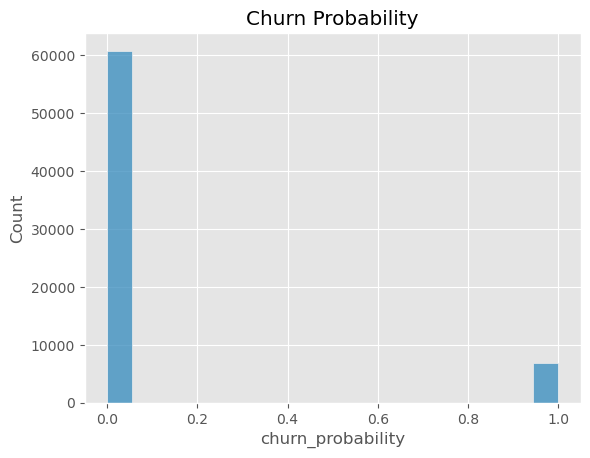

In [38]:
#Distribution for the churn probability
sns.histplot(tele_data['churn_probability'])
plt.title("Churn Probability")
plt.show()

In [39]:
round(((6868)/67668)*100,2)

10.15

The churn rate is 10.15%. The target variable is not very well balanced so we will have to see how well the various classification models perform on this dataset. Given the imbalance, boosting models may perform better when it comes to precision and recall.

Let's plot out the top variables for each month along with the target variable to check out the distributions.

#### Month 6 variables -

In [40]:
key_var_6 = ['aon','total_mou_6','ratio_ic_og_6','total_rech_amt_6','avg_rech_amt_6','arpu_6']

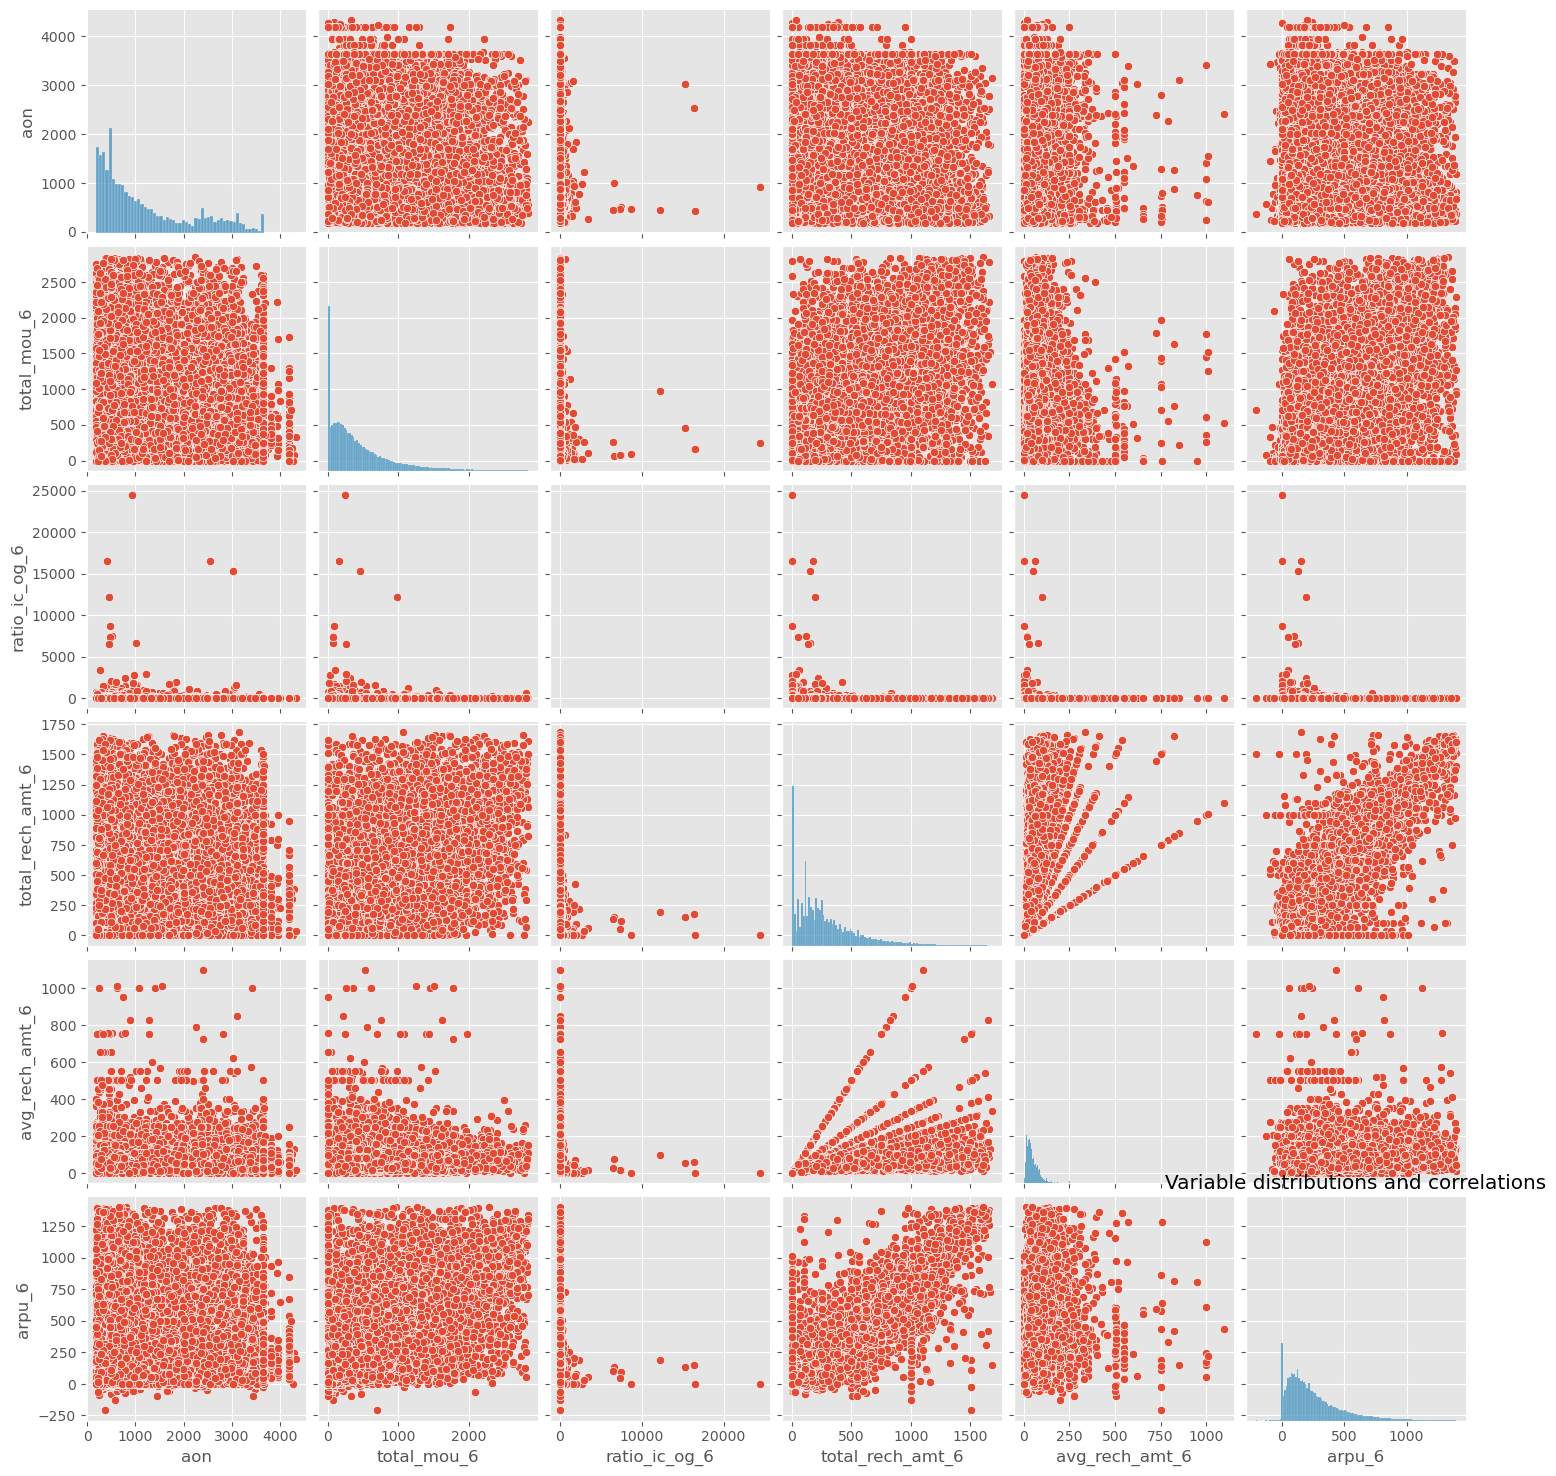

In [47]:
# Let's look at numerical variables distributions and correlations
sns.pairplot(tele_data[key_var_6])
plt.title("Variable distributions and correlations")
plt.show()

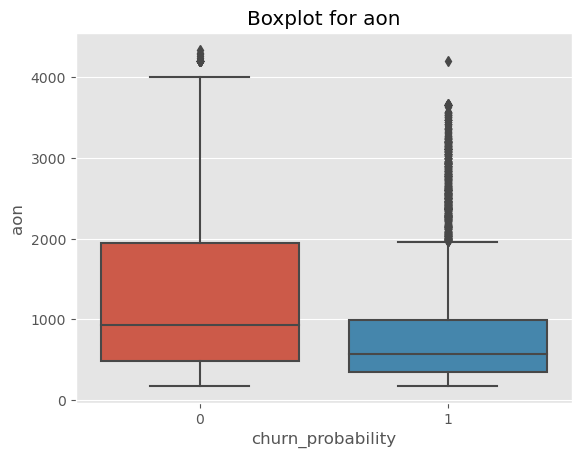

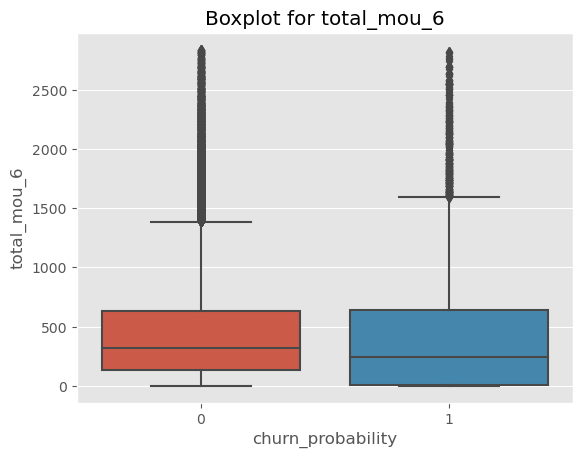

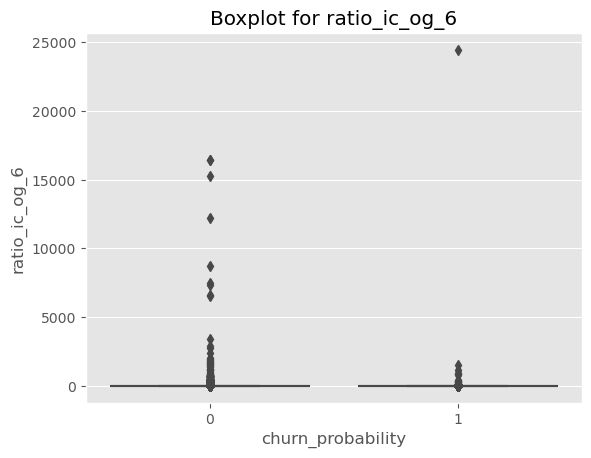

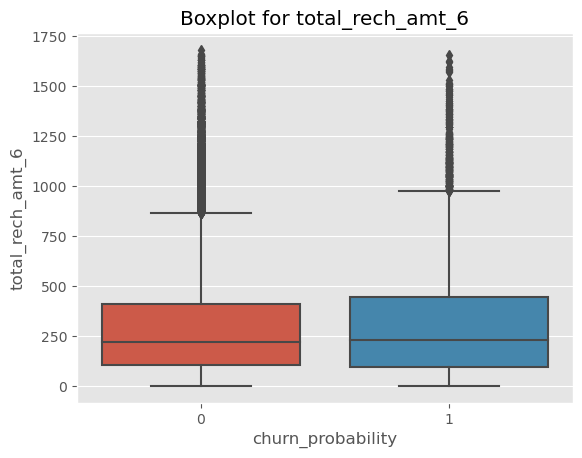

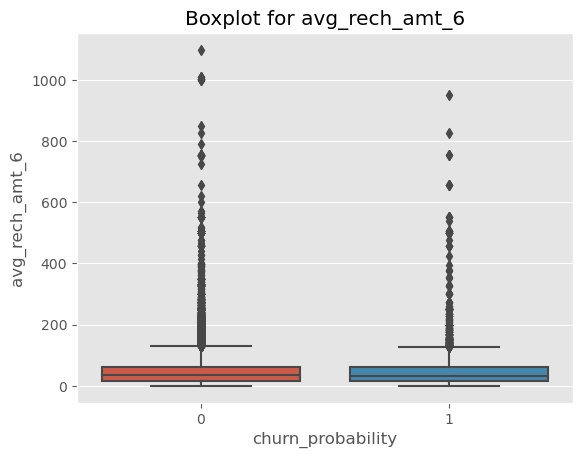

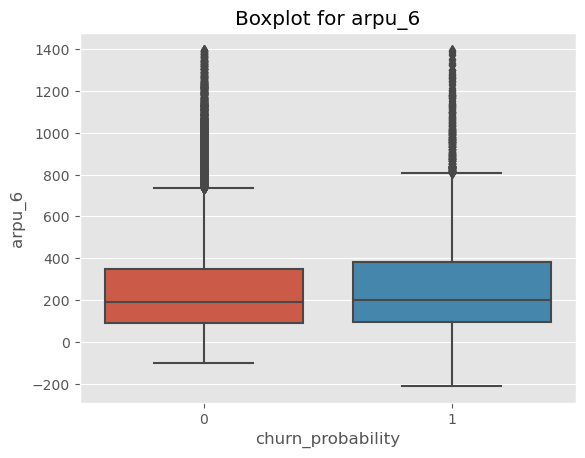

In [42]:
# Let's look at the relationship between the key variables and the target variable
for col in key_var_6:
    plt.title("Boxplot for "+ col)
    sns.boxplot(data=tele_data,x='churn_probability',y=col)
    plt.show()

#### Month 7 variables -

In [41]:
key_var_7 = ['aon','total_mou_7','ratio_ic_og_7','total_rech_amt_7','avg_rech_amt_7','arpu_7']

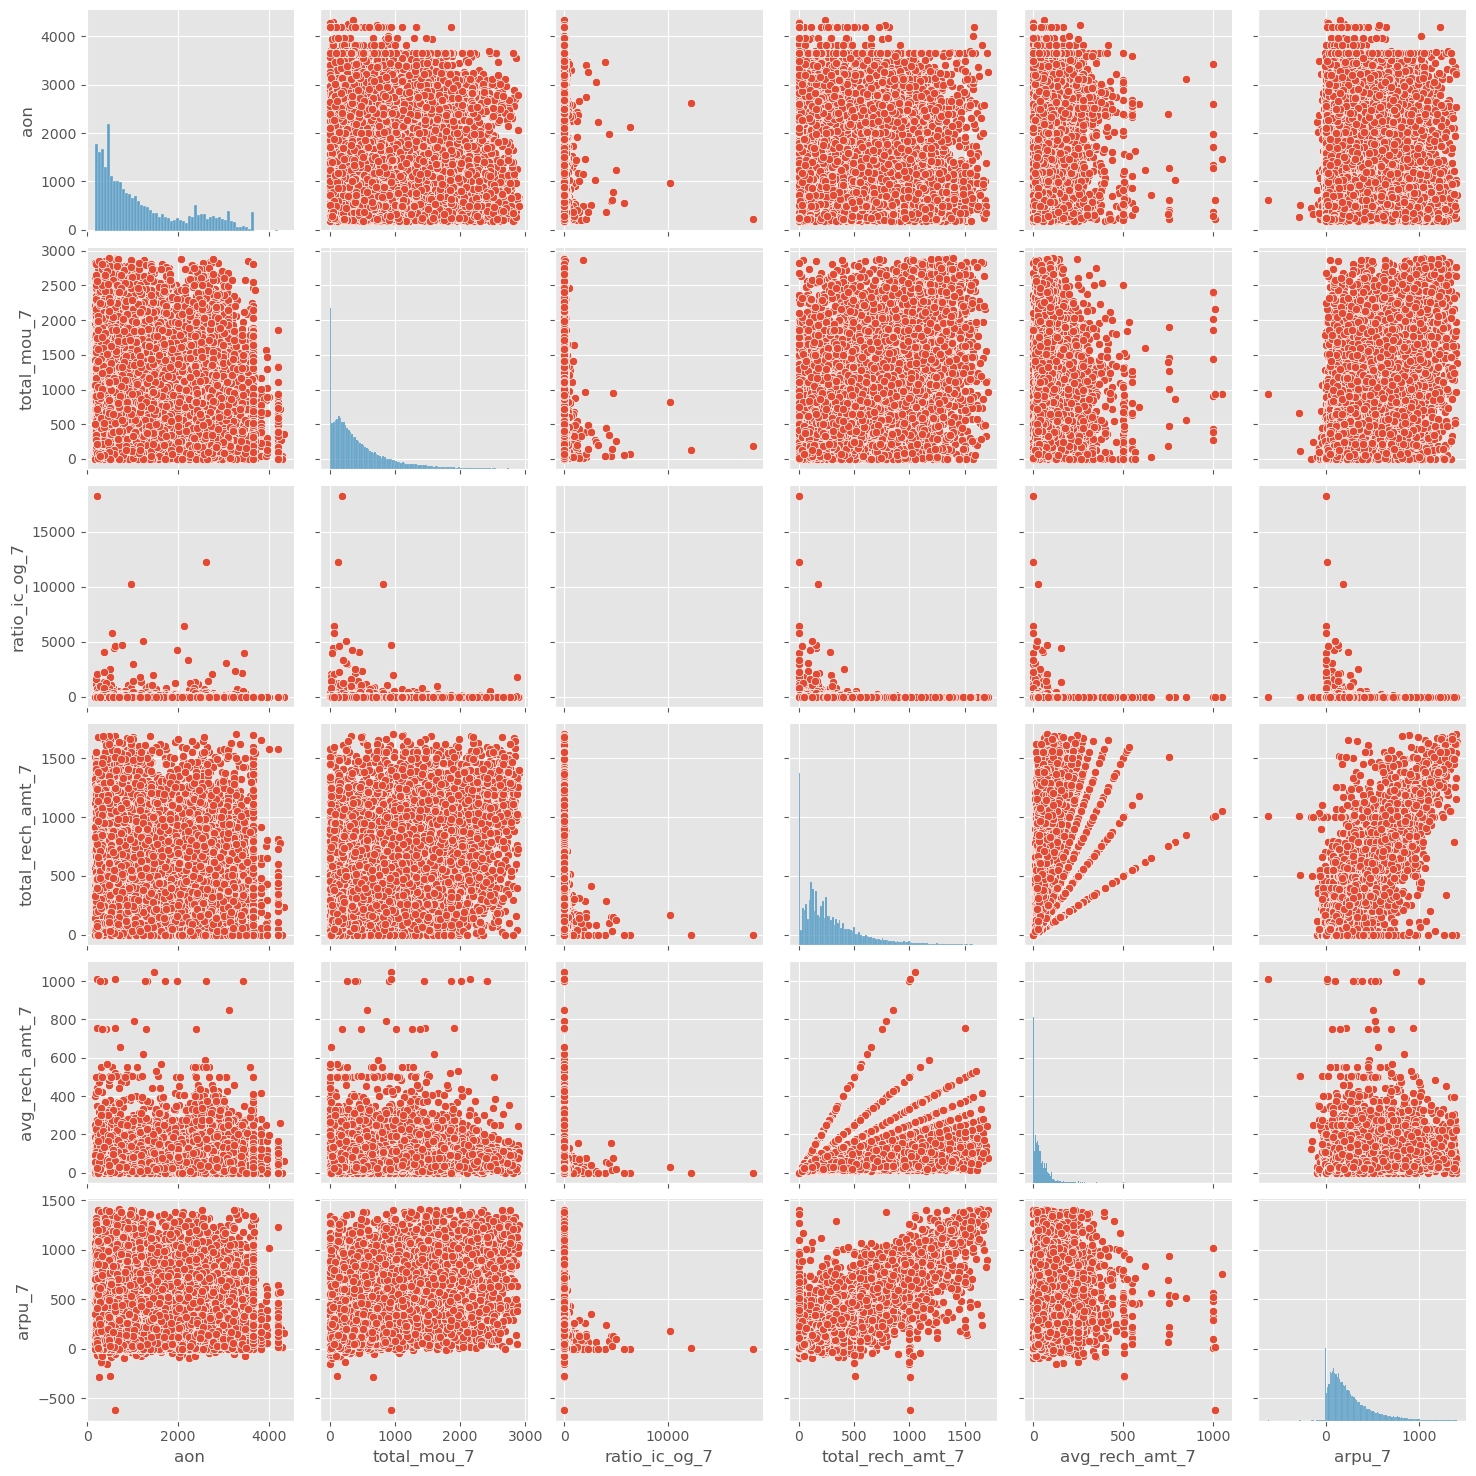

In [42]:
# Let's look at numerical variables distributions and correlations
sns.pairplot(tele_data[key_var_7])
plt.show()

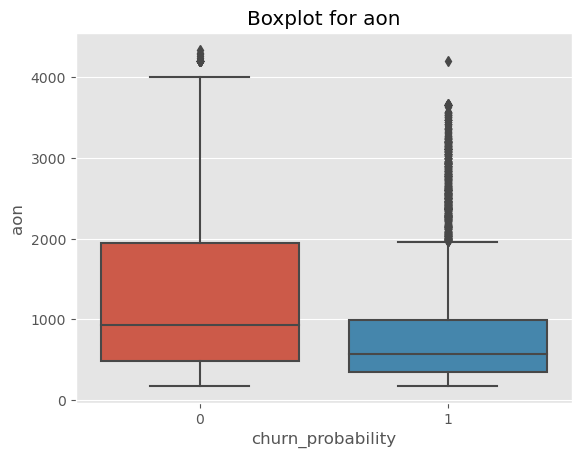

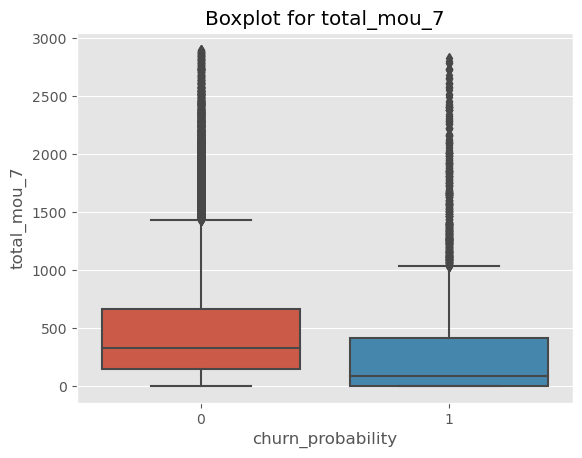

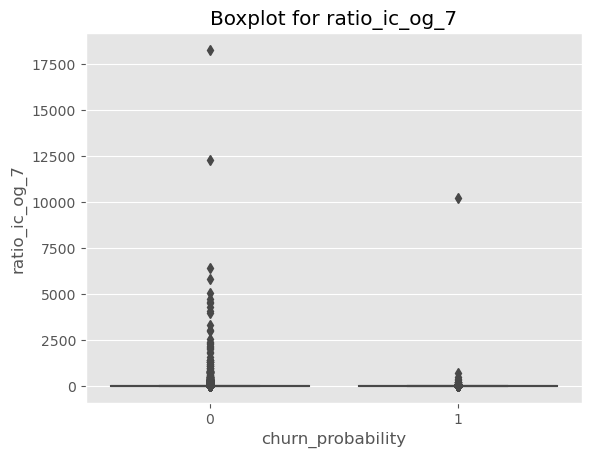

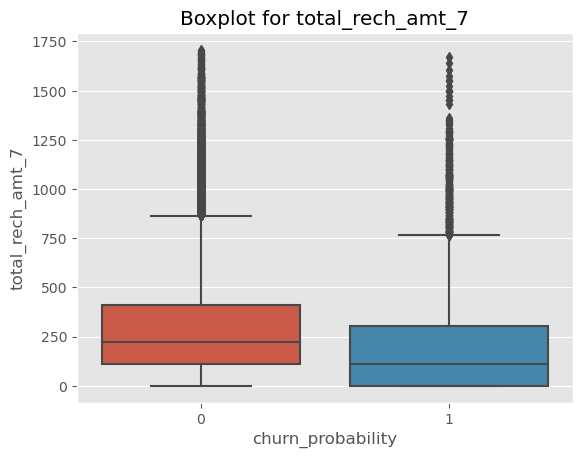

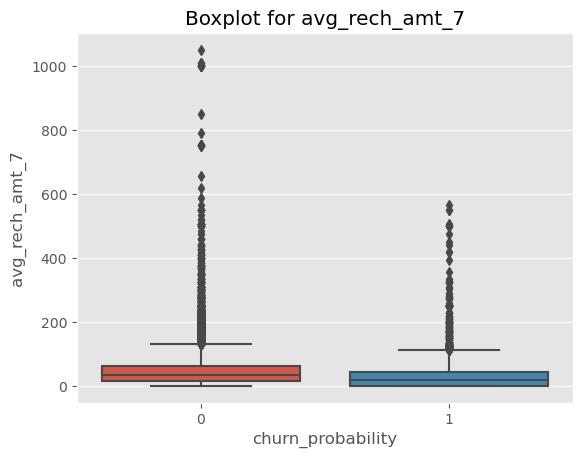

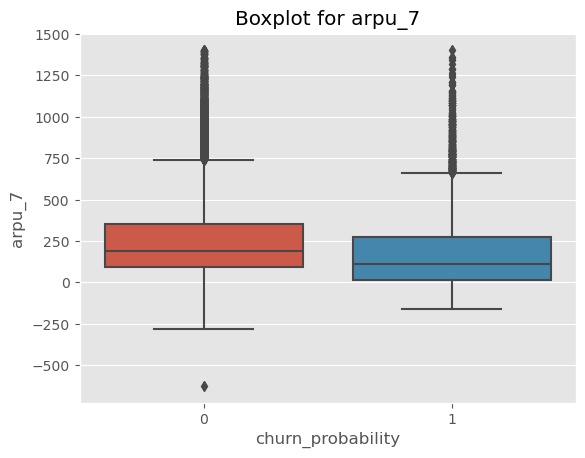

In [44]:
# Let's look at the relationship between the key variables and the target variable
for col in key_var_7:
    plt.title("Boxplot for "+ col)
    sns.boxplot(data=tele_data,x='churn_probability',y=col)
    plt.show()

#### Month 8 variables -

In [42]:
key_var_8 = ['aon','total_mou_8','ratio_ic_og_8','total_rech_amt_8','avg_rech_amt_8','arpu_8']

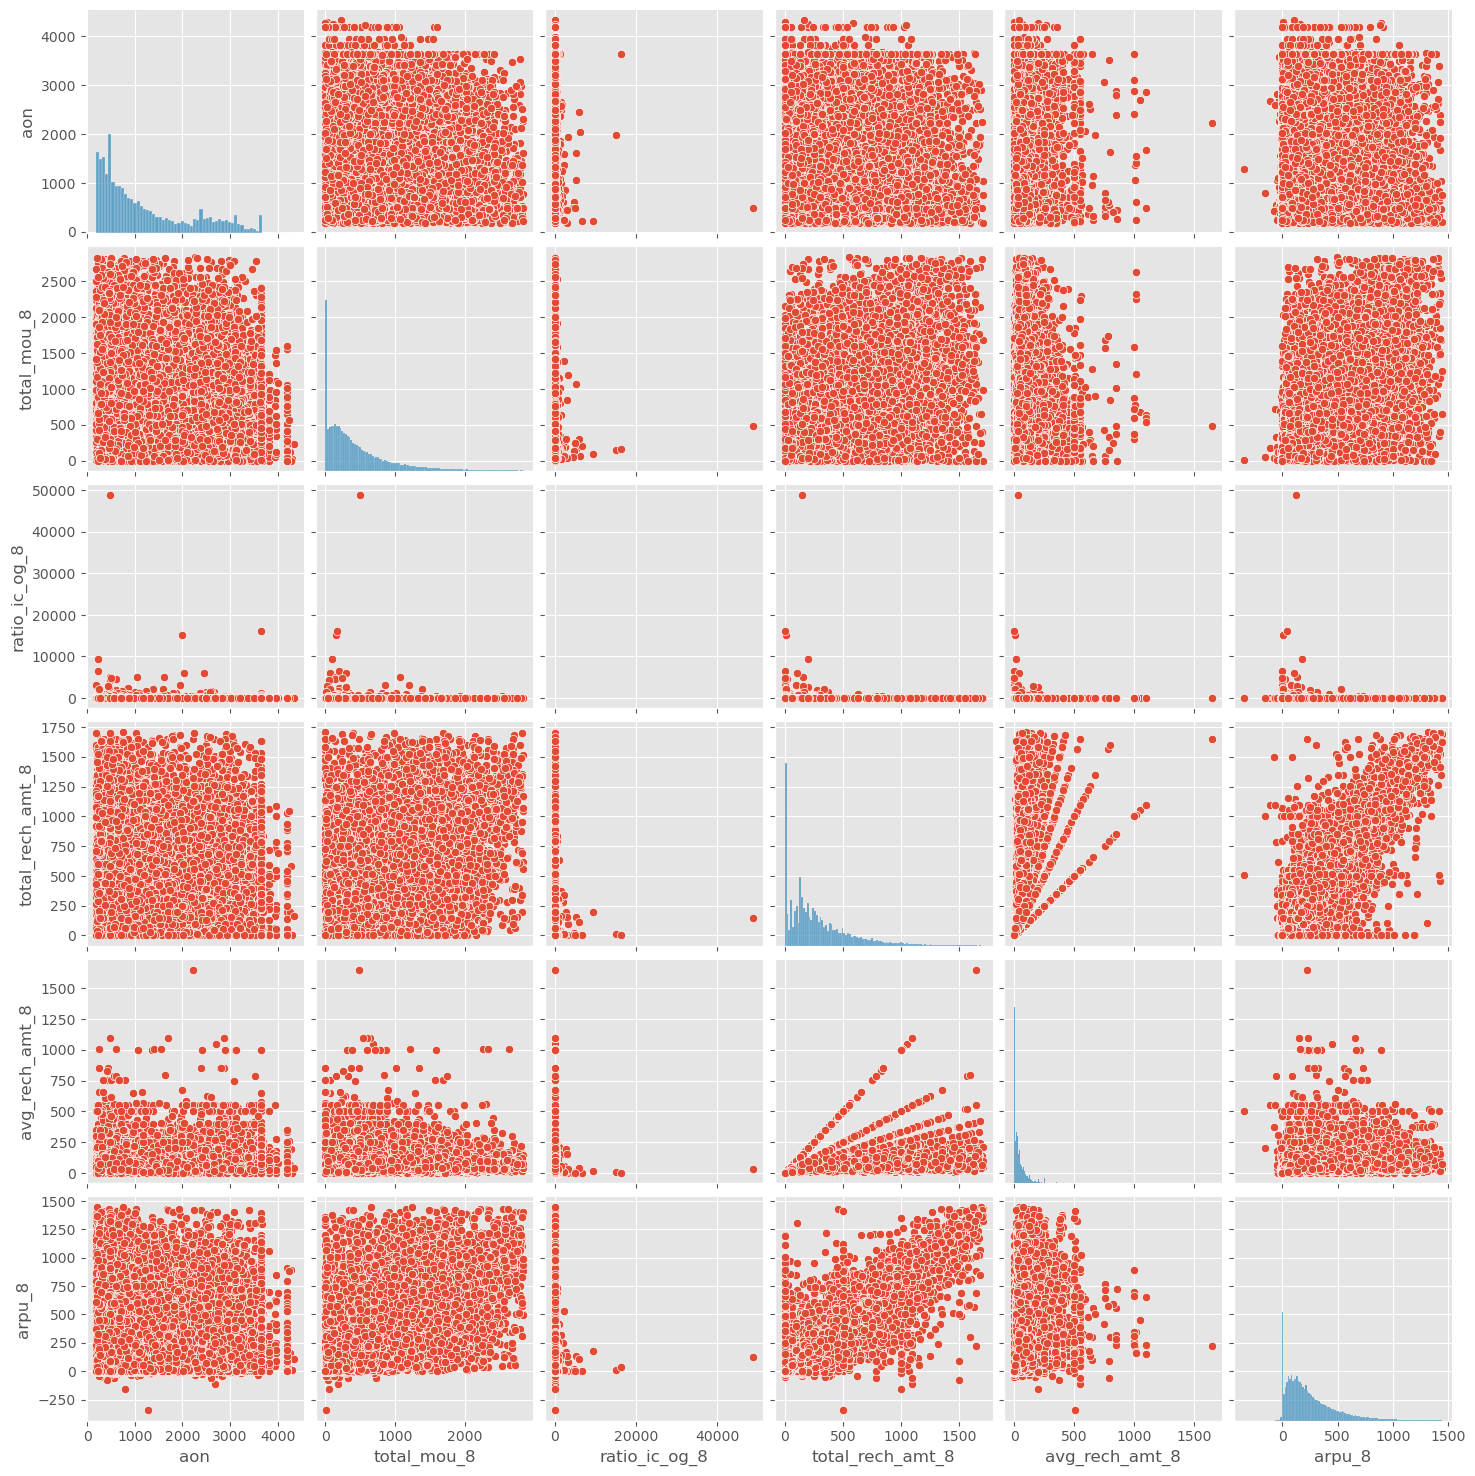

In [46]:
# Let's look at numerical variables distributions and correlations
sns.pairplot(tele_data[key_var_8])
plt.show()

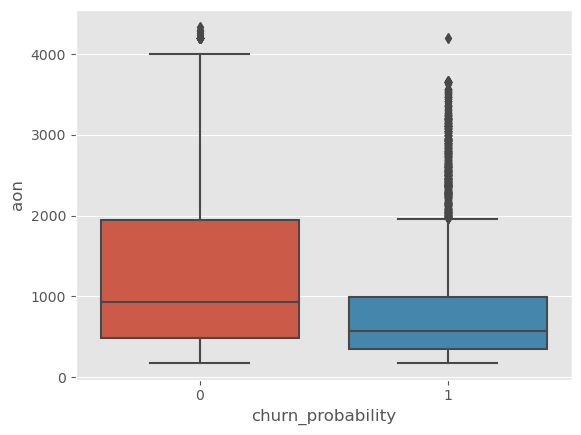

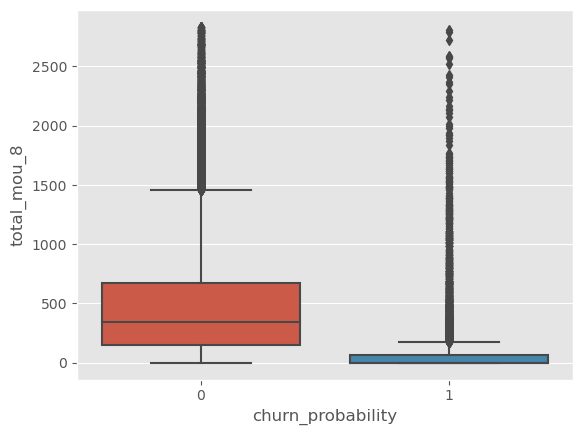

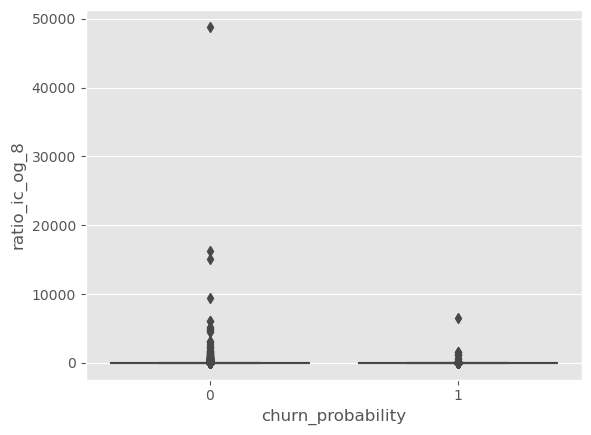

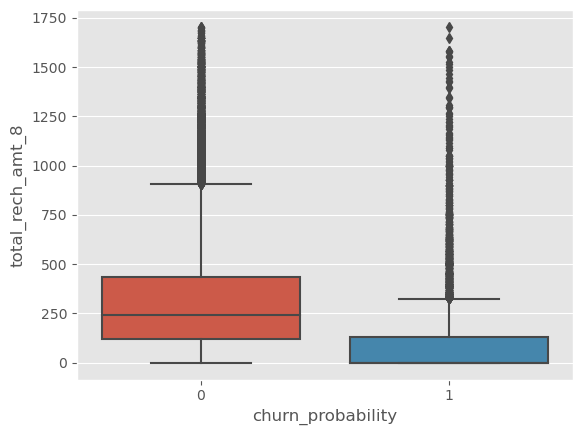

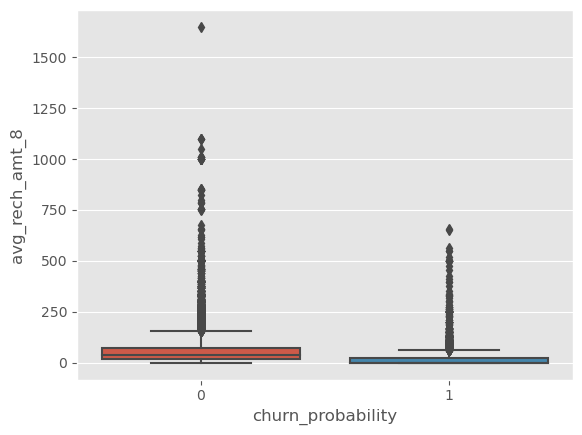

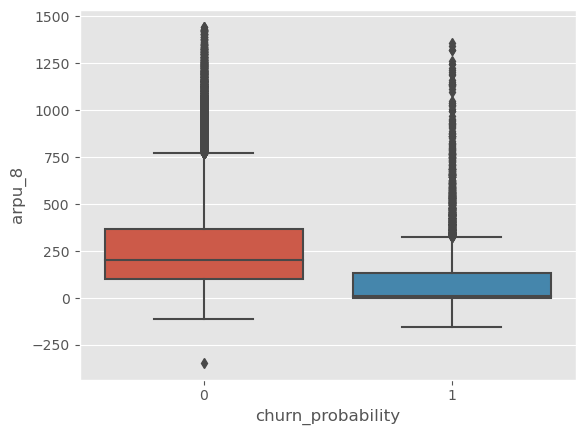

In [47]:
# Let's look at the relationship between the key variables and the target variable
for col in key_var_8:
    plt.show("Boxplot for "+ col)
    sns.boxplot(data=tele_data,x='churn_probability',y=col)
    plt.show()

#### Key insights from above analysis -
 - Most customers are newer to the company and age gradually increases with lesser custoemr count.
 - Some variables are correlated such as arpu and total_rech_amt.
 - In general, no linear relationshiip exists among the variables.
 - When plotted againt the target variable, account age (aon) shows that newer customers are more likely churn than older customers.
 - But other predictor variable don't show any clear relationship with the target variable.

#### Notes about Multicollinearity -
Obvious multicollinearity exists among our variables seeing as they are very interdependent on one another. We are not dealing with it now. We will let the modeling process take care of it.

## Step 2: Data Preparation For Model Building

1. We have some categorical columns which we created in 1/0 format so no need of any manipulation there.
2. Other than that, we have lots of numerical columns which will need to be scaled after train-test split.

In [43]:
#Display all the information about the Dataset
tele_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67668 entries, 0 to 69998
Data columns (total 141 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    arpu_6                 float64
 1    arpu_7                 float64
 2    arpu_8                 float64
 3    onnet_mou_6            float64
 4    onnet_mou_7            float64
 5    onnet_mou_8            float64
 6    offnet_mou_6           float64
 7    offnet_mou_7           float64
 8    offnet_mou_8           float64
 9    roam_ic_mou_6          float64
 10   roam_ic_mou_7          float64
 11   roam_ic_mou_8          float64
 12   roam_og_mou_6          float64
 13   roam_og_mou_7          float64
 14   roam_og_mou_8          float64
 15   loc_og_t2t_mou_6       float64
 16   loc_og_t2t_mou_7       float64
 17   loc_og_t2t_mou_8       float64
 18   loc_og_t2m_mou_6       float64
 19   loc_og_t2m_mou_7       float64
 20   loc_og_t2m_mou_8       float64
 21   loc_og_t2f_mou_6       float64
 2

In [44]:
# Train-test split
df_train, df_test = train_test_split(tele_data,train_size=0.80,test_size=0.20,random_state=100)

In [45]:
# Dividing into X and y sets for model building
y_train = df_train.pop('churn_probability')
X_train = df_train
y_test = df_test.pop('churn_probability')
X_test = df_test

In [46]:
X_train.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
15540   49.571   79.602    5.630         4.46         1.61         5.88   
28298  262.047  554.896  545.421       386.29       725.69       555.16   
26357  239.067  195.424  110.616        27.68         4.73        12.63   
12463  160.067   53.400   24.445       698.71        19.24         7.98   
64639  141.263  150.834  226.787        24.61        24.64        69.33   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
15540          1.85         16.46          0.00           0.00            0.0   
28298         35.29        138.86        270.91           1.26            0.0   
26357         19.46         15.89         11.86           0.00            0.0   
12463         98.79         36.11         13.96           0.00            0.0   
64639        103.26        103.28        113.68           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
15540            0.0           0.00            0.0            0.0   
28298            0.0           0.16            0.0            0.0   
26357            0.0           0.00            0.0            0.0   
12463            0.0           0.00            0.0            0.0   
64639            0.0           0.00            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
15540              4.46              1.61              5.88              1.85   
28298              0.00              0.00              0.00              4.71   
26357             27.68              4.73             12.63              9.49   
12463            697.71             19.24              7.98             94.31   
64639             24.61             24.64             60.16            101.54   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
15540             16.46              0.00              0.00              0.00   
28298              8.99             24.41              0.00              0.00   
26357             13.61             10.59              5.83              1.06   
12463             36.11             13.18              0.50              0.00   
64639             92.19             94.19              1.71              0.88   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
15540              0.00              0.00              0.00              0.00   
28298              0.00              2.13              9.18              0.26   
26357              1.26              3.95              0.00              0.00   
12463              0.50              0.00              0.00              0.00   
64639             10.63              0.00              0.00              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
15540          6.31         18.08          5.88              0.00   
28298          4.71          8.99         24.41            386.29   
26357         43.01         19.41         24.49              0.00   
12463        792.53         55.36         21.66              1.00   
64639        127.88        117.73        164.99              0.00   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
15540              0.00              0.00              0.00              0.00   
28298            725.69            555.16             10.88             84.46   
26357              0.00              0.00              0.18              1.21   
12463              0.00              0.00              3.98              0.00   
64639              0.00              9.16              0.00             10.20   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
15540              0.00               0.0               0.0               0.0   
28298            242.04               0.0               0.0               0.0   
26357              0.00               0.0        

In [47]:
y_train.head()

15540    0
28298    0
26357    0
12463    0
64639    0
Name: churn_probability, dtype: int64

In [48]:
print(tele_data.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67668, 141)
(54134, 140)
(13534, 140)
(54134,)
(13534,)


### Scaling - using Standard scaler

In [49]:
scaler = StandardScaler()

In [50]:
# Scaling the train & test datasets
varlist = X_train.columns
X_train[varlist] = scaler.fit_transform(X_train[varlist])
X_test[varlist] = scaler.transform(X_test[varlist])

In [51]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
15540 -0.897293 -0.745563 -1.059009    -0.478803    -0.481587    -0.461935   
28298  0.035562  1.372726  1.293869     1.219982     2.693899     1.970230   
26357 -0.065329 -0.229368 -0.601389    -0.375496    -0.467905    -0.432047   
12463 -0.412171 -0.862340 -0.976997     2.609957    -0.404270    -0.452637   
64639 -0.494728 -0.428096 -0.095015    -0.389155    -0.380588    -0.180984   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
15540     -0.712442     -0.641198     -0.706282      -0.164114      -0.113885   
28298     -0.573512     -0.131200      0.422609      -0.138847      -0.113885   
26357     -0.639279     -0.643573     -0.656861      -0.164114      -0.113885   
12463     -0.309695     -0.559323     -0.648110      -0.164114      -0.113885   
64639     -0.291123     -0.279449     -0.232573      -0.164114      -0.113885   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
15540      -0.120798      -0.215507      -0.181692      -0.175359   
28298      -0.120798      -0.212447      -0.181692      -0.175359   
26357      -0.120798      -0.215507      -0.181692      -0.175359   
12463      -0.120798      -0.215507      -0.181692      -0.175359   
64639      -0.120798      -0.215507      -0.181692      -0.175359   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
15540         -0.344353         -0.365562         -0.332329         -0.620807   
28298         -0.388288         -0.381531         -0.393502         -0.599207   
26357         -0.115610         -0.334615         -0.262105         -0.563108   
12463          6.484922         -0.190691         -0.310482          0.077471   
64639         -0.145853         -0.137128          0.232375          0.132074   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
15540         -0.515535         -0.650148         -0.289335         -0.291312   
28298         -0.574430         -0.455535         -0.289335         -0.291312   
26357         -0.538005         -0.565717          0.221716         -0.198000   
12463         -0.360611         -0.545068         -0.245505         -0.291312   
64639          0.081533          0.100799         -0.139438         -0.213845   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
15540         -0.285559         -0.195496         -0.166132         -0.208115   
28298         -0.285559          0.198786          1.028701         -0.167146   
26357         -0.172539          0.535684         -0.166132         -0.208115   
12463         -0.240710         -0.195496         -0.166132         -0.208115   
64639          0.667929         -0.195496         -0.166132         -0.208115   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
15540     -0.628777     -0.566941     -0.641637         -0.337813   
28298     -0.637094     -0.615554     -0.540271          1.601129   
26357     -0.438000     -0.559828     -0.539834         -0.337813   
12463      3.458215     -0.367571     -0.555315         -0.332793   
64639      0.003178     -0.034021      0.228754         -0.337813   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
15540         -0.338537         -0.335251         -0.373065         -0.376743   
28298          3.218376          2.389103         -0.317269          0.051276   
26357         -0.338537         -0.335251         -0.372142         -0.370612   
12463         -0.338537         -0.335251         -0.352654         -0.376743   
64639         -0.338537         -0.290300         -0.373065         -0.325053   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
15540         -0.370169         -0.145513         -0.127614         -0.132747   
28298          0.850873         -0.145513         -0.127614         -0.132747   
26357         -0.370169         

In [52]:
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
6173  -1.075416  0.123477  0.312134    -0.498646    -0.482815    -0.451972   
6899  -0.207398 -0.388039 -0.175135    -0.475600    -0.437074    -0.406453   
39350 -0.498315 -0.728458 -0.852665    -0.498646    -0.488648    -0.487971   
28171  0.792657 -0.202547 -0.825723    -0.422834    -0.254942    -0.438423   
67825 -0.542259 -1.090167 -1.083550    -0.498646    -0.347083    -0.345835   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
6173      -0.693081      0.347048      0.037867      -0.164114      -0.113885   
6899      -0.377664     -0.630656     -0.363418      -0.164114      -0.113885   
39350     -0.683359     -0.709781     -0.706282      -0.101347      -0.113885   
28171      3.949478      0.493673     -0.562561      -0.164114      -0.089742   
67825     -0.720128     -0.326928     -0.323748      -0.164114      -0.113885   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
6173       -0.120798      -0.215507      -0.181692      -0.175359   
6899       -0.120798      -0.215507      -0.181692      -0.175359   
39350      -0.120798      -0.215507      -0.181692      -0.175359   
28171      -0.101149      -0.215507       0.995442       0.894661   
67825      -0.120798      -0.215507      -0.181692      -0.175359   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
6173          -0.388288         -0.368339         -0.308921         -0.585613   
6899          -0.337260         -0.264884         -0.201973         -0.012249   
39350         -0.388288         -0.381531         -0.393502         -0.634778   
28171         -0.324946         -0.354453         -0.393502         -0.579949   
67825         -0.388288         -0.266670         -0.271364         -0.634778   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
6173           1.118616          0.642463         -0.289335          2.273902   
6899          -0.495588         -0.006513         -0.289335         -0.291312   
39350         -0.645308         -0.650148         -0.289335         -0.291312   
28171         -0.639159         -0.650148         -0.238493         -0.291312   
67825         -0.328601         -0.328450         -0.289335         -0.291312   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
6173           1.157679         -0.195496         -0.166132         -0.208115   
6899          -0.285559         -0.195496         -0.166132         -0.208115   
39350         -0.285559         -0.195496         -0.166132         -0.208115   
28171         -0.285559          0.489407         -0.166132          1.131269   
67825         -0.285559         -0.195496         -0.166132         -0.208115   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
6173      -0.627737      0.695864      0.345656         -0.337813   
6899      -0.206157     -0.499130     -0.131470         -0.337813   
39350     -0.661578     -0.663632     -0.673803         -0.337813   
28171     -0.587347     -0.644860     -0.673803         -0.284557   
67825     -0.661578     -0.324413     -0.326325         -0.337813   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
6173          -0.338537         -0.335251         -0.373065         -0.376693   
6899          -0.338537         -0.335251         -0.373065         -0.376743   
39350         -0.338537         -0.335251         -0.373065         -0.376743   
28171         -0.133363         -0.335251          5.325515          0.875286   
67825         -0.338537         -0.335251         -0.373065         -0.357942   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
6173          -0.370169         -0.145513         -0.127614         -0.132747   
6899          -0.362350         -0.145513         -0.127614         -0.132747   
39350         -0.370169         

## Step 3: Model Development and Evaluation

### Benchmark model - we will begin with Logistic Regression to set a benchmark before exploring other models.

In [104]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                54134
Model:                            GLM   Df Residuals:                    54000
Model Family:                Binomial   Df Model:                          133
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9877.4
Date:                Thu, 26 Oct 2023   Deviance:                       19755.
Time:                        16:17:21   Pearson chi2:                 9.29e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2556
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.8536      0.045    -85.127      0.000      -3.942      -3.765
arpu_6                    0.1783      0.073      2.429      0.015       0.034       0.322
arpu_7                    0.3278      0.080      4.074      0.000       0.170       0.486
arpu_8                    0.2932      0.045      6.533      0.000       0.205       0.381
onnet_mou_6               0.0192      1.463      0.013      0.990      -2.847       2.886
onnet_mou_7              -0.8150      0.831     -0.981      0.327      -2.443       0.814
onnet_mou_8              -0.5778      1.052     -0.549      0.583      -2.640       1.484
offnet_mou_6              0.7518      1.553      0.484      0.628      -2.291       3.795
offnet_mou_7             -0.8546      0.835     -1.024      0.306      -2.491       0.781
offnet_mou_8             -1.0986      1.091     -1.007      0.314      -3.236       1.039
roam_ic_mou_6             0.0532      0.020      2.701      0.007       0.015       0.092
roam_ic_mou_7             0.0429      0.023      1.886      0.059      -0.002       0.087
roam_ic_mou_8            -0.0202      0.020     -1.029      0.304      -0.059       0.018
roam_og_mou_6            -0.0781      0.338     -0.231      0.817      -0.740       0.584
roam_og_mou_7             0.1596      0.149      1.071      0.284      -0.133       0.452
roam_og_mou_8             0.2411      0.195      1.234      0.217      -0.142       0.624
loc_og_t2t_mou_6        679.8083    385.099      1.765      0.078     -74.972    1434.589
loc_og_t2t_mou_7       1724.3469    395.300      4.362      0.000     949.573    2499.121
loc_og_t2t_mou_8       4139.2465    430.351      9.618      0.000    3295.774    4982.719
loc_og_t2m_mou_6        886.2598    502.323      1.764      0.078     -98.274    1870.794
loc_og_t2m_mou_7       2169.2211    497.324      4.362      0.000    1194.485    3143.957
loc_og_t2m_mou_8       5401.5846    561.565      9.619      0.000    4300.937    6502.233
loc_og_t2f_mou_6         76.3185     43.282      1.763      0.078      -8.513     161.150
loc_og_t2f_mou_7        194.3801     44.546      4.364      0.000     107.072     281.688
loc_og_t2f_mou_8        480.1460     49.918      9.619      0.000     382.308     577.984
loc_og_t2c_mou_6         -0.0434      0.027     -1.623      0.104      -0.096       0.009
loc_og_t2c_mou_7          0.0104      0.024      0.435      0.663      -0.037       0.057
loc_og_t2c_mou_8          0.0625      0.033      1.888      0.059      -0.002       0.127
loc_og_mou_6          -1646.8111    830.025     -1.984      0.047   -3273.630     -19.992
loc_og_mou_7          -2982.6828    863.858     -3.453      0.001   -4675.814   -1289.552
loc_og_mou_8          -7956.1475    966.659     -8.231      0.000   -9850.765   -6061.530
std_og_t2t_mou_6      -

Evaluation of the base model. We will create a function which we can use to evaluate all the models repeatedly.

In [105]:
def model_eval(y,y_pred):
    #Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    print('The confusion Matrix : \n',cm)
    
    TP = cm[1,1] # true positives 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives

    accuracy = (TN+TP)/(np.sum(cm))
    recall = TP/(FN+TP)
    specificity = TN/(TN+FP)
    fpr = FP/(TN+FP)
    precision = TP/(FP+TP)
    npv = TN/(TN+FN)

    print("Accuracy = {:.2f}".format(accuracy))
    print("Sensitivity/Recall = {:.2f}".format(recall))
    print("Specificity = {:.2f}".format(specificity))
    print("False Positive Rate = {:.2f}".format(fpr))
    print("Precision = {:.2f}".format(precision))
    print("Negative Predictive Value = {:.2f}".format(npv))

In [106]:
y_train_pred = logm_1.predict(X_train_sm)

Creating a prediction dataframe containing predicted churn flag. Using 0.5 as cutoff for now. Then running model evaluation.

In [107]:
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_pred_df.columns = ['pred_proba']
y_train_pred_df['pred_class'] = y_train_pred_df['pred_proba'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df

pred_proba  pred_class
15540    0.076304           0
28298    0.015405           0
26357    0.018858           0
12463    0.083132           0
64639    0.004274           0
...           ...         ...
14715    0.016487           0
65549    0.221278           0
67872    0.075005           0
58031    0.006960           0
39728    0.645502           1

[54134 rows x 2 columns]

In [108]:
# Model evaluation - looking at all key metrics coming from the confusion matrix
model_eval(y_train,y_train_pred_df['pred_class'])

The confusion Matrix : 
 [[47846   751]
 [ 2908  2629]]
Accuracy = 0.93
Sensitivity/Recall = 0.47
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.78
Negative Predictive Value = 0.94


The base model itself is performing very well in terms of accuracy. Specifity and precision are very good. We should try to improve the sensitivity/recall.

Since there are large number of features, let's select a small number using RFE. Then we will try to fine tune using p-value & VIF.

#### Feature selection using RFE

In [143]:
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [144]:
# Columns to keep as per RFE process
col = X_train.columns[rfe.support_]
col

Index(['onnet_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'total_ic_mou_8',
       'isd_ic_mou_8', 'total_mou_8', 'action_ic_mou_ratio'],
      dtype='object')

In [145]:
# Creating an updated model
X_train_sm = sm.add_constant(X_train[col])
logm_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                54134
Model:                            GLM   Df Residuals:                    54124
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11805.
Date:                Thu, 26 Oct 2023   Deviance:                       23609.
Time:                        17:38:33   Pearson chi2:                 2.82e+09
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2007
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.6647      0.045    -80.586      0.000      -3.754      -3.576
onnet_mou_8             1.5235      0.093     16.422      0.000       1.342       1.705
std_og_t2m_mou_8        1.4089      0.087     16.151      0.000       1.238       1.580
loc_ic_t2m_mou_8       -0.3409      0.157     -2.170      0.030      -0.649      -0.033
loc_ic_mou_8            5.5669      0.180     30.977      0.000       5.215       5.919
std_ic_t2t_mou_8        1.4589      0.042     34.997      0.000       1.377       1.541
std_ic_t2m_mou_8        1.8796      0.065     28.793      0.000       1.752       2.008
total_ic_mou_8       1.737e+12   2.61e+12      0.666      0.505   -3.37e+12    6.85e+12
isd_ic_mou_8            1.9302      0.040     48.307      0.000       1.852       2.008
total_mou_8            -3.6206      0.195    -18.599      0.000      -4.002      -3.239
action_ic_mou_ratio -1.737e+12   2.61e+12     -0.666      0.505   -6.85e+12    3.37e+12
=======================================================================================
"""

In [146]:
# Model predictions and evaluation
y_train_pred = logm_2.predict(X_train_sm)
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_pred_df.columns = ['pred_proba']
y_train_pred_df['pred_class'] = y_train_pred_df['pred_proba'].map(lambda x: 1 if x > 0.5 else 0)
model_eval(y_train,y_train_pred_df['pred_class'])

The confusion Matrix : 
 [[47957   640]
 [ 3208  2329]]
Accuracy = 0.93
Sensitivity/Recall = 0.42
Specificity = 0.99
False Positive Rate = 0.01
Precision = 0.78
Negative Predictive Value = 0.94


The new model is similar to the base model in accuracy & precision but slightly worse in recall.

VIF Values for eliminating multicollinearity

In [147]:
# Since we might need to do this repeatedly so let's create a function.
def get_VIF(df):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [148]:
get_VIF(X_train[col])

Features    VIF
6       total_ic_mou_8    inf
9  action_ic_mou_ratio    inf
3         loc_ic_mou_8  57.92
8          total_mou_8  16.89
5     std_ic_t2m_mou_8   6.25
7         isd_ic_mou_8   5.08
0          onnet_mou_8   5.07
2     loc_ic_t2m_mou_8   4.21
1     std_og_t2m_mou_8   4.15
4     std_ic_t2t_mou_8   3.56

In [149]:
# Dropping the top column total_ic_mou_8
col = col.drop('total_ic_mou_8')

# Creating an updated model
X_train_sm = sm.add_constant(X_train[col])
logm_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                54134
Model:                            GLM   Df Residuals:                    54124
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11743.
Date:                Thu, 26 Oct 2023   Deviance:                       23486.
Time:                        17:39:08   Pearson chi2:                 8.34e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2025
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.6726      0.044    -83.292      0.000      -3.759      -3.586
onnet_mou_8             1.5224      0.093     16.385      0.000       1.340       1.705
std_og_t2m_mou_8        1.4089      0.087     16.119      0.000       1.238       1.580
loc_ic_t2m_mou_8       -0.3414      0.158     -2.167      0.030      -0.650      -0.033
loc_ic_mou_8            5.5738      0.180     31.043      0.000       5.222       5.926
std_ic_t2t_mou_8        1.4609      0.042     35.046      0.000       1.379       1.543
std_ic_t2m_mou_8        1.8762      0.065     28.706      0.000       1.748       2.004
isd_ic_mou_8            1.9300      0.040     48.409      0.000       1.852       2.008
total_mou_8            -3.6200      0.195    -18.561      0.000      -4.002      -3.238
action_ic_mou_ratio    -6.6253      0.216    -30.732      0.000      -7.048      -6.203
=======================================================================================
"""

In [150]:
get_VIF(X_train[col])

Features    VIF
8  action_ic_mou_ratio  84.31
3         loc_ic_mou_8  58.21
7          total_mou_8  16.89
5     std_ic_t2m_mou_8   6.25
0          onnet_mou_8   5.22
6         isd_ic_mou_8   5.08
2     loc_ic_t2m_mou_8   4.21
1     std_og_t2m_mou_8   4.15
4     std_ic_t2t_mou_8   3.56

In [151]:
# Model predictions and evaluation
y_train_pred = logm_1.predict(X_train_sm)
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_pred_df.columns = ['pred_proba']
y_train_pred_df['pred_class'] = y_train_pred_df['pred_proba'].map(lambda x: 1 if x > 0.5 else 0)
model_eval(y_train,y_train_pred_df['pred_class'])

The confusion Matrix : 
 [[47969   628]
 [ 3216  2321]]
Accuracy = 0.93
Sensitivity/Recall = 0.42
Specificity = 0.99
False Positive Rate = 0.01
Precision = 0.79
Negative Predictive Value = 0.94


In [152]:
# Dropping the top column total_mou_8
col = col.drop('total_mou_8')

# Creating an updated model
X_train_sm = sm.add_constant(X_train[col])
logm_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                54134
Model:                            GLM   Df Residuals:                    54125
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11950.
Date:                Thu, 26 Oct 2023   Deviance:                       23900.
Time:                        17:39:17   Pearson chi2:                 3.28e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1964
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.6414      0.045    -81.146      0.000      -3.729      -3.553
onnet_mou_8            -0.1511      0.025     -6.040      0.000      -0.200      -0.102
std_og_t2m_mou_8       -0.1463      0.026     -5.711      0.000      -0.197      -0.096
loc_ic_t2m_mou_8       -0.8881      0.165     -5.385      0.000      -1.211      -0.565
loc_ic_mou_8            6.6330      0.178     37.173      0.000       6.283       6.983
std_ic_t2t_mou_8        1.7435      0.040     43.582      0.000       1.665       1.822
std_ic_t2m_mou_8        2.2927      0.062     36.838      0.000       2.171       2.415
isd_ic_mou_8            2.2839      0.037     61.948      0.000       2.212       2.356
action_ic_mou_ratio   -10.0160      0.131    -76.436      0.000     -10.273      -9.759
=======================================================================================
"""

In [154]:
get_VIF(X_train[col])

Features    VIF
7  action_ic_mou_ratio  72.14
3         loc_ic_mou_8  57.01
5     std_ic_t2m_mou_8   6.10
6         isd_ic_mou_8   4.98
2     loc_ic_t2m_mou_8   4.00
4     std_ic_t2t_mou_8   3.48
1     std_og_t2m_mou_8   1.06
0          onnet_mou_8   1.05

In [155]:
# Model predictions and evaluation
y_train_pred = logm_3.predict(X_train_sm)
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_pred_df.columns = ['pred_proba']
y_train_pred_df['pred_class'] = y_train_pred_df['pred_proba'].map(lambda x: 1 if x > 0.5 else 0)
model_eval(y_train,y_train_pred_df['pred_class'])

The confusion Matrix : 
 [[40435  8162]
 [ 5083   454]]
Accuracy = 0.76
Sensitivity/Recall = 0.08
Specificity = 0.83
False Positive Rate = 0.17
Precision = 0.05
Negative Predictive Value = 0.89


In [156]:
# Dropping the top column action_ic_mou_ratio
col = col.drop('action_ic_mou_ratio')

# Creating an updated model
X_train_sm = sm.add_constant(X_train[col])
logm_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                54134
Model:                            GLM   Df Residuals:                    54126
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15962.
Date:                Thu, 26 Oct 2023   Deviance:                       31925.
Time:                        17:39:45   Pearson chi2:                 6.29e+06
No. Iterations:                     8   Pseudo R-squ. (CS):            0.06799
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.8302      0.026   -107.404      0.000      -2.882      -2.779
onnet_mou_8         -0.2974      0.026    -11.380      0.000      -0.349      -0.246
std_og_t2m_mou_8    -0.3313      0.029    -11.289      0.000      -0.389      -0.274
loc_ic_t2m_mou_8    -0.8710      0.084    -10.354      0.000      -1.036      -0.706
loc_ic_mou_8        -0.7237      0.078     -9.269      0.000      -0.877      -0.571
std_ic_t2t_mou_8    -0.2930      0.054     -5.447      0.000      -0.398      -0.188
std_ic_t2m_mou_8    -0.6916      0.061    -11.278      0.000      -0.812      -0.571
isd_ic_mou_8        -0.0971      0.034     -2.895      0.004      -0.163      -0.031
====================================================================================
"""

In [157]:
get_VIF(X_train[col])

Features   VIF
3      loc_ic_mou_8  4.02
2  loc_ic_t2m_mou_8  4.00
5  std_ic_t2m_mou_8  1.07
1  std_og_t2m_mou_8  1.06
0       onnet_mou_8  1.05
4  std_ic_t2t_mou_8  1.05
6      isd_ic_mou_8  1.01

In [158]:
# Model predictions and evaluation
y_train_pred = logm_4.predict(X_train_sm)
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_pred_df.columns = ['pred_proba']
y_train_pred_df['pred_class'] = y_train_pred_df['pred_proba'].map(lambda x: 1 if x > 0.5 else 0)
model_eval(y_train,y_train_pred_df['pred_class'])

The confusion Matrix : 
 [[48597     0]
 [ 5537     0]]
Accuracy = 0.90
Sensitivity/Recall = 0.00
Specificity = 1.00
False Positive Rate = 0.00
Precision = nan
Negative Predictive Value = 0.90


Dropping 'action_ic_mou_ratio' and 'total_mou_8' ruined the model completely. Now, it has negligible recall and bad precision. Which makes sense because this was the most important feature in the model.

#### From the above exercise, we didn't get a good base model but got an idea of the benchmark metrics we should compare against. Any model which improves on the recall while maintaning accuracy and precision will be good for us.

Now, we will build other models using more complex algorithms to hopefully achieve a much better result.

### Principal Component Analysis

In [160]:
pca = PCA(random_state=100)

In [161]:
pca.fit(X_train)

PCA(random_state=100)

In [162]:
pca.components_.shape

(140, 140)

In [163]:
# For making the scree plot, let's calculate the cumulative sum of explained variances
var_cum = np.cumsum(pca.explained_variance_ratio_)

#### Scree Plot

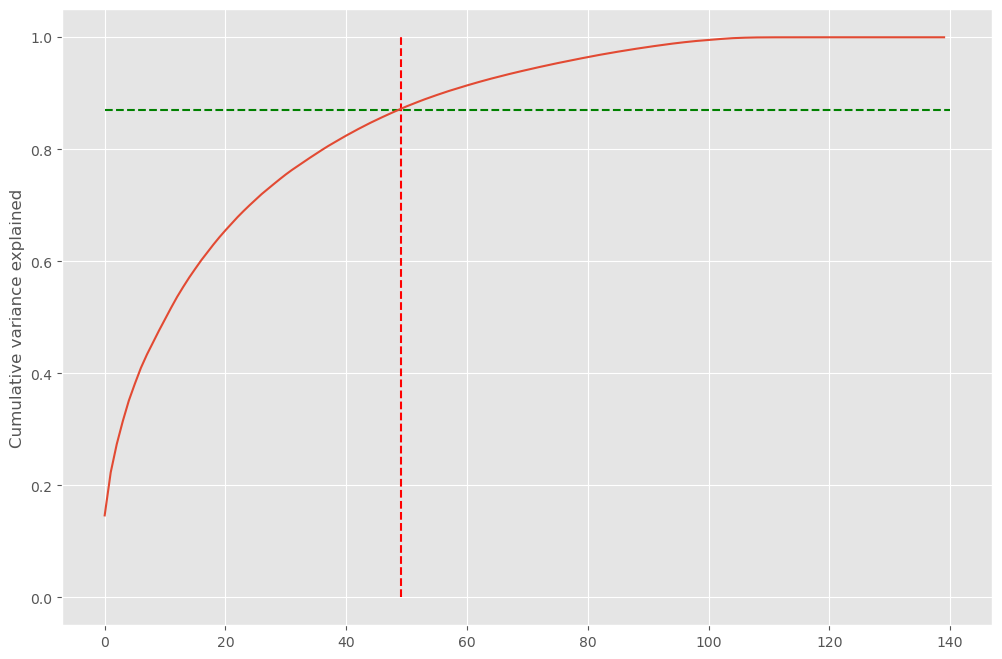

In [164]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=49, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.87, xmax=140, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

We are not getting a small number of features. That would have been ideal. 

Here, if we take the top 50 PCs, we can explain 87% of the variance in the data which is quite good.

It would be ideal to take 15-20 PCs but that would mean a huge loss of data.

#### However, since the number of PCs is still large and we have lost some information due to the PCA, the model building may not be much better than what we already have. 

In [165]:
# Going ahead with top 50 features.
pca_final = PCA(n_components=50,random_state=100)

In [166]:
# Transforming the data into new bases using PCs
X_train_pc = pca_final.fit_transform(X_train)
X_test_pc = pca_final.transform(X_test)

In [167]:
print(X_train_pc.shape)
print(X_test_pc.shape)

(54134, 50)
(13534, 50)


## Classification after PCA

### Logistic Regression using PCs

Let's try building the logistic model once again using the transformed data.

In [168]:
X_train_pc_sm = sm.add_constant(X_train_pc)
logm_pc_1 = sm.GLM(y_train,X_train_pc_sm, family = sm.families.Binomial()).fit()
logm_pc_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                54134
Model:                            GLM   Df Residuals:                    54083
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12336.
Date:                Thu, 26 Oct 2023   Deviance:                       24672.
Time:                        17:47:12   Pearson chi2:                 4.10e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1849
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8395      0.042    -92.156      0.000      -3.921      -3.758
x1            -0.3607      0.009    -42.417      0.000      -0.377      -0.344
x2            -0.2449      0.012    -19.981      0.000      -0.269      -0.221
x3             0.0325      0.012      2.645      0.008       0.008       0.057
x4            -0.2142      0.018    -12.093      0.000      -0.249      -0.180
x5            -0.2847      0.016    -17.897      0.000      -0.316      -0.253
x6             0.5482      0.010     52.469      0.000       0.528       0.569
x7            -0.1415      0.013    -10.511      0.000      -0.168      -0.115
x8            -0.0191      0.019     -1.013      0.311      -0.056       0.018
x9             0.0675      0.013      5.324      0.000       0.043       0.092
x10           -0.2689      0.022    -12.378      0.000      -0.312      -0.226
x11            0.0369      0.016      2.246      0.025       0.005       0.069
x12            0.0823      0.023      3.617      0.000       0.038       0.127
x13           -0.0049      0.022     -0.226      0.821      -0.047       0.037
x14            0.0191      0.029      0.649      0.516      -0.039       0.077
x15            0.0533      0.020      2.624      0.009       0.013       0.093
x16            0.0430      0.023      1.836      0.066      -0.003       0.089
x17           -0.0539      0.026     -2.076      0.038      -0.105      -0.003
x18           -0.3272      0.014    -23.623      0.000      -0.354      -0.300
x19           -0.0920      0.032     -2.886      0.004      -0.154      -0.030
x20            0.0022      0.031      0.071      0.943      -0.059       0.064
x21           -0.0563      0.026     -2.188      0.029      -0.107      -0.006
x22           -0.0386      0.025     -1.548      0.122      -0.087       0.010
x23           -0.1068      0.033     -3.205      0.001      -0.172      -0.041
x24            0.1030      0.022      4.740      0.000       0.060       0.146
x25           -0.3736      0.082     -4.530      0.000      -0.535      -0.212
x26           -0.2568      0.167     -1.533      0.125      -0.585       0.071
x27           -0.8050      0.095     -8.437      0.000      -0.992      -0.618
x28           -0.3253      0.035     -9.328      0.000      -0.394      -0.257
x29           -0.0363      0.025     -1.469      0.142      -0.085       0.012
x30           -0.1986      0.024     -8.186      0.000      -0.246      -0.151
x31            0.3414      0.036      9.472      0.000       0.271       0.412
x32            0.3226      0.028     11.396      0.000       0.267       0.378
x33           -0.3682      0.069     -5.318      0.000      -0.504      -0.232
x34           -1.0893      0.228     -4.768      0.000      -1.537      -0.642
x35            0.0404      0.033      1.218      0.223      -0.025       0.105
x3

In [169]:
y_train_pred = logm_pc_1.predict(X_train_pc_sm)

In [171]:
# Model predictions and evaluation
y_train_pred = logm_pc_1.predict(X_train_pc_sm)
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_pred_df.columns = ['pred_proba']
y_train_pred_df['pred_class'] = y_train_pred_df['pred_proba'].map(lambda x: 1 if x > 0.5 else 0)
model_eval(y_train,y_train_pred_df['pred_class'])

The confusion Matrix : 
 [[47947   650]
 [ 4299  1238]]
Accuracy = 0.91
Sensitivity/Recall = 0.22
Specificity = 0.99
False Positive Rate = 0.01
Precision = 0.66
Negative Predictive Value = 0.92


The model recall is very low. This is just the first model and has many insignificant coefficients. Dropping them may lead to further deteriration and we will get to the same point as before. So let's drop logistic regression and go ahead with tree models.

### Decision Tree Classifier using PCs

In [175]:
params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [50, 100, 200, 300, 400, 500]
}
# Instantiate the grid search model
dtc = DecisionTreeClassifier(random_state=100)
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train_pc, y_train)
print(grid_search.best_estimator_)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=100)


In [176]:
dtc_pc_best = grid_search.best_estimator_

In [178]:
y_train_pred = dtc_pc_best.predict(X_train_pc)
model_eval(y_train,y_train_pred)

The confusion Matrix : 
 [[47285  1312]
 [ 3153  2384]]
Accuracy = 0.92
Sensitivity/Recall = 0.43
Specificity = 0.97
False Positive Rate = 0.03
Precision = 0.65
Negative Predictive Value = 0.94


In [179]:
y_test_pred = dtc_pc_best.predict(X_test_pc)
model_eval(y_test,y_test_pred)

The confusion Matrix : 
 [[11807   396]
 [  823   508]]
Accuracy = 0.91
Sensitivity/Recall = 0.38
Specificity = 0.97
False Positive Rate = 0.03
Precision = 0.56
Negative Predictive Value = 0.93


The new model is slightly worse compared to the best decision tree model we created previously. Also, the performance isn't holding that well in the test data.

### Random Forest Classifier using PCs

In [182]:
params = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_leaf': [50, 100, 200, 300, 400, 500],
    'n_estimators': [10, 25, 50, 100]
}
# Instantiate the grid search model
rfc = RandomForestClassifier(random_state=100)
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train_pc, y_train)
print(grid_search.best_estimator_)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
RandomForestClassifier(max_depth=7, min_samples_leaf=50, n_estimators=50,
                       random_state=100)


In [183]:
rfc_pc_best = grid_search.best_estimator_

In [184]:
rfc_pc_best.fit(X_train_pc,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=50, n_estimators=50,
                       random_state=100)

In [185]:
y_train_pred = rfc_pc_best.predict(X_train_pc)
model_eval(y_train,y_train_pred)

The confusion Matrix : 
 [[48505    92]
 [ 4956   581]]
Accuracy = 0.91
Sensitivity/Recall = 0.10
Specificity = 1.00
False Positive Rate = 0.00
Precision = 0.86
Negative Predictive Value = 0.91


In [186]:
y_test_pred = rfc_pc_best.predict(X_test_pc)
model_eval(y_test,y_test_pred)

The confusion Matrix : 
 [[12176    27]
 [ 1207   124]]
Accuracy = 0.91
Sensitivity/Recall = 0.09
Specificity = 1.00
False Positive Rate = 0.00
Precision = 0.82
Negative Predictive Value = 0.91


The new model is very poor compared to the other models we created so far. Also, the performance isn't holding well in the test data. So we can't use this model.

### Decision Tree Classifier

We tried creating a base model by only specifying max_depth values and got pretty good results as seen below. Obviously, this model will overfit because many leaf nodes will have very small number of samples. So after this we will use hyper-parameter tuning via GridSearchCV to find best estimator.

In [187]:
dtc_base = DecisionTreeClassifier(max_depth=5,random_state=56)
dtc_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=56)

In [189]:
# Model evaluation on train data
y_train_pred = dtc_base.predict(X_train)
model_eval(y_train,y_train_pred)

The confusion Matrix : 
 [[47548  1049]
 [ 2026  3511]]
Accuracy = 0.94
Sensitivity/Recall = 0.63
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.77
Negative Predictive Value = 0.96


In [191]:
# Model evaluation on test data
y_test_pred = dtc_base.predict(X_test)
model_eval(y_test,y_test_pred)

The confusion Matrix : 
 [[11920   283]
 [  479   852]]
Accuracy = 0.94
Sensitivity/Recall = 0.64
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.75
Negative Predictive Value = 0.96


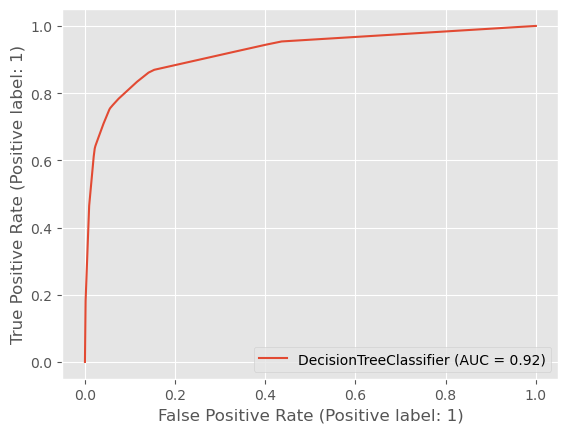

In [192]:
# ROC curve for train data
RocCurveDisplay.from_estimator(dtc_base,X_train,y_train)

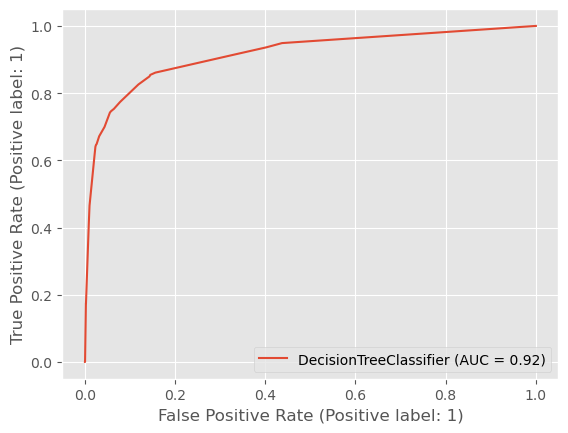

In [193]:
# Test data
RocCurveDisplay.from_estimator(dtc_base,X_test,y_test)

Base model performance is quite good and better than benchmark in terms of recall. And AUC values are above 90% for both train & test sets which is great too.

#### Hyperparameter tuning to find best model

In [194]:
params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [50, 100, 200, 300, 400, 500]
}
# Instantiate the grid search model
dtc = DecisionTreeClassifier(random_state=56)
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=56)


In [196]:
# Let's isolate the best estimator
dtc_best = grid_search.best_estimator_
dtc_best

RandomForestClassifier(max_depth=3, min_samples_leaf=50, n_jobs=-1,
                       random_state=42)

In [197]:
dtc_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=50, n_jobs=-1,
                       random_state=42)

In [199]:
# Model evaluation on train data
y_train_pred = dtc_best.predict(X_train)
model_eval(y_train,y_train_pred)

The confusion Matrix : 
 [[47662   935]
 [ 2211  3326]]
Accuracy = 0.94
Sensitivity/Recall = 0.60
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.78
Negative Predictive Value = 0.96


In [200]:
# Model evaluation on test data
y_test_pred = dtc_best.predict(X_test)
model_eval(y_test,y_test_pred)

The confusion Matrix : 
 [[11953   250]
 [  526   805]]
Accuracy = 0.94
Sensitivity/Recall = 0.60
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.76
Negative Predictive Value = 0.96


#### Key insights  -
 - The decision tree model which was created above is very good in terms of key metrics.
 - We are getting a high accuracy of 94% along with very good precision of 78% and good recall of 61% on the train data.
 - These numbers are holding on the test data suggesting that the model has not overfitted and can be used on unseen data.
 - Based on test data evaluation, the model accurately predicts 94% of the time. It can identify 60% of the churning customers accurately (recall). And out of everyone it tagged as churning, 77% are truly churning (precision).
 - A good model overall.

#### Other than overall accuracy, we also need the model to identify the churning customers with good accuracy. This metric is called recall or sensitivity as mentioned above.

### Random Forest Classifier

Since decision tree worked, random forest will too. So, we will directly do hyperparameter tuning to obtain the best model. After some trials, wee chose limited numbers of parameters to tune upon in order to optimze computing time.

In [202]:
params = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_leaf': [50, 100, 200, 300, 400, 500],
    'n_estimators': [10, 25, 50, 100]
}
# Instantiate the grid search model
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
RandomForestClassifier(max_depth=3, min_samples_leaf=50, random_state=42)


In [203]:
# Let's isolate the best estimator
rfc_best = grid_search.best_estimator_

In [204]:
rfc_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=50, random_state=42)

In [205]:
# Model evaluation on train data
y_train_pred = rfc_best.predict(X_train)
model_eval(y_train,y_train_pred)

The confusion Matrix : 
 [[47662   935]
 [ 2211  3326]]
Accuracy = 0.94
Sensitivity/Recall = 0.60
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.78
Negative Predictive Value = 0.96


In [206]:
# Model evaluation on test data
y_test_pred = rfc_best.predict(X_test)
model_eval(y_test,y_test_pred)

The confusion Matrix : 
 [[11953   250]
 [  526   805]]
Accuracy = 0.94
Sensitivity/Recall = 0.60
Specificity = 0.98
False Positive Rate = 0.02
Precision = 0.76
Negative Predictive Value = 0.96


#### Key insights  -
 - The random forest model which was created above is very good in terms of key metrics and is similar to the decision tree model we evaluated above.
 - We are getting a high accuracy of 94% along with very good precision of 78% and good recall of 60% on the train data.
 - These numbers are holding on the test data suggesting that the model has not overfitted and can be used on unseen data.
 - Based on test data evaluation, the model accurately predicts 94% of the time. It can identify 59% of the churning customers accurately. And out of everyone it tagged as churning, 77% are truly churning.
 - A good model overall.

#### From all the models he have tried so far, decision tree and random forest have given best results which are similar to each other. Although decision tree is the simpler model, we will choose Random Forest over it in order to avoid the overfitting problem with Decision Trees.

So the best model we are going to choose is the Random Forest model we created previsouly without PCA. This is the same model which we used to compute feature importances earlier.

This model had ~94% accuracy, ~60% recall, and ~77% precision. Also, it had ~60% sensitivity with ~98% specificity. A good model.

## Step 4: Model Selection and Predictions on Unseen Data

#### Predictions using best model

In [209]:
#Trails for trains, test/unseen is yet to be done
y_test_pred = rfc_best.predict(X_test)

In [210]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [211]:
pd.DataFrame(y_test_pred).value_counts()

0    12479
1     1055
dtype: int64

In [ ]:
#Calculate churn rate for test

#### Creating the submission file